# **I. OVERALL**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **CONTRACT table (6,234,093 rows)**
- `SKP_CREDIT_CASE`: ID for credit (4280377 distinct) -> drop duplicated (not enough info) -> **Primary Key**
- `SKP_CLIENT`: ID for customer (1000528 distinct) -> **Foreign Key to CUSTOMER table**
- `NAME_EDUCATION_TYPE`: Education level (`primary school`, `junior school`, `high school`, `bachelor`, `master`, `XNA`)
- `CNT_CHILDREN`: Number of children (range 0 - 100 ??)
- `AMT_INCOME_MAIN`: Main personal income (VND)
- `AMT_INCOME_HOUSEHOLD`: Total household income (VND)
- `NAME_INCOME_TYPE`: Type of income (`Employed`, `Self-employed`, `Retired`, `Person in household`, `Student`, `Unemployed`, `XNA`)
- `CODE_PROFESSION`: Profession code (`WORKER`, `SALESMAN`, `FARMER`, `ADMINISTRATIVE`, `SERVICES`, `ENGINEER`, `OTHER`, `XNA`)
- `NAME_CREDIT_STATUS`: Credit status of the application

| Trạng thái        | Giải thích                                                                                         | Nhóm trạng thái (`STATUS_GROUP`) |
| ----------------- | -------------------------------------------------------------------------------------------------- | -------------------------------- |
| **In Preprocess** | Hồ sơ đang trong giai đoạn chuẩn bị trước khi xử lý chính thức (tiền thẩm định, chuẩn bị giấy tờ). | In Progress                      |
| **In Process**    | Hồ sơ đang trong quá trình xử lý (thẩm định, xét duyệt…).                                          | In Progress                      |
| **Rejected**      | Hồ sơ vay đã bị từ chối, không được phê duyệt.                                                     | Risky                            |
| **Cancelled**     | Khách hàng hoặc ngân hàng đã hủy hồ sơ vay trước khi giải ngân hoặc ký kết hợp đồng.               | Risky                            |
| **Approved**      | Khoản vay đã được phê duyệt nhưng chưa chắc đã giải ngân.                                          | Positive                         |
| **Signed**        | Khách hàng đã ký hợp đồng vay nhưng khoản vay chưa được giải ngân hoặc đang chờ xử lý.             | Positive                         |
| **Active**        | Khoản vay đang còn hiệu lực, khách hàng đang trả dần từng kỳ (còn dư nợ).                          | Active                           |
| **Finished**      | Khoản vay đã hoàn tất (được trả đầy đủ hoặc đã kết thúc đúng hạn).                                 | Positive                         |
| **Paid off**      | Khoản vay đã được tất toán hoàn toàn (thường là trả sớm trước hạn).                                | Positive                         |
| **Written off**   | Khoản vay đã được xóa sổ (coi như mất trắng) vì khách hàng không có khả năng thanh toán.           | Risky                            |
| **Sold**          | Khoản vay đã được bán lại cho bên thứ ba (ví dụ công ty đòi nợ hoặc quỹ đầu tư).                   | Risky                            |

- `PRODUCT`: Product name/type (missing 1%) of Home Credit

| Mã sản phẩm (PRODUCT) | Diễn giải                         | Giải thích cụ thể                                                              |
| --------------------- | --------------------------------- | ------------------------------------------------------------------------------ |
| **CL**                | **Cash Loan (Vay tiền mặt)**      | Sản phẩm vay tín chấp tiền mặt, không cần tài sản đảm bảo.                     |
| **CD**                | **Consumer Durables**             | Vay mua điện máy, thiết bị gia dụng                                            |
| **BNPL**              | **Buy Now Pay Later**             | Mua trước trả sau, thường dùng cho giao dịch thương mại điện tử, trả góp.      |
| **CC**                | **Credit Card**                   | Thẻ tín dụng, người dùng chi tiêu trước và trả sau theo hạn mức.               |
| **TW**                | **Two-Wheeler Loan**              | Vay mua xe hai bánh (xe máy), phổ biến ở các nước đang phát triển.             |
| **CW**                | **Car/Consumer Wheel Loan**       | Vay mua ô tô hoặc phương tiện lớn hơn xe máy (ngành hàng mới).                 |
| **IN**                | **Insurance Loan/Product**        | Sản phẩm liên quan đến bảo hiểm.                                               |

- `AMT_CREDIT`: Loan amount requested or approved (VND) (missing 1%)
- `PAYMENT_NUM`: Number of payments/installments (tenor) (missing 9%)
- `INIT_PAY`: Initial payment or down payment (VND) (missing 1%)
- `ANNUITY`: Monthly installment (VND) (missing 9%)
- `SKP_SALESROOM`: ID for salesroom (34176 distinct)
- `APPLY_CONTRACT_TIME`: Timestamp when the contract was applied for
- `APPROVE_CONTRACT_TIME`: Timestamp when the contract was approved (missing 29%) (related `NAME_CREDIT_STATUS`)
- `SIGN_CONTRACT_TIME`: Timestamp when the contract was signed (missing 36%) (related `NAME_CREDIT_STATUS`)
- `APPLY_EMPLOYEE`: Staff code who created the application (`vn_api_fin`, `OpenAPI_User`, `Koyal_User`, `BNPL_ONBOARDING_TECH_USER`, `EPOS2_User`, `EPOS_User`, `BNPL_Onboarding`,...) -> **Foreign Key to EMPLOYEE table**
- `SIGN_EMPLOYEE`: Staff code who processed the contract signing (same `APPLY_EMPLOYEE`) (missing 36%) (related `NAME_CREDIT_STATUS`) -> **Foreign Key to EMPLOYEE table**
- `TRANSAC`: Transaction or installment channel code (missing 95%) ????
- `FIRST_DUE`: First overdue (1 = overdue, 0 = no overdue)
- `SECOND_DUE`: Second overdue (0/1)
- `THIRD_DUE`: Third overdue (0/1)
- `FOURTH_DUE`: Fourth overdue (0/1)
- `AMT_BILLING`: First billed amount for revolving loans (BNPL or CC) (missing 95%)
- `FLAG_INS`: Insurance flag (1 = has insurance, 0 = no insurance)
- `APPLY_EMPLOYEE_LEVEL`: Seniority of staff created the application (`JUNIOR`, `SENIOR`, `WARRIOR`, `MASTER`) (missing 88%)
- `SIGN_EMPLOYEE_LEVEL`: Seniority of staff processed the contract signing (same `APPLY_EMPLOYEE_LEVEL`) (missing 92%)

In [ ]:
contract_df = pd.read_csv(r'data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234093 entries, 0 to 6234092
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  SKP_SALESROOM          int64  
 15  APPLY_CONTRACT_TIME    object 
 16  APPROVE_CONTRACT_TIME  object 
 17  SIGN_CONTRACT_TIME     object 
 18  APPLY_EMPLOYEE         object 
 19  SIGN_EMPLOYEE          object 
 20  TRANSAC                object 
 21  FIRST_DUE              int64  
 22  SECOND_DUE        

In [ ]:
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0               46804792    13152490                          XNA   
1               54355719    14915647                          XNA   
2               43078344    11009338                          XNA   
3              199270422     3489209                          XNA   
4              199467152    62216381            Bachelor's degree   
...                  ...         ...                          ...   
6234088        117314500     4244312  Elementary (primary) school   
6234089        321433839    11854609                          XNA   
6234090         81343486    12603259                          XNA   
6234091        278360564    40677477      Junior school education   
6234092        342932643     9000715        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0              0.0                     0   
1                   0              0.0                     0   
2                   0              0.0                     0   
3                   0        9000000.0                     0   
4                   0       10000000.0                     0   
...               ...              ...                   ...   
6234088             1        7000000.0                     0   
6234089             0       10000000.0                     0   
6234090             0              0.0                     0   
6234091             0       10000000.0                     0   
6234092             2       10000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                                          XNA             XNA   
2                                          XNA             XNA   
3                                          XNA             XNA   
4                              Employed person           OTHER   
...                                        ...             ...   
6234088                        Employed person          WORKER   
6234089                        Employed person           OTHER   
6234090                                    XNA             XNA   
6234091  Self-employed person / business owner          WORKER   
6234092  Self-employed person / business owner          FARMER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                 Finished      CD  ...            NaN      NaN          0   
1                 Finished      CD  ...            NaN      NaN          0   
2                 Rejected      CD  ...            NaN      NaN          0   
3                 Rejected      CD  ...            NaN      NaN          0   
4                 Finished      CD  ...        0027039      NaN          0   
...                    ...     ...  ...            ...      ...        ...   
6234088          Cancelled      CL  ...            NaN      NaN          0   
6234089           Finished      CL  ...       00049441      NaN          0   
6234090           Finished      CD  ...        0034562      NaN          0   
6234091          Cancelled    BNPL  ...            NaN      NaN          0   
6234092             Signed    BNPL  ...     Koyal_User      NaN          0   

         SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                 0          0          0         NaN        1   
1                 0          0          0         NaN        1   
2                 0          0          0         NaN        0   
3                 0          0          0         NaN        0   
4                 0          0          0         NaN        1   
...             ...        ...        ...         ...      ...   
6234088           0          0          0         NaN        0   
6234089           0          0          0         NaN        0   
6234090           0          0          0         NaN        1   
6234091           0  

In [ ]:
# Dataframe for percentages of missing values each column
missing_values = contract_df.isnull().mean() * 100
missing_values = missing_values[missing_values > 0].sort_values(ascending=False)
missing_values_df = pd.DataFrame(missing_values).reset_index()
missing_values_df.columns = ['Column', 'Percentage of Missing Values']
missing_values_df

Column  Percentage of Missing Values
0             AMT_BILLING                     93.521784
1                 TRANSAC                     93.521720
2     SIGN_EMPLOYEE_LEVEL                     91.132086
3    APPLY_EMPLOYEE_LEVEL                     88.403381
4      SIGN_CONTRACT_TIME                     32.198525
5           SIGN_EMPLOYEE                     32.198525
6   APPROVE_CONTRACT_TIME                     23.012522
7                 ANNUITY                     10.646088
8             PAYMENT_NUM                     10.555698
9                 PRODUCT                      0.454725
10               INIT_PAY                      0.454725
11             AMT_CREDIT                      0.310454

In [ ]:
# Count the number of distinct contract id
distinct_contracts = contract_df['SKP_CREDIT_CASE'].nunique()
print(f"Number of distinct contracts: {distinct_contracts}")

Number of distinct contracts: 4280377


In [ ]:
# Non-duplicated contract ids
non_duplicated_contracts = contract_df[contract_df['SKP_CREDIT_CASE'].duplicated(keep=False) == False]
print(f"Number of non-duplicated contracts: {len(non_duplicated_contracts)}")

# Duplicated contract ids
duplicated_contracts = contract_df[contract_df['SKP_CREDIT_CASE'].duplicated(keep=False)]
print(f"Number of duplicated contracts: {len(duplicated_contracts)}")

Number of non-duplicated contracts: 2326915
Number of duplicated contracts: 3907178


In [ ]:
duplicated_contracts = duplicated_contracts.drop_duplicates()
print(f"Number of duplicated contracts: {len(duplicated_contracts)}")

Number of duplicated contracts: 3906868


In [ ]:
duplicated_contracts = duplicated_contracts\
        .sort_values(by=['SKP_CREDIT_CASE', 'AMT_INCOME_MAIN', 'NAME_EDUCATION_TYPE'], ascending=[True, True, False])\
        .drop_duplicates(subset=['SKP_CREDIT_CASE'], keep='last')
print(f"Number of duplicated contracts after sorting and dropping: {len(duplicated_contracts)}")

Number of duplicated contracts after sorting and dropping: 1953462


In [ ]:
# Append the non-duplicated contracts to the duplicated contracts
contract_df = pd.concat([non_duplicated_contracts, duplicated_contracts], ignore_index=True)
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                 Rejected      CD  ...            NaN      NaN          0   
1                 Finished      CD  ...        0027039      NaN          0   
2                 Finished      CD  ...        0023074      NaN          0   
3                 Finished      CD  ...        0041262      NaN          0   
4                 Finished      CD  ...        0031089      NaN          0   
...                    ...     ...  ...            ...      ...        ...   
4280372             Active      CL  ...     Koyal_User      NaN          0   
4280373             Active      CC  ...     Koyal_User      NaN          0   
4280374             Active      CL  ...        0033883      NaN          0   
4280375             Active      CL  ...     Koyal_User      NaN          0   
4280376          Cancelled      CL  ...            NaN      NaN          0   

         SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                 0          0          0         NaN        0   
1                 0          0          0         NaN        1   
2                 0          0          0         NaN        1   
3                 0          0          0         NaN        1   
4                 0          0          0         NaN        1   
...             ...        ...        ...         ...      ...   
4280372           0          0          0         NaN        0   
4280373           0          0          0         NaN        1   
4280374           0          0          0         NaN        1   
4280375           0  

In [ ]:
contract_df['NAME_EDUCATION_TYPE'].value_counts()

NAME_EDUCATION_TYPE
High school education          1471797
XNA                            1093326
Junior school education         823065
Bachelor's degree               494245
Elementary (primary) school     339835
Master's degree                  58109
Name: count, dtype: int64

In [ ]:
contract_df['NAME_INCOME_TYPE'].value_counts()

NAME_INCOME_TYPE
Employed person                          2178272
Self-employed person / business owner    1124455
XNA                                       938119
Student                                    22109
Person in household                        11248
Retired person                              4120
Unemployed                                  2054
Name: count, dtype: int64

In [ ]:
contract_df['CODE_PROFESSION'].value_counts()

CODE_PROFESSION
WORKER            1213477
XNA                954327
OTHER              912944
SALESMAN           379242
FARMER             264773
ADMINISTRATIVE     241476
SERVICES           210532
ENGINEER           103606
Name: count, dtype: int64

In [ ]:
contract_df['NAME_CREDIT_STATUS'].value_counts()

NAME_CREDIT_STATUS
Finished         2017785
Rejected          914467
Active            847515
Cancelled         477677
Written off        14520
Paid off            5598
Signed              1772
Approved             483
Sold                 387
In Preprocess        159
In Process            14
Name: count, dtype: int64

In [ ]:
contract_df['PRODUCT'].value_counts()

PRODUCT
CD      3095684
CL       565521
BNPL     211481
CC       135823
TW       133928
CW       109591
IN            1
Name: count, dtype: int64

In [ ]:
contract_df['APPLY_EMPLOYEE'].value_counts()

APPLY_EMPLOYEE
vn_api_fin                   1181407
OpenAPI_User                  562252
Koyal_User                    229929
BNPL_ONBOARDING_TECH_USER     125633
EPOS2_User                     72649
                              ...   
FPT107902                          1
00059787                           1
R00027808                          1
R00028096                          1
00060448                           1
Name: count, Length: 61678, dtype: int64

In [ ]:
contract_df['APPLY_EMPLOYEE'].value_counts()

APPLY_EMPLOYEE
vn_api_fin                   1181407
OpenAPI_User                  562252
Koyal_User                    229929
BNPL_ONBOARDING_TECH_USER     125633
EPOS2_User                     72649
                              ...   
FPT107902                          1
00059787                           1
R00027808                          1
R00028096                          1
00060448                           1
Name: count, Length: 61678, dtype: int64

In [ ]:
contract_df['APPLY_EMPLOYEE_LEVEL'].value_counts()

APPLY_EMPLOYEE_LEVEL
SENIOR     164273
JUNIOR     138165
MASTER     107650
WARRIOR     99291
Name: count, dtype: int64

# **CUSTOMER table (1,000,528 rows)**
- `SKP_CLIENT`: ID for customer -> **Primary Key**
- `NAME_GENDER`: Gender (Male/Female)
- `NAME_EDUCATION_TYPE`: Education level
- `DATE_BIRTH`: Date of birth
- `CNT_CHILDREN`: Number of children
- `FLAG_CAR_OWNER`: Car ownership flag (1: YES, 0: NO) -> Only `X`
- `NAME_SALARY_FREQUENCY`: Frequency of salary payments (`Monthly paid`, `Irregular salary frequency`, `Every week paid`, `Once a two week paid`, `XNA`) -> missing > 99% -> useless
- `CNT_PERSON_DEPENDENT`: Number of dependents (missing 99%) -> useless
- `ADDRESS`: Residential address (missing 15%)
- `AVG_SESSION_PER_WEEK_2025`: Average of using Online Application (GMA) per week in 2025


In [ ]:
customer_df = pd.read_csv(r'data/CUSTOMER.csv')
customer_df.info()

C:\Users\Admin\AppData\Local\Temp\ipykernel_21672\959404013.py:1: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv(r'data/CUSTOMER.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000528 entries, 0 to 1000527
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SKP_CLIENT                 1000528 non-null  int64  
 1   NAME_GENDER                1000528 non-null  object 
 2   NAME_EDUCATION_TYPE        1000528 non-null  object 
 3   DATE_BIRTH                 1000528 non-null  object 
 4   CNT_CHILDREN               874457 non-null   float64
 5   FLAG_CAR_OWNER             1000528 non-null  object 
 6   NAME_SALARY_FREQUENCY      1000528 non-null  object 
 7   CNT_PERSON_DEPENDENT       14869 non-null    float64
 8   ADDRESS                    851286 non-null   object 
 9   AVG_SESSION_PER_WEEK_2025  1000528 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 76.3+ MB


In [ ]:
customer_df

SKP_CLIENT NAME_GENDER          NAME_EDUCATION_TYPE  \
0               676      Female        High school education   
1              1470        Male        High school education   
2              7123        Male      Junior school education   
3             10711      Female  Elementary (primary) school   
4             12407        Male        High school education   
...             ...         ...                          ...   
1000523   126809534        Male                          XNA   
1000524   127462754        Male                          XNA   
1000525   126394510        Male                          XNA   
1000526   118415150      Female                          XNA   
1000527   126803169        Male                          XNA   

               DATE_BIRTH  CNT_CHILDREN FLAG_CAR_OWNER NAME_SALARY_FREQUENCY  \
0        1966-03-18 00:00           0.0              X                   XNA   
1        1967-12-27 00:00           1.0              X                   XNA   
2        1972-10-03 00:00           2.0              X                   XNA   
3        1978-01-01 00:00           1.0              X                   XNA   
4        1986-03-14 00:00           1.0              X                   XNA   
...                   ...           ...            ...                   ...   
1000523  1990-04-02 00:00           0.0              X                   XNA   
1000524  2005-04-30 00:00           NaN              X                   XNA   
1000525  1995-07-24 00:00           0.0              X                   XNA   
1000526  2000-05-09 00:00           NaN              X                   XNA   
1000527  2004-09-27 00:00           NaN              X                   XNA   

         CNT_PERSON_DEPENDENT                               ADDRESS  \
0                         NaN               P. 2,TP. Tan An,Long An   
1                         NaN                     P. 9,Q. 8,TP. HCM   
2                         6.0     TT.BUON TRAP,H. Krong Ana,Dak Lak   
3                         1.0  X. An Thai Dong,H. Cai Be,Tien Giang   
4                         NaN         P. Yen The,TP. Pleiku,Gia Lai   
...                       ...                                   ...   
1000523                   NaN                                   NaN   
1000524                   NaN                                   NaN   
1000525                   NaN                                   NaN   
1000526                   NaN                                   NaN   
1000527                   NaN                                   NaN   

         AVG_SESSION_PER_WEEK_2025  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0  
...                            ...  
1000523                        0.0  
1000524                        0.0  
1000525                        0.0  
1000526                        0.0  
1000527                        0.0  

[1000528 rows x 10 columns]

In [ ]:
customer_df['NAME_SALARY_FREQUENCY'].value_counts()

NAME_SALARY_FREQUENCY
XNA                           991399
Monthly paid                    7696
Irregular salary frequency       884
Every week paid                  321
Once a two week paid             228
Name: count, dtype: int64

# **EMPLOYEE table (11,383 rows)**
- `CODE_EMPLOYEE`: ID for Employee -> **Primary Key**
- `HIRING_DATE`: Hiring date of employee
- `LEAVING_DATE`: Termination date of employee (missing 34%) -> Only 34% employee still work
- `MANAGER_CODE_EMPLOYEE`: ID for manager
- `GENDER`: Gender of employee (Male/Female)
- `BIRTH_DATE`: Birth date of employee
- `ADDRESS`: Home address of employee
- `LEVEL_SA`: New employees who joined on and after March 31 will not yet have a level_SA assigned — by default, they will be considered Junior, the lowest level

In [ ]:
employee_df = pd.read_csv(r'data/EMPLOYEE.csv')
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODE_EMPLOYEE          11383 non-null  int64 
 1   HIRING_DATE            11383 non-null  object
 2   LEAVING_DATE           7565 non-null   object
 3   MANAGER_CODE_EMPLOYEE  11383 non-null  int64 
 4   GENDER                 11383 non-null  object
 5   BIRTH_DATE             11383 non-null  object
 6   LEVEL_SA               7220 non-null   object
 7   ADDRESS                11383 non-null  object
dtypes: int64(2), object(6)
memory usage: 711.6+ KB


In [ ]:
employee_df

CODE_EMPLOYEE          HIRING_DATE         LEAVING_DATE  \
0              46911  2021-01-04 00:00:00  2021-10-01 00:00:00   
1              46945  2021-01-11 00:00:00  2021-07-26 00:00:00   
2              47297  2021-02-22 00:00:00  2024-03-13 00:00:00   
3              47428  2021-03-01 00:00:00  2021-04-11 00:00:00   
4              47435  2021-03-01 00:00:00  2021-11-11 00:00:00   
...              ...                  ...                  ...   
11378         118286  2013-07-24 00:00:00  2021-09-19 00:00:00   
11379         120002  2013-10-14 00:00:00  2022-06-01 00:00:00   
11380         120825  2013-11-27 00:00:00  2021-08-15 00:00:00   
11381         121209  2013-12-16 00:00:00                  NaN   
11382         121368  2013-12-18 00:00:00                  NaN   

       MANAGER_CODE_EMPLOYEE  GENDER           BIRTH_DATE LEVEL_SA  \
0                     115169  Female  2001-11-28 00:00:00      NaN   
1                      35377  Female  1999-12-23 00:00:00      NaN   
2                     115717  Female  1999-06-10 00:00:00   JUNIOR   
3                       2101  Female  1998-10-10 00:00:00      NaN   
4                     115642  Female  1988-02-18 00:00:00      NaN   
...                      ...     ...                  ...      ...   
11378                 120745  Female  1992-11-05 00:00:00      NaN   
11379                  17466  Female  1992-05-01 00:00:00      NaN   
11380                  23979  Female  1991-03-26 00:00:00      NaN   
11381                  16010    Male  1988-03-11 00:00:00   JUNIOR   
11382                  24493  Female  1989-02-02 00:00:00   JUNIOR   

                                                 ADDRESS  
0      Phuong Dong Hai, Tp. Phan Rang-thap Cham, Ninh...  
1         Phuong Xuan An, Thanh Pho Long Khanh, Dong Nai  
2                      Phuong 08, Quan 6, TP Ho Chi Minh  
3       Thi Tran Lien Huong, Huyen Tuy Phong, Binh Thuan  
4         Xa Binh Hung, Huyen Binh Chanh, TP Ho Chi Minh  
...                                                  ...  
11378       Thi Tran Tien Hai, Huyen Tien Hai, Thai Binh  
11379             Xa Long Hau, Huyen Lai Vung, Dong Thap  
11380  Phuong Binh Tri Dong, Quan Binh Tan, TP Ho Chi...  
11381   Thi Tran Thanh Binh, Huyen Thanh Binh, Dong Thap  
11382             Phuong Le Mao, Thanh Pho Vinh, Nghe An  

[11383 rows x 8 columns]

# **LEADS table (2,143,891 rows)**
- `DTIME_CREATED`: Timestamp when the lead or record was created
- `DATE_ASSIGNED`: Date when the lead was assigned. This field may be missing due to a system error during lead assignment. (3000-01-01 00:00:00)
- `DATE_ACCEPTED`: Date when the lead was accepted. In cases where the leads come from the SOB process, SA will provide direct support without clicking 'Accept Leads' (Date accepted = 3000-01-01)
- `DESC_FIN_REASON`: Description of the financial reason for the lead or outcome (`Not Interest`, `Expire Lifetime`, `Not Applicable`, `Deal`, `Existing Lead On LDS`, `No Cluster`, `Rejected`, `Expired Acceptance`, `Replaced`, `Expired Offer`, `Expired Campaign`) (missing 2%)
- `CODE_POS`: Code representing the point of sale or staff position -> **Foreign Key to SHOP table**
- `CODE_PRODUCT_TYPE`: Code for the type of financial product (`BNP`, `CLX`, `CCX`, `SCW`, `VCC`, `CD`, `TW`, `ACL`, `EPOS`, `CCW`)
- `FLAG_ASSIGNED`: Binary flag indicating whether the lead was assigned (1) or not (0)
- `CODE_SA`: Sales agent or staff code handling the lead. In cases where the leads come from the SOB process, SA will provide direct support without clicking 'Accept Leads'. (CODE_SA is null) (missing 28%) -> **Foreign Key to Employee table**
- `SKP_CLIENT`: ID for customer
- `MAX_OFFER`: Maximum loan offer amount approved for the customer (missing 1%)
- `LEAD_SOURCE`: Lead source (RA, SA, TLS, SOB, GMA, LANDING PAGE, RTDM)
- `PROCESS`: Lead approach process - Standard Process (STD), Proactive Process (PRO)

In [ ]:
leads_df = pd.read_csv(r'data/LEADS.csv')
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143891 entries, 0 to 2143890
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DTIME_CREATED      object 
 1   DATE_ASSIGNED      object 
 2   DATE_ACCEPTED      object 
 3   DESC_FIN_REASON    object 
 4   CODE_POS           object 
 5   CODE_PRODUCT_TYPE  object 
 6   FLAG_ASSIGNED      int64  
 7   CODE_SA            object 
 8   SKP_CLIENT         int64  
 9   MAX_OFFER          float64
 10  LEAD_SOURCE        object 
 11  PROCESS            object 
dtypes: float64(1), int64(2), object(9)
memory usage: 196.3+ MB


In [ ]:
leads_df

DTIME_CREATED        DATE_ASSIGNED        DATE_ACCEPTED  \
0        2019-10-16 13:38:42  3000-01-01 00:00:00  3000-01-01 00:00:00   
1        2024-09-26 18:22:11  2024-09-26 18:22:11  2024-09-26 18:22:21   
2        2024-11-06 20:08:00  2024-11-07 08:33:46  2024-11-07 08:34:32   
3        2022-09-29 11:56:46  2022-09-29 11:56:46  2022-09-29 18:48:50   
4        2022-03-30 20:17:34  2022-03-30 20:17:34  2022-03-31 08:48:42   
...                      ...                  ...                  ...   
2143886  2022-11-04 19:28:06  2022-11-04 19:28:06  2022-11-06 12:33:10   
2143887  2022-11-11 19:50:40  2022-11-11 19:50:40  2022-11-12 08:09:48   
2143888  2025-03-19 14:38:46  2025-03-20 08:00:50  2025-03-20 08:03:59   
2143889  2022-11-11 16:12:23  2022-11-11 16:12:23  2022-11-11 16:12:48   
2143890  2025-03-27 18:45:40  2025-03-27 18:51:35  2025-03-27 19:03:17   

         DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED   CODE_SA  \
0         Not Applicable   011417               CLX              0       NaN   
1           Not Interest   440055               BNP              1   0026865   
2           Not Interest   1W0499               CCX              1  00058616   
3           Not Interest   400554               CCX              1   0027520   
4           Not Interest   100284               CLX              1   0023262   
...                  ...      ...               ...            ...       ...   
2143886     Not Interest   030298               CLX              1   0031265   
2143887     Not Interest   221486               VCC              1   0027690   
2143888     Not Interest   013355               CCX              1  00047460   
2143889  Expire Lifetime   170508               VCC              1   0023679   
2143890     Not Interest   570536                CD              1  00057205   

         SKP_CLIENT   MAX_OFFER LEAD_SOURCE PROCESS  
0          12393659  20000000.0         TLS     PRO  
1          93813570   8000000.0          SA     STD  
2           1748865  25000000.0          RA     STD  
3          22148819   5000000.0          SA     STD  
4          54145376  40000000.0          SA     STD  
...             ...         ...         ...     ...  
2143886    57165785  72657000.0          SA     STD  
2143887    42788141   3000000.0          SA     STD  
2143888   104196078  35000000.0          RA     STD  
2143889    12577773   5500000.0          RA     STD  
2143890    14972975   8000000.0         SOB     STD  

[2143891 rows x 12 columns]

In [ ]:
leads_df['DESC_FIN_REASON'].value_counts()

DESC_FIN_REASON
Not Interest            1247039
Expire Lifetime          463192
Not Applicable           189805
Deal                      57537
Existing Lead On LDS      55081
No Cluster                43800
Rejected                  23004
Expired Acceptance        15761
Replaced                   8902
Expired Offer              3120
Expired Campaign             65
Name: count, dtype: int64

In [ ]:
leads_df['CODE_PRODUCT_TYPE'].value_counts()

CODE_PRODUCT_TYPE
BNP     734197
CLX     627256
CCX     315572
SCW     265964
VCC     130229
CD       32955
TW       19097
ACL      18375
EPOS       123
CCW        123
Name: count, dtype: int64

In [ ]:
leads_df['LEAD_SOURCE'].value_counts()

LEAD_SOURCE
RA              1145648
SA               876587
TLS               42733
SOB               38450
GMA               25461
LANDING PAGE       9641
RTDM               5371
Name: count, dtype: int64

# **PAST_BEHAVIOR table (4,412,610 rows)**
- `DTIME_EVENT`: Timestamp when the event or action occurred
- `SKP_CLIENT`: ID for customer
- `ACTION`: Description of the action taken (`APP SCORING`, `SA SCORING`, `WEB SCORING`, `TLS SCORING`, `Partner Site SCORING`, `SOB_CD_QR`, `SOB_TW_LINK`, `SOB_TW_QR`, `TW0BOD`, `SOB_CD_LINK`, `WALK_IN`, `SA, TLS SCORING`, `APP, SA SCORING`, `SA, WEB SCORING`, `APP, Partner Site SCORING`, `SOB_CD_HAPP`)
- `PRODUCT_CODE`: Code representing the product involved in the event (`BNPL`, `CLX`, `CCX`, `ACL`, `TW`, `CC_SC`, `CD`, `CC_CC`, `SAI`, `CC_VCC`, `ACLX`)

In [ ]:
past_behavior_df = pd.read_csv(r'data/PASt_BEHAVIOR.csv')
past_behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412610 entries, 0 to 4412609
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   DTIME_EVENT   object
 1   SKP_CLIENT    int64 
 2   ACTION        object
 3   PRODUCT_CODE  object
dtypes: int64(1), object(3)
memory usage: 134.7+ MB


In [ ]:
past_behavior_df

DTIME_EVENT  SKP_CLIENT       ACTION PRODUCT_CODE
0        2022-12-01 01:40:38    15368837  APP SCORING          CLX
1        2022-12-01 02:04:46     7658238  APP SCORING         BNPL
2        2022-12-01 02:07:22    12686267  APP SCORING         BNPL
3        2022-12-01 06:01:48    16715460  APP SCORING         BNPL
4        2022-12-01 06:01:48    16715460  APP SCORING          CCX
...                      ...         ...          ...          ...
4412605  2025-06-03 22:08:07    67685864  APP SCORING         BNPL
4412606  2025-06-03 22:09:07    39273226  APP SCORING          CCX
4412607  2025-06-03 22:15:54   127338235  WEB SCORING         BNPL
4412608  2025-06-03 22:27:18    43180366  APP SCORING          CLX
4412609  2025-06-03 22:29:05    75074011  APP SCORING          CCX

[4412610 rows x 4 columns]

In [ ]:
past_behavior_df['ACTION'].value_counts()

ACTION
APP SCORING                  1630349
SA SCORING                    867787
WEB SCORING                   746021
TLS SCORING                   726233
Partner Site SCORING          396829
SOB_CD_QR                      37813
SOB_TW_LINK                     5415
SOB_TW_QR                       1136
TW0BOD                           594
SOB_CD_LINK                      258
WALK_IN                          167
SA, TLS SCORING                    3
APP, SA SCORING                    2
SA, WEB SCORING                    1
APP, Partner Site SCORING          1
SOB_CD_HAPP                        1
Name: count, dtype: int64

In [ ]:
past_behavior_df['PRODUCT_CODE'].value_counts()

PRODUCT_CODE
BNPL      1990361
CLX       1250701
CCX        590115
ACL        374434
TW          89346
CC_SC       48101
CD          38180
CC_CC       30845
SAI           289
CC_VCC        150
ACLX           88
Name: count, dtype: int64

# **SHOP table (64,525 rows)**
- `CODE_POS`: ID for the point of sale or staff position (POS code)
- `SALESROOM_TOWN`: Name of the ward/commune where the salesroom is located
- `SALESROOM_DISTRICT`: Name of the district where the salesroom is located
- `SALESROOM_PROVINCE`: Name of the province/city where the salesroom is located
- `ADDRESS`: Detailed address of the salesroom or registered location

In [ ]:
shop_df = pd.read_csv(r'data/SHOP.csv')
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64525 entries, 0 to 64524
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODE_POS            64525 non-null  object
 1   SALESROOM_TOWN      64096 non-null  object
 2   SALESROOM_DISTRICT  64096 non-null  object
 3   SALESROOM_PROVINCE  64525 non-null  object
 4   ADDRESS             64525 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [ ]:
shop_df

CODE_POS     SALESROOM_TOWN SALESROOM_DISTRICT SALESROOM_PROVINCE  \
0       410163      P. LẠCH TRAY       Q. Ngo Quyen          Hai Phong   
1       400714      P. Truong Thi           TP. Vinh            Nghe An   
2       240068         P. THAC MO     TX. Phuoc Long         Binh Phuoc   
3       170525        X. Ham Ninh       TP. Phu Quoc         Kien Giang   
4       540196          TT.Bac Ha          H. Bac Ha            Lao Cai   
...        ...                ...                ...                ...   
64520   570492        X. Ky Phong          H. Ky Anh            Ha Tinh   
64521   224132  THI TRAN XUAN MAI       H. Chuong My         TP. Ha Noi   
64522   210940                P.5         TP. Da Lat           Lam Dong   
64523   014513           Phuong 9               Q. 5            TP. HCM   
64524   460739   P. Hoang Van Thu    TP. Thai Nguyen        Thai Nguyen   

                                              ADDRESS  
0              P. LẠCH TRAY, Q. Ngo Quyen, Hai Phong  
1                    P. Truong Thi, TP. Vinh, Nghe An  
2              P. THAC MO, TX. Phuoc Long, Binh Phuoc  
3               X. Ham Ninh, TP. Phu Quoc, Kien Giang  
4                       TT.Bac Ha, H. Bac Ha, Lao Cai  
...                                               ...  
64520                 X. Ky Phong, H. Ky Anh, Ha Tinh  
64521     THI TRAN XUAN MAI, H. Chuong My, TP. Ha Noi  
64522                       P.5, TP. Da Lat, Lam Dong  
64523                         Phuong 9, Q. 5, TP. HCM  
64524  P. Hoang Van Thu, TP. Thai Nguyen, Thai Nguyen  

[64525 rows x 5 columns]

In [ ]:
contract_train = pd.read_csv(r'data/contract_train.csv')
contract_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4080568 entries, 0 to 4080567
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  SKP_SALESROOM          int64  
 15  APPLY_CONTRACT_TIME    object 
 16  APPROVE_CONTRACT_TIME  object 
 17  SIGN_CONTRACT_TIME     object 
 18  APPLY_EMPLOYEE         object 
 19  SIGN_EMPLOYEE          object 
 20  TRANSAC                object 
 21  FIRST_DUE              int64  
 22  SECOND_DUE        

In [ ]:
contract_test = pd.read_csv(r'data/contract_test.csv')
contract_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290094 entries, 0 to 290093
Data columns (total 29 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   SKP_CREDIT_CASE        290094 non-null  int64  
 1   SKP_CLIENT             290094 non-null  int64  
 2   NAME_EDUCATION_TYPE    290094 non-null  object 
 3   CNT_CHILDREN           290094 non-null  int64  
 4   AMT_INCOME_MAIN        290094 non-null  float64
 5   AMT_INCOME_HOUSEHOLD   290094 non-null  int64  
 6   NAME_INCOME_TYPE       290094 non-null  object 
 7   CODE_PROFESSION        290094 non-null  object 
 8   NAME_CREDIT_STATUS     290094 non-null  object 
 9   PRODUCT                289376 non-null  object 
 10  AMT_CREDIT             290094 non-null  float64
 11  PAYMENT_NUM            234551 non-null  float64
 12  INIT_PAY               289376 non-null  float64
 13  ANNUITY                234551 non-null  float64
 14  SKP_SALESROOM          290094 non-nu

# **II. PREPROCESSING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

today = pd.to_datetime('2025-06-11') # Date of sending case study

# **Preprocessing `EMPLOYEE` data**

In [ ]:
employee_df = pd.read_csv(r'data/EMPLOYEE.csv')
employee_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11383 entries, 0 to 11382
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   CODE_EMPLOYEE          11383 non-null  int64 
 1   HIRING_DATE            11383 non-null  object
 2   LEAVING_DATE           7565 non-null   object
 3   MANAGER_CODE_EMPLOYEE  11383 non-null  int64 
 4   GENDER                 11383 non-null  object
 5   BIRTH_DATE             11383 non-null  object
 6   LEVEL_SA               7220 non-null   object
 7   ADDRESS                11383 non-null  object
dtypes: int64(2), object(6)
memory usage: 711.6+ KB


In [ ]:
employee_df

CODE_EMPLOYEE          HIRING_DATE         LEAVING_DATE  \
0              46911  2021-01-04 00:00:00  2021-10-01 00:00:00   
1              46945  2021-01-11 00:00:00  2021-07-26 00:00:00   
2              47297  2021-02-22 00:00:00  2024-03-13 00:00:00   
3              47428  2021-03-01 00:00:00  2021-04-11 00:00:00   
4              47435  2021-03-01 00:00:00  2021-11-11 00:00:00   
...              ...                  ...                  ...   
11378         118286  2013-07-24 00:00:00  2021-09-19 00:00:00   
11379         120002  2013-10-14 00:00:00  2022-06-01 00:00:00   
11380         120825  2013-11-27 00:00:00  2021-08-15 00:00:00   
11381         121209  2013-12-16 00:00:00                  NaN   
11382         121368  2013-12-18 00:00:00                  NaN   

       MANAGER_CODE_EMPLOYEE  GENDER           BIRTH_DATE LEVEL_SA  \
0                     115169  Female  2001-11-28 00:00:00      NaN   
1                      35377  Female  1999-12-23 00:00:00      NaN   
2                     115717  Female  1999-06-10 00:00:00   JUNIOR   
3                       2101  Female  1998-10-10 00:00:00      NaN   
4                     115642  Female  1988-02-18 00:00:00      NaN   
...                      ...     ...                  ...      ...   
11378                 120745  Female  1992-11-05 00:00:00      NaN   
11379                  17466  Female  1992-05-01 00:00:00      NaN   
11380                  23979  Female  1991-03-26 00:00:00      NaN   
11381                  16010    Male  1988-03-11 00:00:00   JUNIOR   
11382                  24493  Female  1989-02-02 00:00:00   JUNIOR   

                                                 ADDRESS  
0      Phuong Dong Hai, Tp. Phan Rang-thap Cham, Ninh...  
1         Phuong Xuan An, Thanh Pho Long Khanh, Dong Nai  
2                      Phuong 08, Quan 6, TP Ho Chi Minh  
3       Thi Tran Lien Huong, Huyen Tuy Phong, Binh Thuan  
4         Xa Binh Hung, Huyen Binh Chanh, TP Ho Chi Minh  
...                                                  ...  
11378       Thi Tran Tien Hai, Huyen Tien Hai, Thai Binh  
11379             Xa Long Hau, Huyen Lai Vung, Dong Thap  
11380  Phuong Binh Tri Dong, Quan Binh Tan, TP Ho Chi...  
11381   Thi Tran Thanh Binh, Huyen Thanh Binh, Dong Thap  
11382             Phuong Le Mao, Thanh Pho Vinh, Nghe An  

[11383 rows x 8 columns]

In [ ]:
employee_df['HIRING_DATE'] = pd.to_datetime(employee_df['HIRING_DATE'], format='mixed')
employee_df['LEAVING_DATE'] = pd.to_datetime(employee_df['LEAVING_DATE'], format='mixed')
employee_df['BIRTH_DATE'] = pd.to_datetime(employee_df['BIRTH_DATE'], format='mixed')

In [ ]:
employee_df['LEAVING_DATE'] = employee_df['LEAVING_DATE'].fillna(pd.NaT)

# Apply employees who hiring date is on and after March 31 2025 have LEVEL_SA JUNIOR
employee_df.loc[employee_df['HIRING_DATE'] >= '2025-03-31', 'LEVEL_SA'] = 'JUNIOR'
employee_df['LEVEL_SA'] = employee_df['LEVEL_SA'].fillna('XNA')

In [ ]:
employee_df['WORKING_DAYS'] = (employee_df['LEAVING_DATE'].fillna(today) - employee_df['HIRING_DATE']).dt.days 
employee_df['AGE_EMPLOYEE_HIRED'] = (employee_df['HIRING_DATE'] - employee_df['BIRTH_DATE']).dt.days // 365
employee_df['AGE_EMPLOYEE'] = (today - employee_df['BIRTH_DATE']).dt.days // 365
employee_df[['SA_TOWN', 'SA_DISTRICT', 'SA_PROVINCE']] = employee_df['ADDRESS'].str.split(',', expand=True).apply(lambda x: x.str.strip())

# Create a new column FLAG_MANAGER to indicate if an employee is a manager
employee_df['FLAG_MANAGER'] = employee_df['CODE_EMPLOYEE'].isin(employee_df['MANAGER_CODE_EMPLOYEE'])

employee_df.drop(columns=['ADDRESS', 'SA_TOWN', 'SA_DISTRICT'], inplace=True)

employee_df

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169  Female   
1              46945  2021-01-11   2021-07-26                  35377  Female   
2              47297  2021-02-22   2024-03-13                 115717  Female   
3              47428  2021-03-01   2021-04-11                   2101  Female   
4              47435  2021-03-01   2021-11-11                 115642  Female   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745  Female   
11379         120002  2013-10-14   2022-06-01                  17466  Female   
11380         120825  2013-11-27   2021-08-15                  23979  Female   
11381         121209  2013-12-16          NaT                  16010    Male   
11382         121368  2013-12-18          NaT                  24493  Female   

      BIRTH_DATE LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0     2001-11-28      XNA           270                  19            23   
1     1999-12-23      XNA           196                  21            25   
2     1999-06-10   JUNIOR          1115                  21            26   
3     1998-10-10      XNA            41                  22            26   
4     1988-02-18      XNA           255                  33            37   
...          ...      ...           ...                 ...           ...   
11378 1992-11-05      XNA          2979                  20            32   
11379 1992-05-01      XNA          3152                  21            33   
11380 1991-03-26      XNA          2818                  22            34   
11381 1988-03-11   JUNIOR          4195                  25            37   
11382 1989-02-02   JUNIOR          4193                  24            36   

          SA_PROVINCE  FLAG_MANAGER  
0          Ninh Thuan         False  
1            Dong Nai         False  
2      TP Ho Chi Minh         False  
3          Binh Thuan         False  
4      TP Ho Chi Minh         False  
...               ...           ...  
11378       Thai Binh         False  
11379       Dong Thap         False  
11380  TP Ho Chi Minh         False  
11381       Dong Thap         False  
11382         Nghe An         False  

[11383 rows x 12 columns]

In [ ]:
employee_df.to_csv('cleaned_data/EMPLOYEE.csv', index=False)

# **Preprocessing `CUSTOMER` data**

In [ ]:
customer_df = pd.read_csv(r'data/CUSTOMER.csv')
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000528 entries, 0 to 1000527
Data columns (total 10 columns):
 #   Column                     Non-Null Count    Dtype  
---  ------                     --------------    -----  
 0   SKP_CLIENT                 1000528 non-null  int64  
 1   NAME_GENDER                1000528 non-null  object 
 2   NAME_EDUCATION_TYPE        1000528 non-null  object 
 3   DATE_BIRTH                 1000528 non-null  object 
 4   CNT_CHILDREN               874457 non-null   float64
 5   FLAG_CAR_OWNER             1000528 non-null  object 
 6   NAME_SALARY_FREQUENCY      1000528 non-null  object 
 7   CNT_PERSON_DEPENDENT       14869 non-null    float64
 8   ADDRESS                    851286 non-null   object 
 9   AVG_SESSION_PER_WEEK_2025  1000528 non-null  float64
dtypes: float64(3), int64(1), object(6)
memory usage: 76.3+ MB


In [ ]:
customer_df

SKP_CLIENT NAME_GENDER          NAME_EDUCATION_TYPE  \
0               676      Female        High school education   
1              1470        Male        High school education   
2              7123        Male      Junior school education   
3             10711      Female  Elementary (primary) school   
4             12407        Male        High school education   
...             ...         ...                          ...   
1000523   126809534        Male                          XNA   
1000524   127462754        Male                          XNA   
1000525   126394510        Male                          XNA   
1000526   118415150      Female                          XNA   
1000527   126803169        Male                          XNA   

               DATE_BIRTH  CNT_CHILDREN FLAG_CAR_OWNER NAME_SALARY_FREQUENCY  \
0        1966-03-18 00:00           0.0              X                   XNA   
1        1967-12-27 00:00           1.0              X                   XNA   
2        1972-10-03 00:00           2.0              X                   XNA   
3        1978-01-01 00:00           1.0              X                   XNA   
4        1986-03-14 00:00           1.0              X                   XNA   
...                   ...           ...            ...                   ...   
1000523  1990-04-02 00:00           0.0              X                   XNA   
1000524  2005-04-30 00:00           NaN              X                   XNA   
1000525  1995-07-24 00:00           0.0              X                   XNA   
1000526  2000-05-09 00:00           NaN              X                   XNA   
1000527  2004-09-27 00:00           NaN              X                   XNA   

         CNT_PERSON_DEPENDENT                               ADDRESS  \
0                         NaN               P. 2,TP. Tan An,Long An   
1                         NaN                     P. 9,Q. 8,TP. HCM   
2                         6.0     TT.BUON TRAP,H. Krong Ana,Dak Lak   
3                         1.0  X. An Thai Dong,H. Cai Be,Tien Giang   
4                         NaN         P. Yen The,TP. Pleiku,Gia Lai   
...                       ...                                   ...   
1000523                   NaN                                   NaN   
1000524                   NaN                                   NaN   
1000525                   NaN                                   NaN   
1000526                   NaN                                   NaN   
1000527                   NaN                                   NaN   

         AVG_SESSION_PER_WEEK_2025  
0                              0.0  
1                              0.0  
2                              0.0  
3                              0.0  
4                              0.0  
...                            ...  
1000523                        0.0  
1000524                        0.0  
1000525                        0.0  
1000526                        0.0  
1000527                        0.0  

[1000528 rows x 10 columns]

In [ ]:
customer_df['DATE_BIRTH'] = pd.to_datetime(customer_df['DATE_BIRTH'], format='mixed')

In [ ]:
category_cols = ['ADDRESS']
continuos_cols = ['CNT_CHILDREN', 'CNT_PERSON_DEPENDENT']
timeseries_cols = []

In [ ]:
customer_df[category_cols] = customer_df[category_cols].fillna('0')
customer_df[continuos_cols] = customer_df[continuos_cols].fillna(-1)

In [ ]:
customer_df['AGE_CLIENT'] = (today - customer_df['DATE_BIRTH']).dt.days // 365
customer_df['CLIENT_PROVINCE'] = customer_df['ADDRESS'].str.split(',', expand=False).str[-1].str.strip()
customer_df['CLIENT_PROVINCE'].unique()

array(['Long An', 'TP. HCM', 'Dak Lak', 'Tien Giang', 'Gia Lai',
       'Quang Ninh', 'Dong Thap', 'Soc Trang', 'Quang Ngai', 'Da Nang',
       'Nghe An', 'An Giang', 'Bac Lieu', 'Binh Duong', 'Dong Nai',
       'Thua Thien Hue', 'Yen Bai', 'Bac Giang', 'Ba Ria - Vung Tau',
       'Ha Noi', 'Hai Phong', 'Binh Phuoc', 'Hung Yen', 'TP. Ha Noi',
       'TP.HCM', 'Tay Ninh', 'Vinh Long', 'Binh Thuan', 'Quang Tri',
       'Ninh Thuan', 'Vinh Phuc', 'Khanh Hoa', 'Lam Dong', 'Can Tho',
       'Thanh Hoa', 'Kien Giang', 'Quang Binh', 'Quang Nam', 'Ca Mau',
       'Binh Dinh', 'Kon Tum', 'Thai Nguyen', 'Bac Ninh', 'Son La',
       'Thai Binh', 'Ben Tre', 'Phu Tho', 'Phu Yen', 'Dak Nong',
       'Lang Son', 'Nam Dinh', 'Ha Tinh', 'Tra Vinh', 'Ninh Binh',
       'Hau Giang', 'Hai Duong', 'Ha Nam', 'Hoa Binh', 'TP. Hue',
       'Dien Bien', 'Bac Kan', 'Lao Cai', 'Tuyen Quang', 'Cao Bang',
       'Ha Giang', 'Lai Chau', 'KonTum', '#NAME?', '0'], dtype=object)

In [ ]:
province_mapping = {
    'TP. HCM': 'TP Ho Chi Minh',
    'TP.HCM': 'TP Ho Chi Minh', 
    'TP. Ha Noi': 'Ha Noi',
    'KonTum': 'Kon Tum',
    'TP. Hue': 'Thua Thien - Hue',
    'Thua Thien Hue': 'Thua Thien - Hue',
    '#NAME?': '0'
}

customer_df['CLIENT_PROVINCE'] = customer_df['CLIENT_PROVINCE'].replace(province_mapping)
customer_df['CLIENT_PROVINCE'].unique()

array(['Long An', 'TP Ho Chi Minh', 'Dak Lak', 'Tien Giang', 'Gia Lai',
       'Quang Ninh', 'Dong Thap', 'Soc Trang', 'Quang Ngai', 'Da Nang',
       'Nghe An', 'An Giang', 'Bac Lieu', 'Binh Duong', 'Dong Nai',
       'Thua Thien - Hue', 'Yen Bai', 'Bac Giang', 'Ba Ria - Vung Tau',
       'Ha Noi', 'Hai Phong', 'Binh Phuoc', 'Hung Yen', 'Tay Ninh',
       'Vinh Long', 'Binh Thuan', 'Quang Tri', 'Ninh Thuan', 'Vinh Phuc',
       'Khanh Hoa', 'Lam Dong', 'Can Tho', 'Thanh Hoa', 'Kien Giang',
       'Quang Binh', 'Quang Nam', 'Ca Mau', 'Binh Dinh', 'Kon Tum',
       'Thai Nguyen', 'Bac Ninh', 'Son La', 'Thai Binh', 'Ben Tre',
       'Phu Tho', 'Phu Yen', 'Dak Nong', 'Lang Son', 'Nam Dinh',
       'Ha Tinh', 'Tra Vinh', 'Ninh Binh', 'Hau Giang', 'Hai Duong',
       'Ha Nam', 'Hoa Binh', 'Dien Bien', 'Bac Kan', 'Lao Cai',
       'Tuyen Quang', 'Cao Bang', 'Ha Giang', 'Lai Chau', '0'],
      dtype=object)

In [ ]:
customer_df.drop(columns=['FLAG_CAR_OWNER', 'ADDRESS'], inplace=True)

In [ ]:
customer_df

SKP_CLIENT NAME_GENDER          NAME_EDUCATION_TYPE DATE_BIRTH  \
0               676      Female        High school education 1966-03-18   
1              1470        Male        High school education 1967-12-27   
2              7123        Male      Junior school education 1972-10-03   
3             10711      Female  Elementary (primary) school 1978-01-01   
4             12407        Male        High school education 1986-03-14   
...             ...         ...                          ...        ...   
1000523   126809534        Male                          XNA 1990-04-02   
1000524   127462754        Male                          XNA 2005-04-30   
1000525   126394510        Male                          XNA 1995-07-24   
1000526   118415150      Female                          XNA 2000-05-09   
1000527   126803169        Male                          XNA 2004-09-27   

         CNT_CHILDREN NAME_SALARY_FREQUENCY  CNT_PERSON_DEPENDENT  \
0                 0.0                   XNA                  -1.0   
1                 1.0                   XNA                  -1.0   
2                 2.0                   XNA                   6.0   
3                 1.0                   XNA                   1.0   
4                 1.0                   XNA                  -1.0   
...               ...                   ...                   ...   
1000523           0.0                   XNA                  -1.0   
1000524          -1.0                   XNA                  -1.0   
1000525           0.0                   XNA                  -1.0   
1000526          -1.0                   XNA                  -1.0   
1000527          -1.0                   XNA                  -1.0   

         AVG_SESSION_PER_WEEK_2025  AGE_CLIENT CLIENT_PROVINCE  
0                              0.0          59         Long An  
1                              0.0          57  TP Ho Chi Minh  
2                              0.0          52         Dak Lak  
3                              0.0          47      Tien Giang  
4                              0.0          39         Gia Lai  
...                            ...         ...             ...  
1000523                        0.0          35               0  
1000524                        0.0          20               0  
1000525                        0.0          29               0  
1000526                        0.0          25               0  
1000527                        0.0          20               0  

[1000528 rows x 10 columns]

In [ ]:
customer_df.to_csv(r'cleaned_data/CUSTOMER.csv', index=False)

# **Preprocessing `SHOP` data**

In [ ]:
shop_df = pd.read_csv(r'data/SHOP.csv')
shop_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64525 entries, 0 to 64524
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   CODE_POS            64525 non-null  object
 1   SALESROOM_TOWN      64096 non-null  object
 2   SALESROOM_DISTRICT  64096 non-null  object
 3   SALESROOM_PROVINCE  64525 non-null  object
 4   ADDRESS             64525 non-null  object
dtypes: object(5)
memory usage: 2.5+ MB


In [ ]:
shop_df

CODE_POS     SALESROOM_TOWN SALESROOM_DISTRICT SALESROOM_PROVINCE  \
0       410163      P. LẠCH TRAY       Q. Ngo Quyen          Hai Phong   
1       400714      P. Truong Thi           TP. Vinh            Nghe An   
2       240068         P. THAC MO     TX. Phuoc Long         Binh Phuoc   
3       170525        X. Ham Ninh       TP. Phu Quoc         Kien Giang   
4       540196          TT.Bac Ha          H. Bac Ha            Lao Cai   
...        ...                ...                ...                ...   
64520   570492        X. Ky Phong          H. Ky Anh            Ha Tinh   
64521   224132  THI TRAN XUAN MAI       H. Chuong My         TP. Ha Noi   
64522   210940                P.5         TP. Da Lat           Lam Dong   
64523   014513           Phuong 9               Q. 5            TP. HCM   
64524   460739   P. Hoang Van Thu    TP. Thai Nguyen        Thai Nguyen   

                                              ADDRESS  
0              P. LẠCH TRAY, Q. Ngo Quyen, Hai Phong  
1                    P. Truong Thi, TP. Vinh, Nghe An  
2              P. THAC MO, TX. Phuoc Long, Binh Phuoc  
3               X. Ham Ninh, TP. Phu Quoc, Kien Giang  
4                       TT.Bac Ha, H. Bac Ha, Lao Cai  
...                                               ...  
64520                 X. Ky Phong, H. Ky Anh, Ha Tinh  
64521     THI TRAN XUAN MAI, H. Chuong My, TP. Ha Noi  
64522                       P.5, TP. Da Lat, Lam Dong  
64523                         Phuong 9, Q. 5, TP. HCM  
64524  P. Hoang Van Thu, TP. Thai Nguyen, Thai Nguyen  

[64525 rows x 5 columns]

In [ ]:
shop_df['CODE_POS'] = shop_df['CODE_POS'].str.lstrip('0')

In [ ]:
distinct_shops = shop_df['CODE_POS'].nunique()
print(f"Number of distinct shops: {distinct_shops}")

Number of distinct shops: 64343


In [ ]:
# Non-duplicated contract ids
non_duplicated_shops = shop_df[shop_df['CODE_POS'].duplicated(keep=False) == False]
print(f"Number of non-duplicated shops: {len(non_duplicated_shops)}")

# Duplicated contract ids
duplicated_shops = shop_df[shop_df['CODE_POS'].duplicated(keep=False)]
print(f"Number of duplicated shops: {len(duplicated_shops)}")

Number of non-duplicated shops: 64162
Number of duplicated shops: 363


In [ ]:
duplicated_shops = duplicated_shops.drop_duplicates()
print(f"Number of duplicated shops after dropping duplicates: {len(duplicated_shops)}")

Number of duplicated shops after dropping duplicates: 181


In [ ]:
# Append the non-duplicated shops to the duplicated shops
shop_df = pd.concat([non_duplicated_shops, duplicated_shops], ignore_index=True)
shop_df

CODE_POS  SALESROOM_TOWN SALESROOM_DISTRICT SALESROOM_PROVINCE  \
0       410163   P. LẠCH TRAY       Q. Ngo Quyen          Hai Phong   
1       400714   P. Truong Thi           TP. Vinh            Nghe An   
2       240068      P. THAC MO     TX. Phuoc Long         Binh Phuoc   
3       170525     X. Ham Ninh       TP. Phu Quoc         Kien Giang   
4       540196       TT.Bac Ha          H. Bac Ha            Lao Cai   
...        ...             ...                ...                ...   
64338   121362  X. My Hoa Hung     TP. Long Xuyen           An Giang   
64339   121361  X. My Hoa Hung     TP. Long Xuyen           An Giang   
64340   300501     P. Ho Phong        TX. Gia Rai           Bac Lieu   
64341    15026     P. CO GIANG               Q. 1            TP. HCM   
64342   510497      TT.PHU YEN         H. Phu Yen             Son La   

                                        ADDRESS  
0        P. LẠCH TRAY, Q. Ngo Quyen, Hai Phong  
1              P. Truong Thi, TP. Vinh, Nghe An  
2        P. THAC MO, TX. Phuoc Long, Binh Phuoc  
3         X. Ham Ninh, TP. Phu Quoc, Kien Giang  
4                 TT.Bac Ha, H. Bac Ha, Lao Cai  
...                                         ...  
64338  X. My Hoa Hung, TP. Long Xuyen, An Giang  
64339  X. My Hoa Hung, TP. Long Xuyen, An Giang  
64340        P. Ho Phong, TX. Gia Rai, Bac Lieu  
64341                P. CO GIANG, Q. 1, TP. HCM  
64342            TT.PHU YEN, H. Phu Yen, Son La  

[64343 rows x 5 columns]

In [ ]:
shop_df['SALESROOM_PROVINCE'] = shop_df['SALESROOM_PROVINCE'].replace(province_mapping)
shop_df['SALESROOM_PROVINCE'].unique()

array(['Hai Phong', 'Nghe An', 'Binh Phuoc', 'Kien Giang', 'Lao Cai',
       'Soc Trang', 'Ha Noi', 'Phu Tho', 'Nam Dinh', 'Dong Nai',
       'Dong Thap', 'Hai Duong', 'Thai Nguyen', 'Vinh Long', 'Phu Yen',
       'Bac Giang', 'Lam Dong', 'Binh Dinh', 'Quang Binh',
       'TP Ho Chi Minh', 'Tay Ninh', 'Ninh Binh', 'Quang Tri',
       'Vinh Phuc', 'Ba Ria - Vung Tau', 'Da Nang', 'Thai Binh',
       'Thanh Hoa', 'Quang Ngai', 'Binh Duong', 'Can Tho', 'Binh Thuan',
       'Tien Giang', 'Ben Tre', 'Hung Yen', 'Tra Vinh', 'An Giang',
       'Tuyen Quang', 'Ha Tinh', 'Thua Thien - Hue', 'Bac Ninh',
       'Khanh Hoa', 'Quang Nam', 'Quang Ninh', 'Long An', 'Dak Nong',
       'Bac Lieu', 'Dak Lak', 'Ca Mau', 'Ha Nam', 'Hau Giang',
       'Dien Bien', 'Son La', 'Yen Bai', 'Kon Tum', 'Lang Son',
       'Ninh Thuan', 'Gia Lai', 'Hoa Binh', 'Cao Bang', 'Lai Chau',
       'Ha Giang', 'Bac Kan'], dtype=object)

In [ ]:
shop_df.drop(columns=['ADDRESS', 'SALESROOM_TOWN', 'SALESROOM_DISTRICT'], inplace=True)
shop_df

CODE_POS SALESROOM_PROVINCE
0       410163          Hai Phong
1       400714            Nghe An
2       240068         Binh Phuoc
3       170525         Kien Giang
4       540196            Lao Cai
...        ...                ...
64338   121362           An Giang
64339   121361           An Giang
64340   300501           Bac Lieu
64341    15026     TP Ho Chi Minh
64342   510497             Son La

[64343 rows x 2 columns]

In [ ]:
shop_df.to_csv(r'cleaned_data/SHOP.csv', index=False)

# **Preprocessing `PAST_BEHAVIOR` data**

In [ ]:
past_behavior_df = pd.read_csv(r'data/PAST_BEHAVIOR.csv')
past_behavior_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4412610 entries, 0 to 4412609
Data columns (total 4 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   DTIME_EVENT   object
 1   SKP_CLIENT    int64 
 2   ACTION        object
 3   PRODUCT_CODE  object
dtypes: int64(1), object(3)
memory usage: 134.7+ MB


In [ ]:
past_behavior_df

DTIME_EVENT  SKP_CLIENT       ACTION PRODUCT_CODE
0        2022-12-01 01:40:38    15368837  APP SCORING          CLX
1        2022-12-01 02:04:46     7658238  APP SCORING         BNPL
2        2022-12-01 02:07:22    12686267  APP SCORING         BNPL
3        2022-12-01 06:01:48    16715460  APP SCORING         BNPL
4        2022-12-01 06:01:48    16715460  APP SCORING          CCX
...                      ...         ...          ...          ...
4412605  2025-06-03 22:08:07    67685864  APP SCORING         BNPL
4412606  2025-06-03 22:09:07    39273226  APP SCORING          CCX
4412607  2025-06-03 22:15:54   127338235  WEB SCORING         BNPL
4412608  2025-06-03 22:27:18    43180366  APP SCORING          CLX
4412609  2025-06-03 22:29:05    75074011  APP SCORING          CCX

[4412610 rows x 4 columns]

In [ ]:
past_behavior_df['DTIME_EVENT'] = pd.to_datetime(past_behavior_df['DTIME_EVENT'], format='mixed')
past_behavior_df['PRODUCT_CODE'].unique()

array(['CLX', 'BNPL', 'CCX', 'ACL', 'CC_SC', 'ACLX', 'CC_VCC', 'TW', 'CD',
       'SAI', 'CC_CC'], dtype=object)

In [ ]:
product_group_mapping = {
    'CLX': 'Cash Loan',
    'ACL': 'Cash Loan',
    'ACLX': 'Cash Loan',
    'BNPL': 'GM Paylater',
    'CCX': 'Credit Card',
    'CC_SC': 'Credit Card',
    'CC_VCC': 'Credit Card',
    'CC_CC': 'Credit Card',
    'TW': 'Two-wheelers',
    'CD': 'Consumer Durable',
    'SAI': 'Insurance',
}

past_behavior_df['PRODUCT_CODE'] = past_behavior_df['PRODUCT_CODE'].replace(product_group_mapping)
past_behavior_df['PRODUCT_CODE'].unique()

array(['Cash Loan', 'GM Paylater', 'Credit Card', 'Two-wheelers',
       'Consumer Durable', 'Insurance'], dtype=object)

In [ ]:
past_behavior_df.to_csv(r'cleaned_data/PAST_BEHAVIOR.csv', index=False)

# **Preprocessing `LEADS` data**

In [ ]:
leads_df = pd.read_csv(r'data/LEADS.csv')
leads_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2143891 entries, 0 to 2143890
Data columns (total 12 columns):
 #   Column             Dtype  
---  ------             -----  
 0   DTIME_CREATED      object 
 1   DATE_ASSIGNED      object 
 2   DATE_ACCEPTED      object 
 3   DESC_FIN_REASON    object 
 4   CODE_POS           object 
 5   CODE_PRODUCT_TYPE  object 
 6   FLAG_ASSIGNED      int64  
 7   CODE_SA            object 
 8   SKP_CLIENT         int64  
 9   MAX_OFFER          float64
 10  LEAD_SOURCE        object 
 11  PROCESS            object 
dtypes: float64(1), int64(2), object(9)
memory usage: 196.3+ MB


In [ ]:
leads_df

DTIME_CREATED        DATE_ASSIGNED        DATE_ACCEPTED  \
0        2019-10-16 13:38:42  3000-01-01 00:00:00  3000-01-01 00:00:00   
1        2024-09-26 18:22:11  2024-09-26 18:22:11  2024-09-26 18:22:21   
2        2024-11-06 20:08:00  2024-11-07 08:33:46  2024-11-07 08:34:32   
3        2022-09-29 11:56:46  2022-09-29 11:56:46  2022-09-29 18:48:50   
4        2022-03-30 20:17:34  2022-03-30 20:17:34  2022-03-31 08:48:42   
...                      ...                  ...                  ...   
2143886  2022-11-04 19:28:06  2022-11-04 19:28:06  2022-11-06 12:33:10   
2143887  2022-11-11 19:50:40  2022-11-11 19:50:40  2022-11-12 08:09:48   
2143888  2025-03-19 14:38:46  2025-03-20 08:00:50  2025-03-20 08:03:59   
2143889  2022-11-11 16:12:23  2022-11-11 16:12:23  2022-11-11 16:12:48   
2143890  2025-03-27 18:45:40  2025-03-27 18:51:35  2025-03-27 19:03:17   

         DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED   CODE_SA  \
0         Not Applicable   011417               CLX              0       NaN   
1           Not Interest   440055               BNP              1   0026865   
2           Not Interest   1W0499               CCX              1  00058616   
3           Not Interest   400554               CCX              1   0027520   
4           Not Interest   100284               CLX              1   0023262   
...                  ...      ...               ...            ...       ...   
2143886     Not Interest   030298               CLX              1   0031265   
2143887     Not Interest   221486               VCC              1   0027690   
2143888     Not Interest   013355               CCX              1  00047460   
2143889  Expire Lifetime   170508               VCC              1   0023679   
2143890     Not Interest   570536                CD              1  00057205   

         SKP_CLIENT   MAX_OFFER LEAD_SOURCE PROCESS  
0          12393659  20000000.0         TLS     PRO  
1          93813570   8000000.0          SA     STD  
2           1748865  25000000.0          RA     STD  
3          22148819   5000000.0          SA     STD  
4          54145376  40000000.0          SA     STD  
...             ...         ...         ...     ...  
2143886    57165785  72657000.0          SA     STD  
2143887    42788141   3000000.0          SA     STD  
2143888   104196078  35000000.0          RA     STD  
2143889    12577773   5500000.0          RA     STD  
2143890    14972975   8000000.0         SOB     STD  

[2143891 rows x 12 columns]

In [ ]:
leads_df = leads_df.replace('3000-01-01 00:00:00', pd.Timestamp('2200-01-01'))
leads_df['DTIME_CREATED'] = pd.to_datetime(leads_df['DTIME_CREATED'], format='mixed')
leads_df['DATE_ASSIGNED'] = pd.to_datetime(leads_df['DATE_ASSIGNED'], format='mixed')
leads_df['DATE_ACCEPTED'] = pd.to_datetime(leads_df['DATE_ACCEPTED'], format='mixed')

In [ ]:
leads_df['CODE_POS'] = leads_df['CODE_POS'].str.lstrip('0')
leads_df['CODE_POS'] = leads_df['CODE_POS'].str.split(' ', expand=False).str[0]
leads_df['CODE_POS'] = leads_df['CODE_POS'].str.upper()

In [ ]:
leads_df.loc[~leads_df['CODE_POS'].isin(shop_df['CODE_POS']), 'CODE_POS'] = 'XNA'

In [ ]:
leads_df['CODE_SA'] = pd.to_numeric(leads_df['CODE_SA'], errors='coerce').astype('Int64')

leads_df.loc[~leads_df['CODE_SA'].isin(employee_df['CODE_EMPLOYEE']), 'CODE_SA'] = -1
leads_df['CODE_SA'] = leads_df['CODE_SA'].astype('int64')

In [ ]:
leads_df[leads_df['CODE_SA'] == -1]

DTIME_CREATED       DATE_ASSIGNED DATE_ACCEPTED  \
0       2019-10-16 13:38:42 2200-01-01 00:00:00    2200-01-01   
16      2024-09-26 19:31:02 2024-09-26 20:17:41    2200-01-01   
20      2024-09-29 19:32:53 2024-09-29 20:35:45    2200-01-01   
24      2020-11-01 15:27:24 2020-11-01 15:27:24    2200-01-01   
28      2025-05-19 14:25:53 2200-01-01 00:00:00    2200-01-01   
...                     ...                 ...           ...   
2143865 2025-01-23 21:02:02 2200-01-01 00:00:00    2200-01-01   
2143866 2025-01-23 21:07:32 2200-01-01 00:00:00    2200-01-01   
2143867 2025-01-24 14:31:02 2200-01-01 00:00:00    2200-01-01   
2143883 2025-03-19 20:21:16 2200-01-01 00:00:00    2200-01-01   
2143884 2025-03-03 19:23:33 2200-01-01 00:00:00    2200-01-01   

              DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED  \
0              Not Applicable    11417               CLX              0   
16            Expire Lifetime   160566               CLX              1   
20            Expire Lifetime   1W0417               BNP              1   
24         Expired Acceptance    60463               SCW              1   
28             Not Applicable   260211               BNP              0   
...                       ...      ...               ...            ...   
2143865                   NaN   170484               CCX              0   
2143866                   NaN   1W0424               BNP              0   
2143867        Not Applicable    21270               BNP              0   
2143883        Not Applicable   120926               BNP              0   
2143884  Existing Lead On LDS    12128               BNP              0   

         CODE_SA  SKP_CLIENT   MAX_OFFER LEAD_SOURCE PROCESS  
0             -1    12393659  20000000.0         TLS     PRO  
16            -1    60867538  95779000.0          SA     STD  
20            -1     4016831   1000000.0          RA     STD  
24            -1    58453557  10000000.0          RA     STD  
28            -1   117316753   5000000.0          RA     STD  
...          ...         ...         ...         ...     ...  
2143865       -1    65991257  15000000.0          RA     STD  
2143866       -1    80503706  10000000.0          RA     STD  
2143867       -1   127376448   2000000.0          RA     STD  
2143883       -1     4813253   3000000.0          SA     STD  
2143884       -1    59190854   8000000.0          SA     STD  

[612705 rows x 12 columns]

In [ ]:
leads_df['CODE_PRODUCT_TYPE'].unique()

array(['CLX', 'BNP', 'CCX', 'SCW', 'ACL', 'VCC', 'CD', 'TW', 'EPOS',
       'CCW'], dtype=object)

In [ ]:
product_code_mapping = {
    'CLX': 'Cash Loan',
    'BNP': 'GM Paylater',
    'CCX': 'Credit Card',
    'SCW': 'Credit Card',
    'ACL': 'Cash Loan',
    'VCC': 'Credit Card',
    'CD': 'Consumer Durable',
    'TW': 'Two-wheelers',
    'EPOS': 'Consumer Durable',
    'CCW': 'Credit Card',
}

leads_df['CODE_PRODUCT_TYPE'] = leads_df['CODE_PRODUCT_TYPE'].replace(product_code_mapping)
leads_df['CODE_PRODUCT_TYPE'].unique()

array(['Cash Loan', 'GM Paylater', 'Credit Card', 'Consumer Durable',
       'Two-wheelers'], dtype=object)

In [ ]:
leads_df['LEAD_SOURCE'] = leads_df['LEAD_SOURCE'].replace({
    'RA': 'RTDM',
    'SA': 'RTDM'
})

leads_df

DTIME_CREATED       DATE_ASSIGNED       DATE_ACCEPTED  \
0       2019-10-16 13:38:42 2200-01-01 00:00:00 2200-01-01 00:00:00   
1       2024-09-26 18:22:11 2024-09-26 18:22:11 2024-09-26 18:22:21   
2       2024-11-06 20:08:00 2024-11-07 08:33:46 2024-11-07 08:34:32   
3       2022-09-29 11:56:46 2022-09-29 11:56:46 2022-09-29 18:48:50   
4       2022-03-30 20:17:34 2022-03-30 20:17:34 2022-03-31 08:48:42   
...                     ...                 ...                 ...   
2143886 2022-11-04 19:28:06 2022-11-04 19:28:06 2022-11-06 12:33:10   
2143887 2022-11-11 19:50:40 2022-11-11 19:50:40 2022-11-12 08:09:48   
2143888 2025-03-19 14:38:46 2025-03-20 08:00:50 2025-03-20 08:03:59   
2143889 2022-11-11 16:12:23 2022-11-11 16:12:23 2022-11-11 16:12:48   
2143890 2025-03-27 18:45:40 2025-03-27 18:51:35 2025-03-27 19:03:17   

         DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED  CODE_SA  \
0         Not Applicable    11417         Cash Loan              0       -1   
1           Not Interest   440055       GM Paylater              1    26865   
2           Not Interest   1W0499       Credit Card              1    58616   
3           Not Interest   400554       Credit Card              1    27520   
4           Not Interest   100284         Cash Loan              1    23262   
...                  ...      ...               ...            ...      ...   
2143886     Not Interest    30298         Cash Loan              1    31265   
2143887     Not Interest   221486       Credit Card              1    27690   
2143888     Not Interest    13355       Credit Card              1    47460   
2143889  Expire Lifetime   170508       Credit Card              1    23679   
2143890     Not Interest   570536  Consumer Durable              1    57205   

         SKP_CLIENT   MAX_OFFER LEAD_SOURCE PROCESS  
0          12393659  20000000.0         TLS     PRO  
1          93813570   8000000.0        RTDM     STD  
2           1748865  25000000.0        RTDM     STD  
3          22148819   5000000.0        RTDM     STD  
4          54145376  40000000.0        RTDM     STD  
...             ...         ...         ...     ...  
2143886    57165785  72657000.0        RTDM     STD  
2143887    42788141   3000000.0        RTDM     STD  
2143888   104196078  35000000.0        RTDM     STD  
2143889    12577773   5500000.0        RTDM     STD  
2143890    14972975   8000000.0         SOB     STD  

[2143891 rows x 12 columns]

In [ ]:
# Check all SKP_CLIENT in customer_df
if leads_df['SKP_CLIENT'].isin(customer_df['SKP_CLIENT']).all():
    print("All SKP_CLIENT in leads_df are present in customer_df.")

All SKP_CLIENT in leads_df are present in customer_df.


In [ ]:
category_cols = ['DESC_FIN_REASON']
continuos_cols = ['MAX_OFFER']
timeseries_cols = []

In [ ]:
leads_df[category_cols] = leads_df[category_cols].fillna('XNA')
leads_df[continuos_cols] = leads_df[continuos_cols].fillna(-1)

In [ ]:
leads_df

DTIME_CREATED       DATE_ASSIGNED       DATE_ACCEPTED  \
0       2019-10-16 13:38:42 2200-01-01 00:00:00 2200-01-01 00:00:00   
1       2024-09-26 18:22:11 2024-09-26 18:22:11 2024-09-26 18:22:21   
2       2024-11-06 20:08:00 2024-11-07 08:33:46 2024-11-07 08:34:32   
3       2022-09-29 11:56:46 2022-09-29 11:56:46 2022-09-29 18:48:50   
4       2022-03-30 20:17:34 2022-03-30 20:17:34 2022-03-31 08:48:42   
...                     ...                 ...                 ...   
2143886 2022-11-04 19:28:06 2022-11-04 19:28:06 2022-11-06 12:33:10   
2143887 2022-11-11 19:50:40 2022-11-11 19:50:40 2022-11-12 08:09:48   
2143888 2025-03-19 14:38:46 2025-03-20 08:00:50 2025-03-20 08:03:59   
2143889 2022-11-11 16:12:23 2022-11-11 16:12:23 2022-11-11 16:12:48   
2143890 2025-03-27 18:45:40 2025-03-27 18:51:35 2025-03-27 19:03:17   

         DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED  CODE_SA  \
0         Not Applicable    11417         Cash Loan              0       -1   
1           Not Interest   440055       GM Paylater              1    26865   
2           Not Interest   1W0499       Credit Card              1    58616   
3           Not Interest   400554       Credit Card              1    27520   
4           Not Interest   100284         Cash Loan              1    23262   
...                  ...      ...               ...            ...      ...   
2143886     Not Interest    30298         Cash Loan              1    31265   
2143887     Not Interest   221486       Credit Card              1    27690   
2143888     Not Interest    13355       Credit Card              1    47460   
2143889  Expire Lifetime   170508       Credit Card              1    23679   
2143890     Not Interest   570536  Consumer Durable              1    57205   

         SKP_CLIENT   MAX_OFFER LEAD_SOURCE PROCESS  
0          12393659  20000000.0         TLS     PRO  
1          93813570   8000000.0        RTDM     STD  
2           1748865  25000000.0        RTDM     STD  
3          22148819   5000000.0        RTDM     STD  
4          54145376  40000000.0        RTDM     STD  
...             ...         ...         ...     ...  
2143886    57165785  72657000.0        RTDM     STD  
2143887    42788141   3000000.0        RTDM     STD  
2143888   104196078  35000000.0        RTDM     STD  
2143889    12577773   5500000.0        RTDM     STD  
2143890    14972975   8000000.0         SOB     STD  

[2143891 rows x 12 columns]

In [ ]:
leads_df.to_csv(r'cleaned_data/LEADS.csv', index=False)

# **Preprocessing `CONTRACT` data**

In [ ]:
contract_df = pd.read_csv(r'data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234093 entries, 0 to 6234092
Data columns (total 29 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  SKP_SALESROOM          int64  
 15  APPLY_CONTRACT_TIME    object 
 16  APPROVE_CONTRACT_TIME  object 
 17  SIGN_CONTRACT_TIME     object 
 18  APPLY_EMPLOYEE         object 
 19  SIGN_EMPLOYEE          object 
 20  TRANSAC                object 
 21  FIRST_DUE              int64  
 22  SECOND_DUE        

In [ ]:
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0               46804792    13152490                          XNA   
1               54355719    14915647                          XNA   
2               43078344    11009338                          XNA   
3              199270422     3489209                          XNA   
4              199467152    62216381            Bachelor's degree   
...                  ...         ...                          ...   
6234088        117314500     4244312  Elementary (primary) school   
6234089        321433839    11854609                          XNA   
6234090         81343486    12603259                          XNA   
6234091        278360564    40677477      Junior school education   
6234092        342932643     9000715        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0              0.0                     0   
1                   0              0.0                     0   
2                   0              0.0                     0   
3                   0        9000000.0                     0   
4                   0       10000000.0                     0   
...               ...              ...                   ...   
6234088             1        7000000.0                     0   
6234089             0       10000000.0                     0   
6234090             0              0.0                     0   
6234091             0       10000000.0                     0   
6234092             2       10000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                                          XNA             XNA   
2                                          XNA             XNA   
3                                          XNA             XNA   
4                              Employed person           OTHER   
...                                        ...             ...   
6234088                        Employed person          WORKER   
6234089                        Employed person           OTHER   
6234090                                    XNA             XNA   
6234091  Self-employed person / business owner          WORKER   
6234092  Self-employed person / business owner          FARMER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                 Finished      CD  ...            NaN      NaN          0   
1                 Finished      CD  ...            NaN      NaN          0   
2                 Rejected      CD  ...            NaN      NaN          0   
3                 Rejected      CD  ...            NaN      NaN          0   
4                 Finished      CD  ...        0027039      NaN          0   
...                    ...     ...  ...            ...      ...        ...   
6234088          Cancelled      CL  ...            NaN      NaN          0   
6234089           Finished      CL  ...       00049441      NaN          0   
6234090           Finished      CD  ...        0034562      NaN          0   
6234091          Cancelled    BNPL  ...            NaN      NaN          0   
6234092             Signed    BNPL  ...     Koyal_User      NaN          0   

         SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                 0          0          0         NaN        1   
1                 0          0          0         NaN        1   
2                 0          0          0         NaN        0   
3                 0          0          0         NaN        0   
4                 0          0          0         NaN        1   
...             ...        ...        ...         ...      ...   
6234088           0          0          0         NaN        0   
6234089           0          0          0         NaN        0   
6234090           0          0          0         NaN        1   
6234091           0  

In [ ]:
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], format='mixed')
contract_df['APPROVE_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPROVE_CONTRACT_TIME'], format='mixed')
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], format='mixed')

In [ ]:
# Count the number of distinct contract id
distinct_contracts = contract_df['SKP_CREDIT_CASE'].nunique()
print(f"Number of distinct contracts: {distinct_contracts}")

Number of distinct contracts: 4280377


In [ ]:
# Non-duplicated contract ids
non_duplicated_contracts = contract_df[contract_df['SKP_CREDIT_CASE'].duplicated(keep=False) == False]
print(f"Number of non-duplicated contracts: {len(non_duplicated_contracts)}")

# Duplicated contract ids
duplicated_contracts = contract_df[contract_df['SKP_CREDIT_CASE'].duplicated(keep=False)]
print(f"Number of duplicated contracts: {len(duplicated_contracts)}")

Number of non-duplicated contracts: 2326915
Number of duplicated contracts: 3907178


In [ ]:
duplicated_contracts = duplicated_contracts.drop_duplicates()
print(f"Number of duplicated contracts: {len(duplicated_contracts)}")

Number of duplicated contracts: 3906868


In [ ]:
duplicated_contracts = duplicated_contracts\
        .sort_values(by=['SKP_CREDIT_CASE', 'AMT_INCOME_MAIN', 'NAME_EDUCATION_TYPE'], ascending=[True, True, False])\
        .drop_duplicates(subset=['SKP_CREDIT_CASE'], keep='last')
print(f"Number of duplicated contracts after sorting and dropping: {len(duplicated_contracts)}")

Number of duplicated contracts after sorting and dropping: 1953462


In [ ]:
# Append the non-duplicated contracts to the duplicated contracts
contract_df = pd.concat([non_duplicated_contracts, duplicated_contracts], ignore_index=True)
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                 Rejected      CD  ...            NaN      NaN          0   
1                 Finished      CD  ...        0027039      NaN          0   
2                 Finished      CD  ...        0023074      NaN          0   
3                 Finished      CD  ...        0041262      NaN          0   
4                 Finished      CD  ...        0031089      NaN          0   
...                    ...     ...  ...            ...      ...        ...   
4280372             Active      CL  ...     Koyal_User      NaN          0   
4280373             Active      CC  ...     Koyal_User      NaN          0   
4280374             Active      CL  ...        0033883      NaN          0   
4280375             Active      CL  ...     Koyal_User      NaN          0   
4280376          Cancelled      CL  ...            NaN      NaN          0   

         SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                 0          0          0         NaN        0   
1                 0          0          0         NaN        1   
2                 0          0          0         NaN        1   
3                 0          0          0         NaN        1   
4                 0          0          0         NaN        1   
...             ...        ...        ...         ...      ...   
4280372           0          0          0         NaN        0   
4280373           0          0          0         NaN        1   
4280374           0          0          0         NaN        1   
4280375           0  

In [ ]:
contract_df['APPLY_EMPLOYEE'] = contract_df['APPLY_EMPLOYEE'].str.lstrip('0')
contract_df['APPLY_EMPLOYEE'] = pd.to_numeric(contract_df['APPLY_EMPLOYEE'], errors='coerce').astype('Int64')

contract_df.loc[~contract_df['APPLY_EMPLOYEE'].isin(employee_df['CODE_EMPLOYEE']), 'APPLY_EMPLOYEE'] = -1
contract_df['APPLY_EMPLOYEE'] = contract_df['APPLY_EMPLOYEE'].astype('int64')
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                 Rejected      CD  ...            NaN      NaN          0   
1                 Finished      CD  ...        0027039      NaN          0   
2                 Finished      CD  ...        0023074      NaN          0   
3                 Finished      CD  ...        0041262      NaN          0   
4                 Finished      CD  ...        0031089      NaN          0   
...                    ...     ...  ...            ...      ...        ...   
4280372             Active      CL  ...     Koyal_User      NaN          0   
4280373             Active      CC  ...     Koyal_User      NaN          0   
4280374             Active      CL  ...        0033883      NaN          0   
4280375             Active      CL  ...     Koyal_User      NaN          0   
4280376          Cancelled      CL  ...            NaN      NaN          0   

         SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                 0          0          0         NaN        0   
1                 0          0          0         NaN        1   
2                 0          0          0         NaN        1   
3                 0          0          0         NaN        1   
4                 0          0          0         NaN        1   
...             ...        ...        ...         ...      ...   
4280372           0          0          0         NaN        0   
4280373           0          0          0         NaN        1   
4280374           0          0          0         NaN        1   
4280375           0  

In [ ]:
contract_df['SIGN_EMPLOYEE'] = contract_df['SIGN_EMPLOYEE'].str.lstrip('0')
contract_df['SIGN_EMPLOYEE'] = pd.to_numeric(contract_df['SIGN_EMPLOYEE'], errors='coerce').astype('Int64')

contract_df.loc[~contract_df['SIGN_EMPLOYEE'].isin(employee_df['CODE_EMPLOYEE']), 'SIGN_EMPLOYEE'] = -1
contract_df['SIGN_EMPLOYEE'] = contract_df['SIGN_EMPLOYEE'].astype('int64')
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                 Rejected      CD  ...             -1      NaN          0   
1                 Finished      CD  ...             -1      NaN          0   
2                 Finished      CD  ...          23074      NaN          0   
3                 Finished      CD  ...             -1      NaN          0   
4                 Finished      CD  ...          31089      NaN          0   
...                    ...     ...  ...            ...      ...        ...   
4280372             Active      CL  ...             -1      NaN          0   
4280373             Active      CC  ...             -1      NaN          0   
4280374             Active      CL  ...          33883      NaN          0   
4280375             Active      CL  ...             -1      NaN          0   
4280376          Cancelled      CL  ...             -1      NaN          0   

         SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                 0          0          0         NaN        0   
1                 0          0          0         NaN        1   
2                 0          0          0         NaN        1   
3                 0          0          0         NaN        1   
4                 0          0          0         NaN        1   
...             ...        ...        ...         ...      ...   
4280372           0          0          0         NaN        0   
4280373           0          0          0         NaN        1   
4280374           0          0          0         NaN        1   
4280375           0  

In [ ]:
contract_df.loc[~contract_df['SKP_SALESROOM'].isin(shop_df['CODE_POS']), 'SKP_SALESROOM'] = -1
# Check all values in SKP_SALESROOM are not in shop_df['CODE_POS']
if (~contract_df['SKP_SALESROOM'].isin(shop_df['CODE_POS'])).all():
    print("All values in SKP_SALESROOM are not in shop_df['CODE_POS']")

All values in SKP_SALESROOM are not in shop_df['CODE_POS']


In [ ]:
contract_df['PRODUCT'].unique()

array(['CD', 'CL', 'TW', nan, 'CC', 'CW', 'BNPL', 'IN'], dtype=object)

In [ ]:
product_mapping = {
    'CD': 'Consumer Durable',
    'CC': 'Credit Card',
    'CL': 'Cash Loan',
    'CW': 'Cash Loan',
    'TW': 'Two-wheelers',
    'BNPL': 'GM Paylater',
    'IN': 'Insurance',
}

contract_df['PRODUCT'] = contract_df['PRODUCT'].replace(product_mapping)
contract_df['PRODUCT'].unique()

array(['Consumer Durable', 'Cash Loan', 'Two-wheelers', nan,
       'Credit Card', 'GM Paylater', 'Insurance'], dtype=object)

In [ ]:
# TRANSAC missing 94% of values -> drop the column
# APPLY_EMPLOYEE_LEVEL missing 88% of values -> drop the column
# SIGN_EMPLOYEE_LEVEL missing 92% of values -> drop the column
# AMT_BILLING missing 95% of values -> drop the column
# -> USE LEVEL_SA from EMPLOYEE table instead
contract_df.drop(columns=['TRANSAC', 'APPLY_EMPLOYEE_LEVEL', 'SIGN_EMPLOYEE_LEVEL', 'SKP_SALESROOM', 'AMT_BILLING'], inplace=True)

In [ ]:
category_cols = ['PRODUCT']
continuos_cols = ['AMT_CREDIT', 'PAYMENT_NUM', 'INIT_PAY', 'ANNUITY']

In [ ]:
contract_df[category_cols] = contract_df[category_cols].fillna('XNA')
contract_df[continuos_cols] = contract_df[continuos_cols].fillna(-1)

In [ ]:
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  APPLY_CONTRACT_TIME  \
0                 Rejected  Consumer Durable  ...  2020-01-21 11:05:16   
1                 Finished  Consumer Durable  ...  2020-01-23 21:16:52   
2                 Finished  Consumer Durable  ...  2020-03-06 21:25:19   
3                 Finished  Consumer Durable  ...  2020-03-10 19:33:37   
4                 Finished  Consumer Durable  ...  2019-01-31 19:09:53   
...                    ...               ...  ...                  ...   
4280372             Active         Cash Loan  ...  2025-06-04 11:15:56   
4280373             Active       Credit Card  ...  2025-06-04 16:17:23   
4280374             Active         Cash Loan  ...  2025-06-04 13:41:32   
4280375             Active         Cash Loan  ...  2025-06-04 11:43:25   
4280376          Cancelled         Cash Loan  ...  2025-06-04 18:06:45   

         APPROVE_CONTRACT_TIME  SIGN_CONTRACT_TIME  APPLY_EMPLOYEE  \
0                          NaT                 NaT              -1   
1          2020-01-23 21:19:41 2020-01-23 21:31:32              -1   
2          2020-03-06 21:28:01 2020-03-06 21:30:53           23074   
3          2020-03-10 19:36:53 2020-03-10 19:37:27              -1   
4          2019-01-31 19:11:02 2019-01-31 21:46:12           20815   
...                        ...                 ...             ...   
4280372    2025-06-04 11:19:56 2025-06-04 11:25:57              -1   
4280373    2025-06-04 16:18:00 2025-06-04 16:18:25              -1   
4280374    2025-06-04 14:20:52 2025-06-04 14:27:19           33883   
4280375    2025-06-04 11:46:4

In [ ]:
contract_df.to_csv(r'cleaned_data/CONTRACT.csv', index=False)

# **Prepare `EMPLOYEE` data**

In [ ]:
encode_cols = ['GENDER', 'SA_PROVINCE', 'FLAG_MANAGER', 'LEVEL_SA']
for col in encode_cols:
    le = LabelEncoder()
    employee_df[col] = le.fit_transform(employee_df[col])
    # Print the mapping for each column
    print(f"Mapping for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

employee_df

Mapping for GENDER: {'Female': np.int64(0), 'Male': np.int64(1)}
Mapping for SA_PROVINCE: {'0': np.int64(0), 'An Giang': np.int64(1), 'Ba Ria - Vung Tau': np.int64(2), 'Bac Giang': np.int64(3), 'Bac Kan': np.int64(4), 'Bac Lieu': np.int64(5), 'Bac Ninh': np.int64(6), 'Ben Tre': np.int64(7), 'Binh Dinh': np.int64(8), 'Binh Duong': np.int64(9), 'Binh Phuoc': np.int64(10), 'Binh Thuan': np.int64(11), 'Ca Mau': np.int64(12), 'Can Tho': np.int64(13), 'Cao Bang': np.int64(14), 'Da Nang': np.int64(15), 'Dac Lac': np.int64(16), 'Dak Nong': np.int64(17), 'Dien Bien': np.int64(18), 'Dong Nai': np.int64(19), 'Dong Thap': np.int64(20), 'Gia Lai': np.int64(21), 'Ha Giang': np.int64(22), 'Ha Nam': np.int64(23), 'Ha Noi': np.int64(24), 'Ha Tinh': np.int64(25), 'Hai Duong': np.int64(26), 'Hai Phong': np.int64(27), 'Hau Giang': np.int64(28), 'Hoa Binh': np.int64(29), 'Hung Yen': np.int64(30), 'Khanh Hoa': np.int64(31), 'Kien Giang': np.int64(32), 'Kon Tum': np.int64(33), 'Lai Chau': np.int64(34), 'Lam 

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169       0   
1              46945  2021-01-11   2021-07-26                  35377       0   
2              47297  2021-02-22   2024-03-13                 115717       0   
3              47428  2021-03-01   2021-04-11                   2101       0   
4              47435  2021-03-01   2021-11-11                 115642       0   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745       0   
11379         120002  2013-10-14   2022-06-01                  17466       0   
11380         120825  2013-11-27   2021-08-15                  23979       0   
11381         121209  2013-12-16          NaT                  16010       1   
11382         121368  2013-12-18          NaT                  24493       0   

      BIRTH_DATE  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0     2001-11-28         4           270                  19            23   
1     1999-12-23         4           196                  21            25   
2     1999-06-10         0          1115                  21            26   
3     1998-10-10         4            41                  22            26   
4     1988-02-18         4           255                  33            37   
...          ...       ...           ...                 ...           ...   
11378 1992-11-05         4          2979                  20            32   
11379 1992-05-01         4          3152                  21            33   
11380 1991-03-26         4          2818                  22            34   
11381 1988-03-11         0          4195                  25            37   
11382 1989-02-02         0          4193                  24            36   

       SA_PROVINCE  FLAG_MANAGER  
0               42             0  
1               19             0  
2               52             0  
3               11             0  
4               52             0  
...            ...           ...  
11378           54             0  
11379           20             0  
11380           52             0  
11381           20             0  
11382           40             0  

[11383 rows x 12 columns]

In [ ]:
columns = ['GENDER', 'AGE_EMPLOYEE', 'AGE_EMPLOYEE_HIRED', 'WORKING_DAYS', 'SA_PROVINCE', 'FLAG_MANAGER']

train = employee_df[employee_df['LEVEL_SA'] != 4]
predict = employee_df[employee_df['LEVEL_SA'] == 4]
X_train = train[columns]
y_train = train['LEVEL_SA']

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

predict['LEVEL_SA'] = rf.predict(predict[columns])

employee_df.loc[employee_df['LEVEL_SA'] == 4, 'LEVEL_SA'] = predict['LEVEL_SA'].values
employee_df

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169       0   
1              46945  2021-01-11   2021-07-26                  35377       0   
2              47297  2021-02-22   2024-03-13                 115717       0   
3              47428  2021-03-01   2021-04-11                   2101       0   
4              47435  2021-03-01   2021-11-11                 115642       0   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745       0   
11379         120002  2013-10-14   2022-06-01                  17466       0   
11380         120825  2013-11-27   2021-08-15                  23979       0   
11381         121209  2013-12-16          NaT                  16010       1   
11382         121368  2013-12-18          NaT                  24493       0   

      BIRTH_DATE  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0     2001-11-28         0           270                  19            23   
1     1999-12-23         0           196                  21            25   
2     1999-06-10         0          1115                  21            26   
3     1998-10-10         0            41                  22            26   
4     1988-02-18         0           255                  33            37   
...          ...       ...           ...                 ...           ...   
11378 1992-11-05         0          2979                  20            32   
11379 1992-05-01         0          3152                  21            33   
11380 1991-03-26         0          2818                  22            34   
11381 1988-03-11         0          4195                  25            37   
11382 1989-02-02         0          4193                  24            36   

       SA_PROVINCE  FLAG_MANAGER  
0               42             0  
1               19             0  
2               52             0  
3               11             0  
4               52             0  
...            ...           ...  
11378           54             0  
11379           20             0  
11380           52             0  
11381           20             0  
11382           40             0  

[11383 rows x 12 columns]

In [ ]:
employee_df.to_csv('filled_data/EMPLOYEE.csv', index=False)

# **III. EXPLORATORY DATA ANALYSIS**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import warnings
warnings.filterwarnings("ignore")

In [ ]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280377 entries, 0 to 4280376
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  APPLY_CONTRACT_TIME    object 
 15  APPROVE_CONTRACT_TIME  object 
 16  SIGN_CONTRACT_TIME     object 
 17  APPLY_EMPLOYEE         int64  
 18  SIGN_EMPLOYEE          int64  
 19  FIRST_DUE              int64  
 20  SECOND_DUE             int64  
 21  THIRD_DUE              int64  
 22  FOURTH_DUE        

In [ ]:
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  APPLY_CONTRACT_TIME  \
0                 Rejected  Consumer Durable  ...  2020-01-21 11:05:16   
1                 Finished  Consumer Durable  ...  2020-01-23 21:16:52   
2                 Finished  Consumer Durable  ...  2020-03-06 21:25:19   
3                 Finished  Consumer Durable  ...  2020-03-10 19:33:37   
4                 Finished  Consumer Durable  ...  2019-01-31 19:09:53   
...                    ...               ...  ...                  ...   
4280372             Active         Cash Loan  ...  2025-06-04 11:15:56   
4280373             Active       Credit Card  ...  2025-06-04 16:17:23   
4280374             Active         Cash Loan  ...  2025-06-04 13:41:32   
4280375             Active         Cash Loan  ...  2025-06-04 11:43:25   
4280376          Cancelled         Cash Loan  ...  2025-06-04 18:06:45   

         APPROVE_CONTRACT_TIME   SIGN_CONTRACT_TIME  APPLY_EMPLOYEE  \
0                          NaN                  NaN              -1   
1          2020-01-23 21:19:41  2020-01-23 21:31:32              -1   
2          2020-03-06 21:28:01  2020-03-06 21:30:53           23074   
3          2020-03-10 19:36:53  2020-03-10 19:37:27              -1   
4          2019-01-31 19:11:02  2019-01-31 21:46:12           20815   
...                        ...                  ...             ...   
4280372    2025-06-04 11:19:56  2025-06-04 11:25:57              -1   
4280373    2025-06-04 16:18:00  2025-06-04 16:18:25              -1   
4280374    2025-06-04 14:20:52  2025-06-04 14:27:19           33883   
4280375    2025-06-

In [ ]:
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
customer_df

SKP_CLIENT NAME_GENDER          NAME_EDUCATION_TYPE  DATE_BIRTH  \
0               676      Female        High school education  1966-03-18   
1              1470        Male        High school education  1967-12-27   
2              7123        Male      Junior school education  1972-10-03   
3             10711      Female  Elementary (primary) school  1978-01-01   
4             12407        Male        High school education  1986-03-14   
...             ...         ...                          ...         ...   
1000523   126809534        Male                          XNA  1990-04-02   
1000524   127462754        Male                          XNA  2005-04-30   
1000525   126394510        Male                          XNA  1995-07-24   
1000526   118415150      Female                          XNA  2000-05-09   
1000527   126803169        Male                          XNA  2004-09-27   

         CNT_CHILDREN NAME_SALARY_FREQUENCY  CNT_PERSON_DEPENDENT  \
0                 0.0                   XNA                  -1.0   
1                 1.0                   XNA                  -1.0   
2                 2.0                   XNA                   6.0   
3                 1.0                   XNA                   1.0   
4                 1.0                   XNA                  -1.0   
...               ...                   ...                   ...   
1000523           0.0                   XNA                  -1.0   
1000524          -1.0                   XNA                  -1.0   
1000525           0.0                   XNA                  -1.0   
1000526          -1.0                   XNA                  -1.0   
1000527          -1.0                   XNA                  -1.0   

         AVG_SESSION_PER_WEEK_2025  AGE_CLIENT CLIENT_PROVINCE  
0                              0.0          59         Long An  
1                              0.0          57  TP Ho Chi Minh  
2                              0.0          52         Dak Lak  
3                              0.0          47      Tien Giang  
4                              0.0          39         Gia Lai  
...                            ...         ...             ...  
1000523                        0.0          35               0  
1000524                        0.0          20               0  
1000525                        0.0          29               0  
1000526                        0.0          25               0  
1000527                        0.0          20               0  

[1000528 rows x 10 columns]

In [ ]:
shop_df = pd.read_csv(r'cleaned_data/SHOP.csv')
shop_df

CODE_POS SALESROOM_PROVINCE
0       410163          Hai Phong
1       400714            Nghe An
2       240068         Binh Phuoc
3       170525         Kien Giang
4       540196            Lao Cai
...        ...                ...
64338   121362           An Giang
64339   121361           An Giang
64340   300501           Bac Lieu
64341    15026     TP Ho Chi Minh
64342   510497             Son La

[64343 rows x 2 columns]

In [ ]:
employee_df = pd.read_csv(r'cleaned_data/EMPLOYEE.csv')
employee_df

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169  Female   
1              46945  2021-01-11   2021-07-26                  35377  Female   
2              47297  2021-02-22   2024-03-13                 115717  Female   
3              47428  2021-03-01   2021-04-11                   2101  Female   
4              47435  2021-03-01   2021-11-11                 115642  Female   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745  Female   
11379         120002  2013-10-14   2022-06-01                  17466  Female   
11380         120825  2013-11-27   2021-08-15                  23979  Female   
11381         121209  2013-12-16          NaN                  16010    Male   
11382         121368  2013-12-18          NaN                  24493  Female   

       BIRTH_DATE LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0      2001-11-28      XNA           270                  19            23   
1      1999-12-23      XNA           196                  21            25   
2      1999-06-10   JUNIOR          1115                  21            26   
3      1998-10-10      XNA            41                  22            26   
4      1988-02-18      XNA           255                  33            37   
...           ...      ...           ...                 ...           ...   
11378  1992-11-05      XNA          2979                  20            32   
11379  1992-05-01      XNA          3152                  21            33   
11380  1991-03-26      XNA          2818                  22            34   
11381  1988-03-11   JUNIOR          4195                  25            37   
11382  1989-02-02   JUNIOR          4193                  24            36   

          SA_PROVINCE  FLAG_MANAGER  
0          Ninh Thuan         False  
1            Dong Nai         False  
2      TP Ho Chi Minh         False  
3          Binh Thuan         False  
4      TP Ho Chi Minh         False  
...               ...           ...  
11378       Thai Binh         False  
11379       Dong Thap         False  
11380  TP Ho Chi Minh         False  
11381       Dong Thap         False  
11382         Nghe An         False  

[11383 rows x 12 columns]

In [ ]:
leads_df = pd.read_csv(r'cleaned_data/LEADS.csv')
leads_df

DTIME_CREATED        DATE_ASSIGNED        DATE_ACCEPTED  \
0        2019-10-16 13:38:42  2200-01-01 00:00:00  2200-01-01 00:00:00   
1        2024-09-26 18:22:11  2024-09-26 18:22:11  2024-09-26 18:22:21   
2        2024-11-06 20:08:00  2024-11-07 08:33:46  2024-11-07 08:34:32   
3        2022-09-29 11:56:46  2022-09-29 11:56:46  2022-09-29 18:48:50   
4        2022-03-30 20:17:34  2022-03-30 20:17:34  2022-03-31 08:48:42   
...                      ...                  ...                  ...   
2143886  2022-11-04 19:28:06  2022-11-04 19:28:06  2022-11-06 12:33:10   
2143887  2022-11-11 19:50:40  2022-11-11 19:50:40  2022-11-12 08:09:48   
2143888  2025-03-19 14:38:46  2025-03-20 08:00:50  2025-03-20 08:03:59   
2143889  2022-11-11 16:12:23  2022-11-11 16:12:23  2022-11-11 16:12:48   
2143890  2025-03-27 18:45:40  2025-03-27 18:51:35  2025-03-27 19:03:17   

         DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED  CODE_SA  \
0         Not Applicable    11417         Cash Loan              0       -1   
1           Not Interest   440055       GM Paylater              1    26865   
2           Not Interest   1W0499       Credit Card              1    58616   
3           Not Interest   400554       Credit Card              1    27520   
4           Not Interest   100284         Cash Loan              1    23262   
...                  ...      ...               ...            ...      ...   
2143886     Not Interest    30298         Cash Loan              1    31265   
2143887     Not Interest   221486       Credit Card              1    27690   
2143888     Not Interest    13355       Credit Card              1    47460   
2143889  Expire Lifetime   170508       Credit Card              1    23679   
2143890     Not Interest   570536  Consumer Durable              1    57205   

         SKP_CLIENT   MAX_OFFER LEAD_SOURCE PROCESS  
0          12393659  20000000.0         TLS     PRO  
1          93813570   8000000.0        RTDM     STD  
2           1748865  25000000.0        RTDM     STD  
3          22148819   5000000.0        RTDM     STD  
4          54145376  40000000.0        RTDM     STD  
...             ...         ...         ...     ...  
2143886    57165785  72657000.0        RTDM     STD  
2143887    42788141   3000000.0        RTDM     STD  
2143888   104196078  35000000.0        RTDM     STD  
2143889    12577773   5500000.0        RTDM     STD  
2143890    14972975   8000000.0         SOB     STD  

[2143891 rows x 12 columns]

In [ ]:
leads_df = leads_df.merge(employee_df, how='left', left_on='CODE_SA', right_on='CODE_EMPLOYEE')
leads_df = leads_df.merge(shop_df, how='left', on='CODE_POS')
leads_df['DTIME_CREATED'] = pd.to_datetime(leads_df['DTIME_CREATED'], format='mixed')
leads_df['DATE_ASSIGNED'] = pd.to_datetime(leads_df['DATE_ASSIGNED'], format='mixed')
leads_df['DATE_ACCEPTED'] = pd.to_datetime(leads_df['DATE_ACCEPTED'], format='mixed')
leads_df

DTIME_CREATED       DATE_ASSIGNED       DATE_ACCEPTED  \
0       2019-10-16 13:38:42 2200-01-01 00:00:00 2200-01-01 00:00:00   
1       2024-09-26 18:22:11 2024-09-26 18:22:11 2024-09-26 18:22:21   
2       2024-11-06 20:08:00 2024-11-07 08:33:46 2024-11-07 08:34:32   
3       2022-09-29 11:56:46 2022-09-29 11:56:46 2022-09-29 18:48:50   
4       2022-03-30 20:17:34 2022-03-30 20:17:34 2022-03-31 08:48:42   
...                     ...                 ...                 ...   
2143886 2022-11-04 19:28:06 2022-11-04 19:28:06 2022-11-06 12:33:10   
2143887 2022-11-11 19:50:40 2022-11-11 19:50:40 2022-11-12 08:09:48   
2143888 2025-03-19 14:38:46 2025-03-20 08:00:50 2025-03-20 08:03:59   
2143889 2022-11-11 16:12:23 2022-11-11 16:12:23 2022-11-11 16:12:48   
2143890 2025-03-27 18:45:40 2025-03-27 18:51:35 2025-03-27 19:03:17   

         DESC_FIN_REASON CODE_POS CODE_PRODUCT_TYPE  FLAG_ASSIGNED  CODE_SA  \
0         Not Applicable    11417         Cash Loan              0       -1   
1           Not Interest   440055       GM Paylater              1    26865   
2           Not Interest   1W0499       Credit Card              1    58616   
3           Not Interest   400554       Credit Card              1    27520   
4           Not Interest   100284         Cash Loan              1    23262   
...                  ...      ...               ...            ...      ...   
2143886     Not Interest    30298         Cash Loan              1    31265   
2143887     Not Interest   221486       Credit Card              1    27690   
2143888     Not Interest    13355       Credit Card              1    47460   
2143889  Expire Lifetime   170508       Credit Card              1    23679   
2143890     Not Interest   570536  Consumer Durable              1    57205   

         SKP_CLIENT   MAX_OFFER  ... MANAGER_CODE_EMPLOYEE  GENDER  \
0          12393659  20000000.0  ...                   NaN     NaN   
1          93813570   8000000.0  ...                1624.0  Female   
2           1748865  25000000.0  ...                 889.0    Male   
3          22148819   5000000.0  ...               13445.0  Female   
4          54145376  40000000.0  ...              116223.0    Male   
...             ...         ...  ...                   ...     ...   
2143886    57165785  72657000.0  ...              111224.0  Female   
2143887    42788141   3000000.0  ...              118766.0  Female   
2143888   104196078  35000000.0  ...               40659.0  Female   
2143889    12577773   5500000.0  ...                 626.0    Male   
2143890    14972975   8000000.0  ...              116860.0  Female   

         BIRTH_DATE LEVEL_SA WORKING_DAYS  AGE_EMPLOYEE_HIRED AGE_EMPLOYEE  \
0               NaN      NaN          NaN                 NaN          NaN   
1        1986-03-03  WARRIOR       3305.0                30.0         39.0   
2        2001-11-12   SENIOR        303.0                22.0         23.0   
3        1990-01-01   SENIOR       3274.0                26.0         35.0   
4        1993-02-11   SENIOR       3169.0                22.0         32.0   
...             ...      ...          ...                 ...          ...   
2143886  1995-02-25   MASTER       3088.0                21.0         30.0   
2143887  1989-02-24   MASTER       3263.0                27.0         36.0   
2143888  1996-08-06   SENIOR       1563.0                24.0         28.0   
2143889  1990-04-24   SENIOR       2602.0                25.0         35.0   
2143890  1993-01-10   JUNIOR        450.0                31.0         32.0   

              SA_PROVINCE FLAG_MANAGER  SALESROOM_PROVINCE  
0                     NaN          NaN      TP Ho Chi Minh  
1               Thanh Hoa        False           Thanh Hoa  
2          TP Ho Chi Minh        False      TP Ho Chi Minh  
3                 Nghe An        False             Nghe An  
4        Thua Thien - Hue         True    Thua Thien - Hue  
...                   ...          ...                 ...  
2143886

In [ ]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT        NAME_EDUCATION_TYPE_x  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN_x  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                     0        9000000.0                     0   
1                     0       10000000.0                     0   
2                     0        7000000.0                     0   
3                     0        7000000.0                     0   
4                     1        4000000.0                     0   
...                 ...              ...                   ...   
4280372               0       15000000.0                     0   
4280373               0       12000000.0                     0   
4280374               0       50000000.0                     0   
4280375               0       20000000.0                     0   
4280376               0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  FLAG_INS  NAME_GENDER  \
0                 Rejected  Consumer Durable  ...         0         Male   
1                 Finished  Consumer Durable  ...         1         Male   
2                 Finished  Consumer Durable  ...         1       Female   
3                 Finished  Consumer Durable  ...         1       Female   
4                 Finished  Consumer Durable  ...         1       Female   
...                    ...               ...  ...       ...          ...   
4280372             Active         Cash Loan  ...         0         Male   
4280373             Active       Credit Card  ...         1         Male   
4280374             Active         Cash Loan  ...         1         Male   
4280375             Active         Cash Loan  ...         0         Male   
4280376          Cancelled         Cash Loan  ...         0       Female   

               NAME_EDUCATION_TYPE_y  DATE_BIRTH CNT_CHILDREN_y  \
0        Elementary (primary) school  1980-08-03            0.0   
1                    Master's degree  1973-05-26            2.0   
2                  Bachelor's degree  1992-07-11            1.0   
3        Elementary (primary) school  1975-02-11            2.0   
4              High school education  1991-08-21            2.0   
...                              ...         ...            ...   
4280372              Master's degree  1972-03-26            2.0   
4280373        High school education  1993-10-03            0.0   
4280374        High school education  1976-01-01            0.0   
4280375    

In [ ]:
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT        NAME_EDUCATION_TYPE_x  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900899        342935765     7514929      Junior school education   
900900        342935889    14994675        High school education   

        CNT_CHILDREN_x  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                    0        7000000.0                     0   
1                    1        4000000.0                     0   
2                    0        2000000.0                     0   
3                    0        5000000.0                     0   
4                    0       10000000.0                     0   
...                ...              ...                   ...   
900896               1       25000000.0                     0   
900897               2       15000000.0                     0   
900898               1       15000000.0                     0   
900899               0       20000000.0                     0   
900900               0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  LEAVING_DATE  \
0                Finished  Consumer Durable  ...    2023-11-29   
1                Finished  Consumer Durable  ...    2022-11-30   
2                Rejected  Consumer Durable  ...           NaN   
3                Finished  Consumer Durable  ...    2021-01-01   
4                Finished  Consumer Durable  ...    2021-04-13   
...                   ...               ...  ...           ...   
900896             Signed         Cash Loan  ...           NaN   
900897             Signed         Cash Loan  ...           NaN   
900898             Signed      Two-wheelers  ...           NaN   
900899           Approved         Cash Loan  ...           NaN   
900900             Active         Cash Loan  ...           NaN   

        MANAGER_CODE_EMPLOYEE  GENDER  BIRTH_DATE LEVEL_SA WORKING_DAYS  \
0                       26872  Female  1985-03-24   SENIOR         2969   
1                       19780  Female  1992-08-03   MASTER         2800   
2                         889  Female  1989-11-15   MASTER         2633   
3                       34590  Female  1994-06-30      XNA         1473   
4                        1406  Female  1992-07-10      XNA         1624   
...                       ...     ...         ...      ...          ...   
900896                 114569  Female  1988-06-01  WARRIOR         1458   
900897                 109522    Male  2002-02-23  WARRIOR         1311   
900898                   1428    Male  2000-08-17   JUNIOR          261   
900899                    248    Male  1991-04-22   SENIOR          268   
900900     

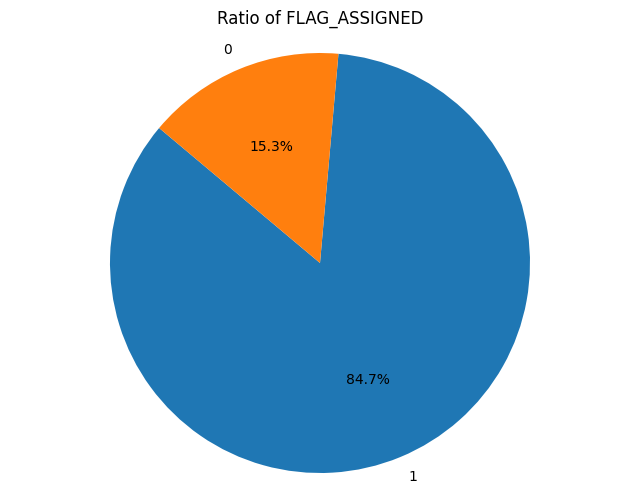

In [ ]:
# Pie chart for ratio of FLAG_ASSIGNED
plt.figure(figsize=(8, 6))
flag_counts = leads_df['FLAG_ASSIGNED'].value_counts()
plt.pie(flag_counts, labels=flag_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Ratio of FLAG_ASSIGNED')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

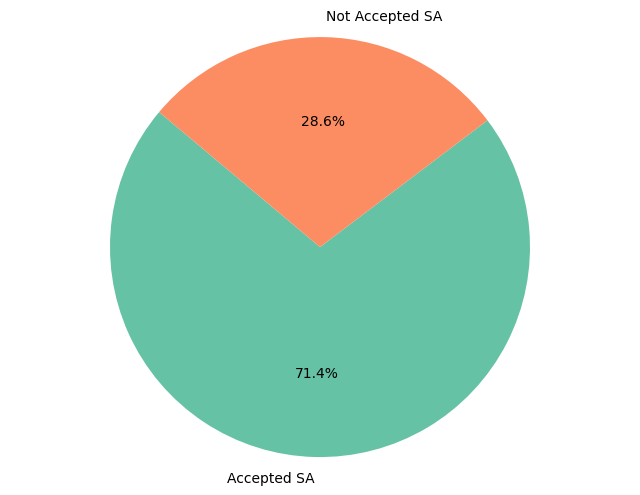

In [ ]:
# Pie chart for ratio of CODE_SA -1 in leads_df
assign_SA_status = leads_df['CODE_SA'].apply(lambda x: 'Accepted SA' if x != -1 else 'Not Accepted SA')
counts = assign_SA_status.value_counts()

plt.figure(figsize=(8, 6))
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=140, colors=['#66c2a5', '#fc8d62'])
# plt.title('Ratio of Assigned vs Not Assigned SA')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()

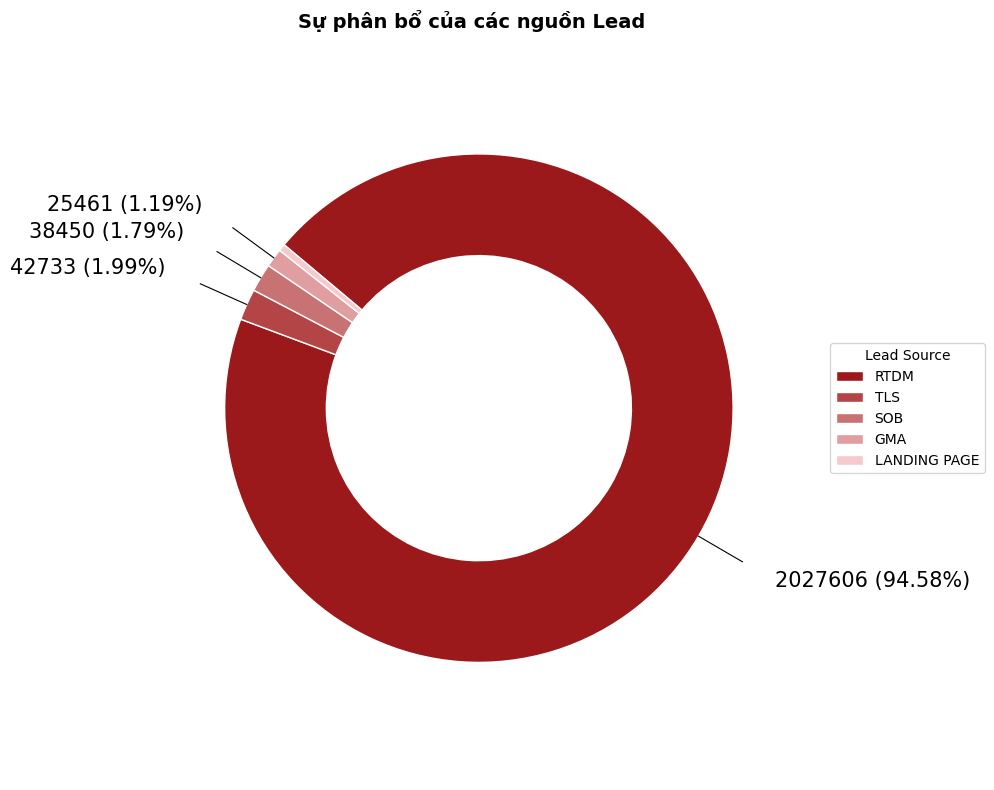

In [ ]:
# Đếm số lượng theo LEAD_SOURCE
lead_source_counts = leads_df['LEAD_SOURCE'].value_counts()
labels = lead_source_counts.index
sizes = lead_source_counts.values
total = sizes.sum()

# Tạo màu theo template đỏ
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(sizes))
)

# Tạo nhãn dạng "xxx KH (yy.yy%)"
labels_with_values = [
    f'{count} ({count / total * 100:.2f}%)' if count / total * 100 >= 0.5 else ''
    for count in sizes
]

# Vẽ donut chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, _ = ax.pie(
    sizes,
    startangle=140,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài bằng đường chỉ
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_label, y_label, label, ha=ha, va='center', fontsize=15)

# Legend ngoài
ax.legend(
    wedges,
    labels,
    title="Lead Source",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Tiêu đề và căn chỉnh
ax.set_title('Sự phân bổ của các nguồn Lead', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.tight_layout()
plt.show()

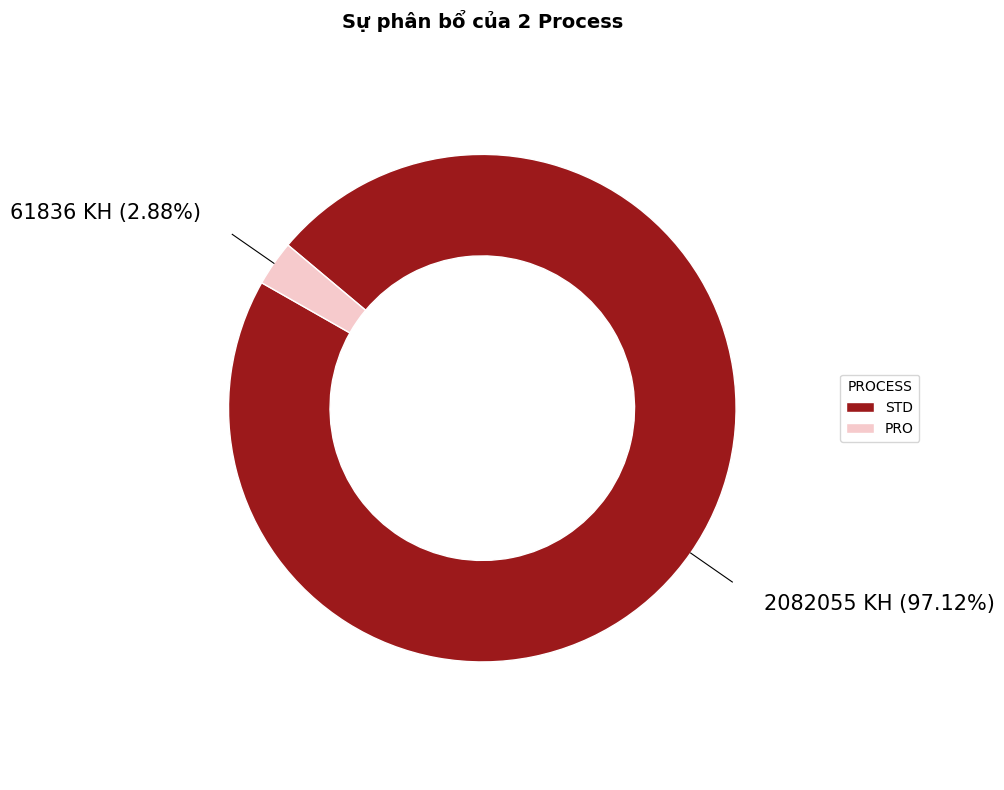

In [ ]:
# Đếm số lượng theo PROCESS
process_counts = leads_df['PROCESS'].value_counts()
labels = process_counts.index
sizes = process_counts.values
total = sizes.sum()

# Tạo màu template đỏ
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(sizes))
)

# Tạo nhãn dạng "xxx KH (yy.yy%)"
labels_with_values = [
    f'{count} KH ({count / total * 100:.2f}%)' if count / total * 100 >= 0.5 else ''
    for count in sizes
]

# Vẽ donut chart
fig, ax = plt.subplots(figsize=(10, 8))
wedges, _ = ax.pie(
    sizes,
    startangle=140,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài bằng đường chỉ
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_label, y_label, label, ha=ha, va='center', fontsize=15)

# Legend
ax.legend(
    wedges,
    labels,
    title="PROCESS",
    loc="center left",
    bbox_to_anchor=(1, 0.5)
)

# Tiêu đề và căn chỉnh
ax.set_title('Sự phân bổ của 2 Process', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.tight_layout()
plt.show()

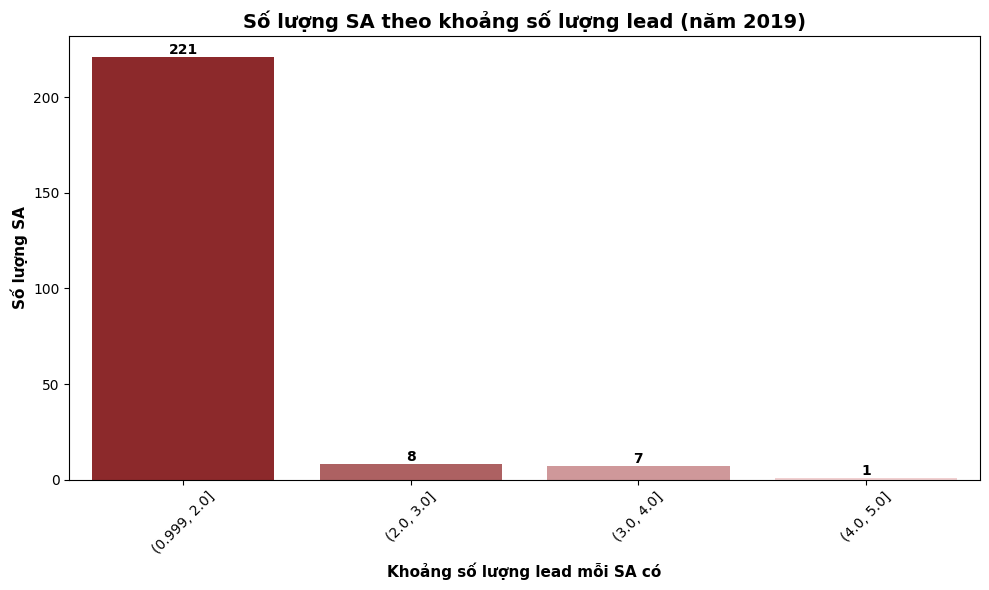

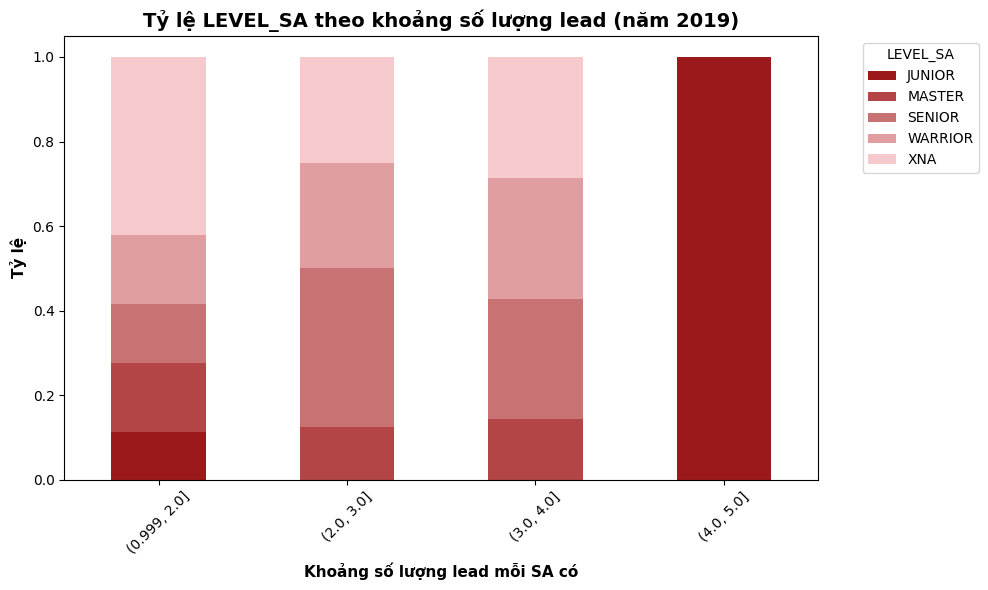

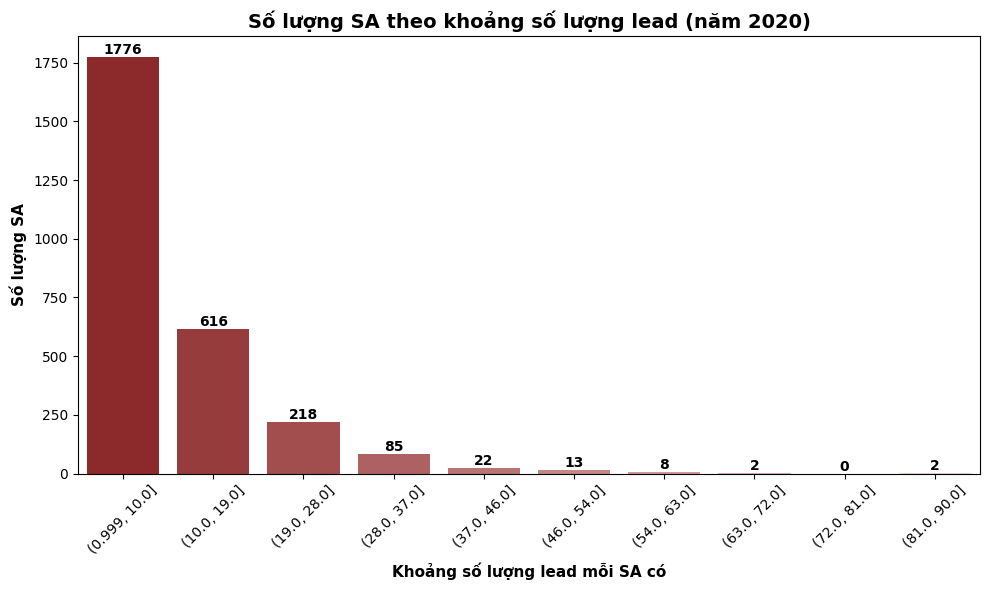

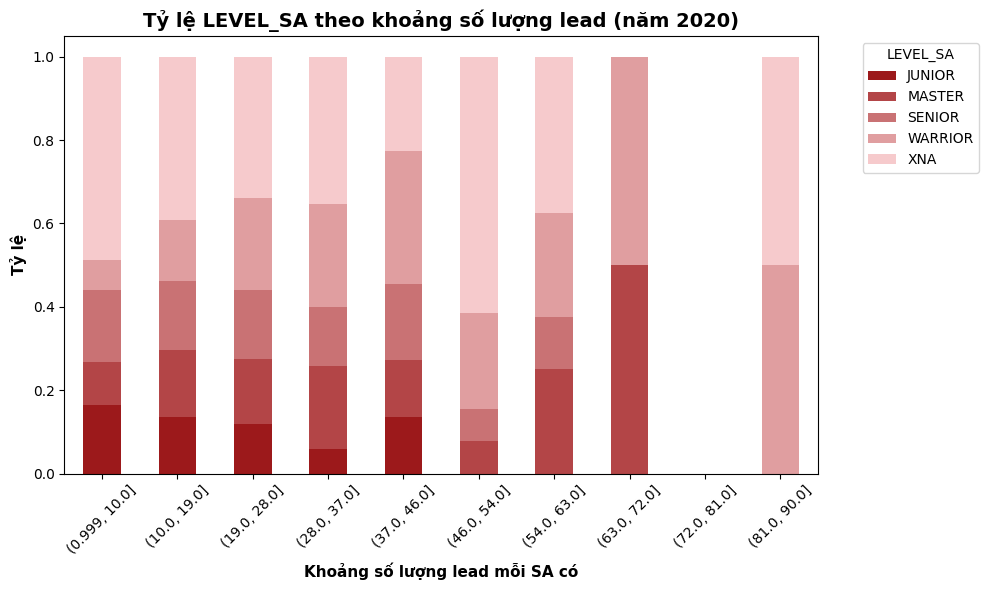

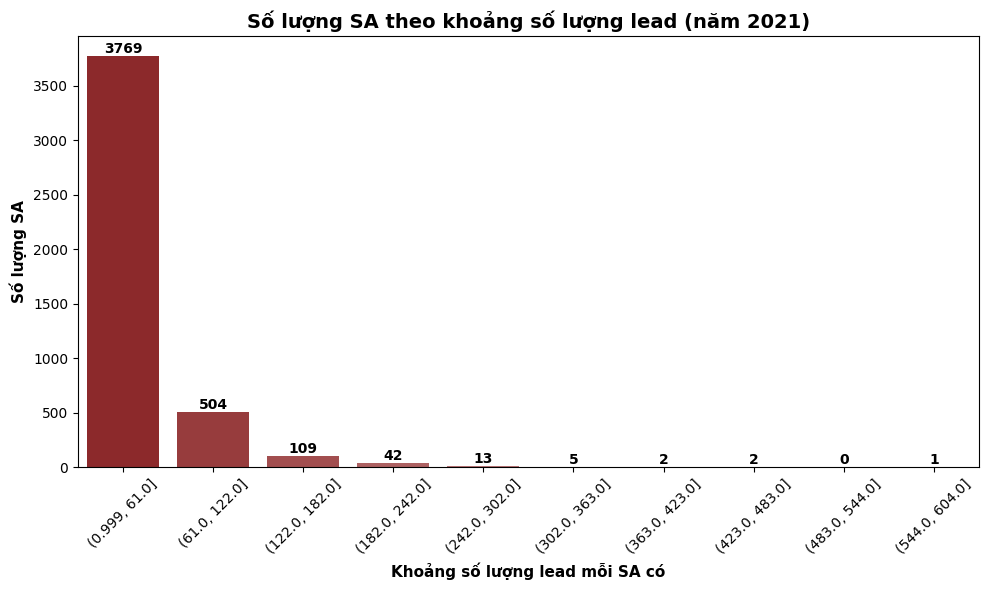

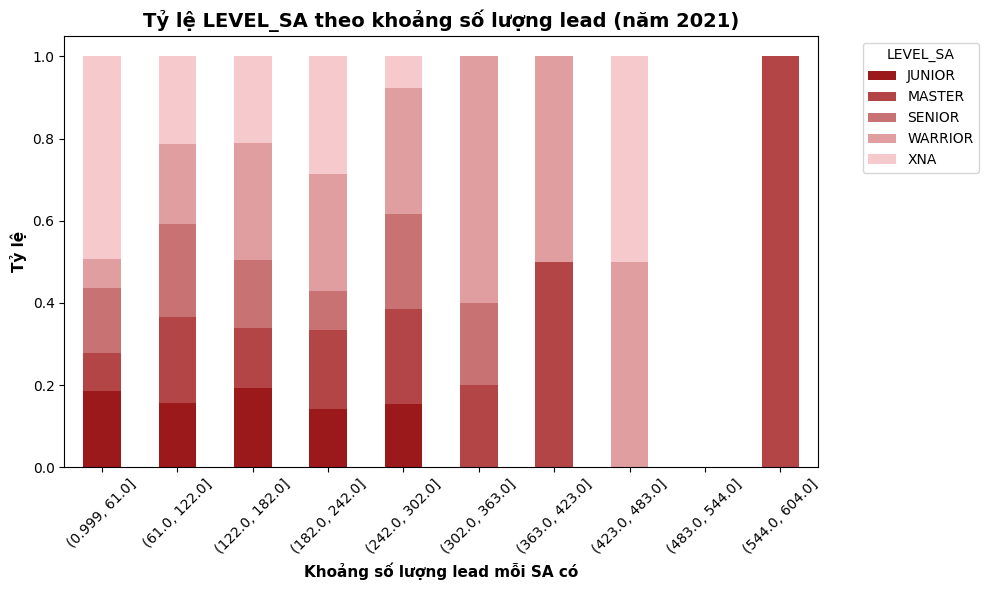

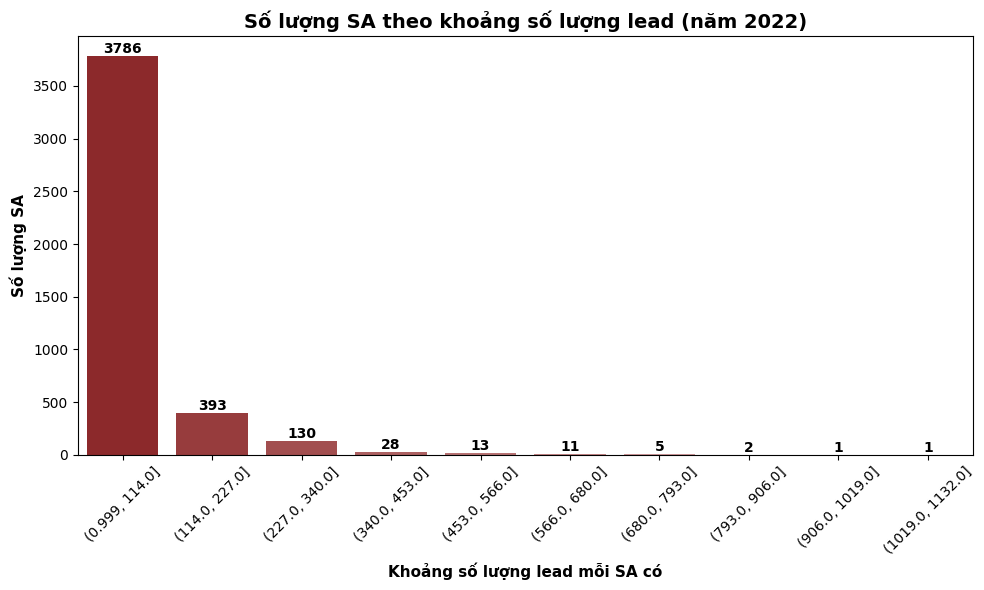

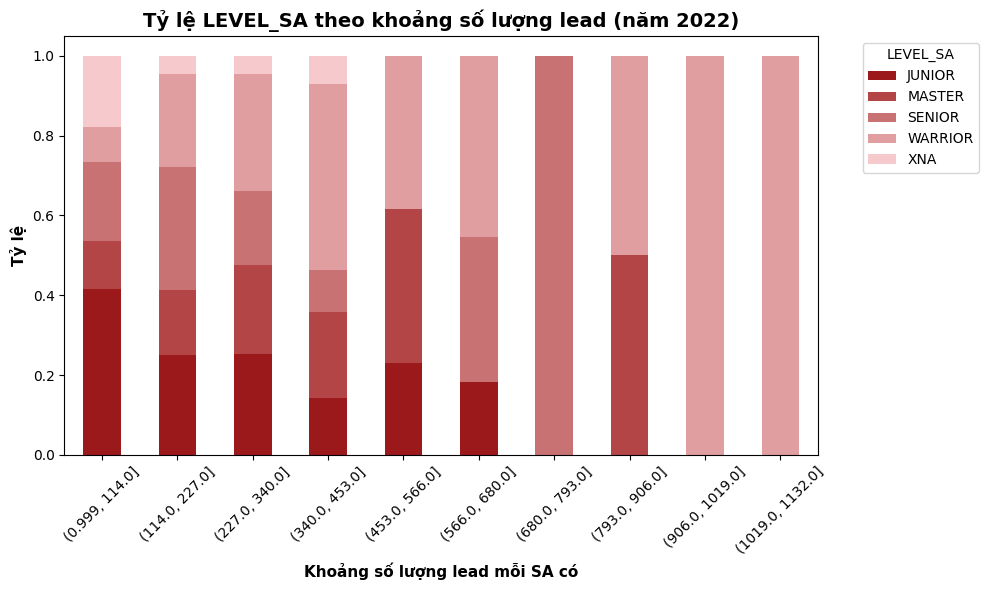

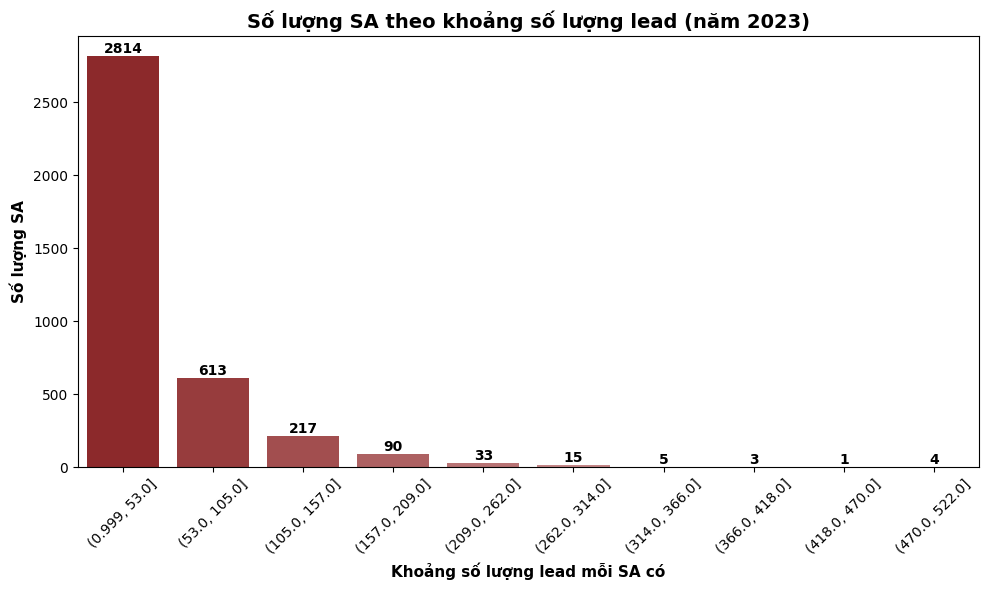

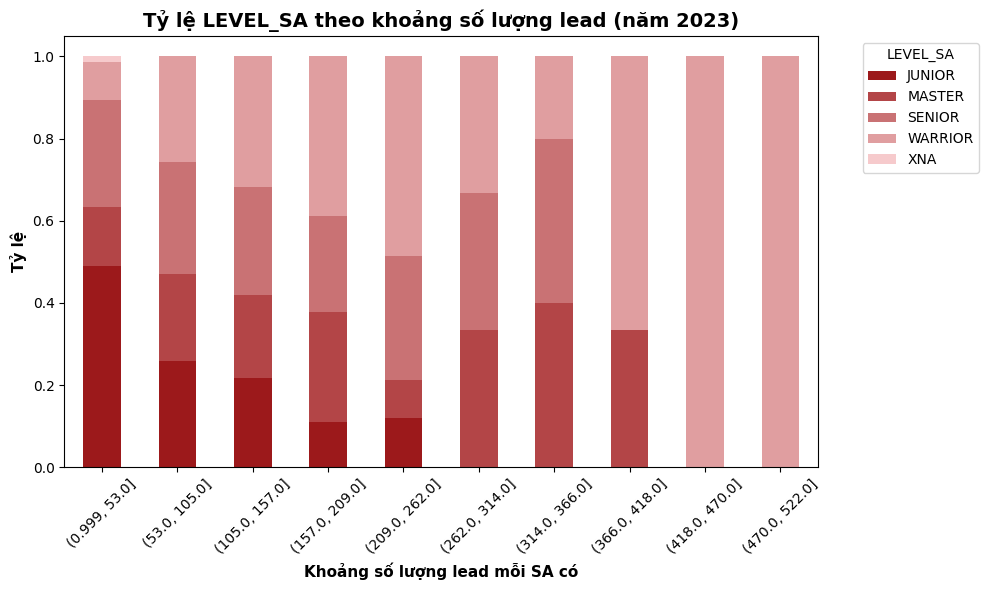

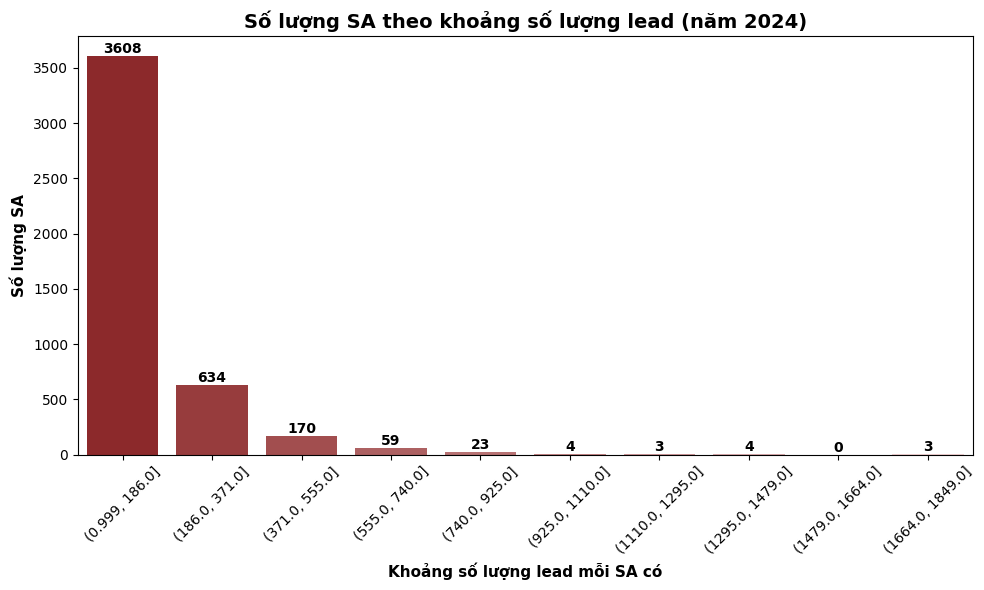

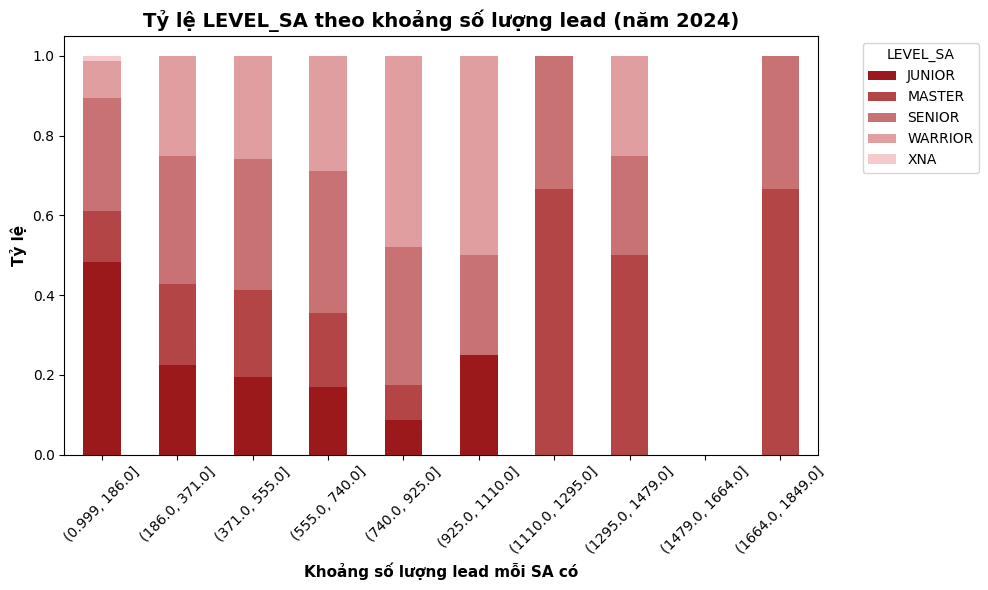

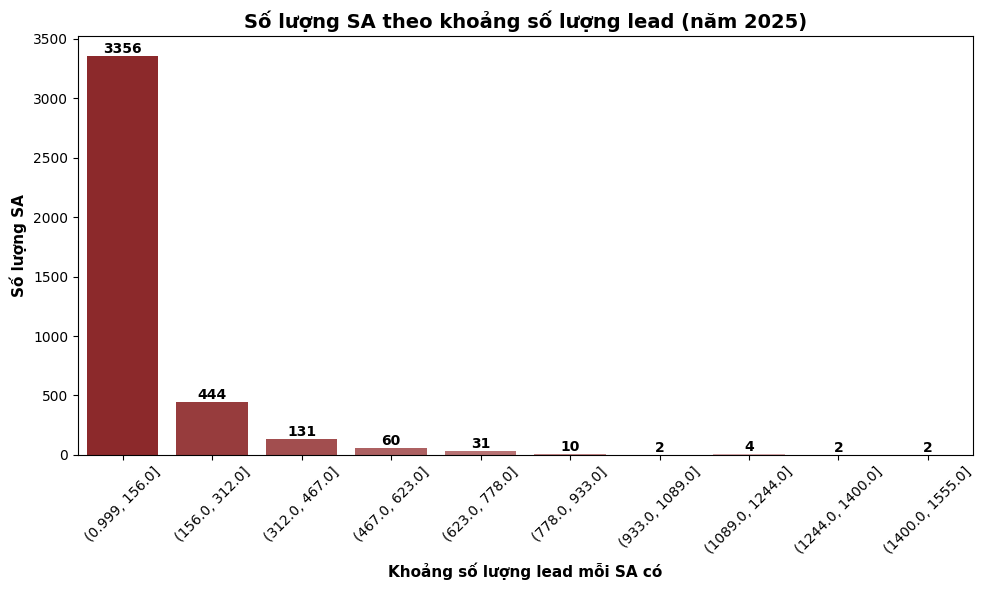

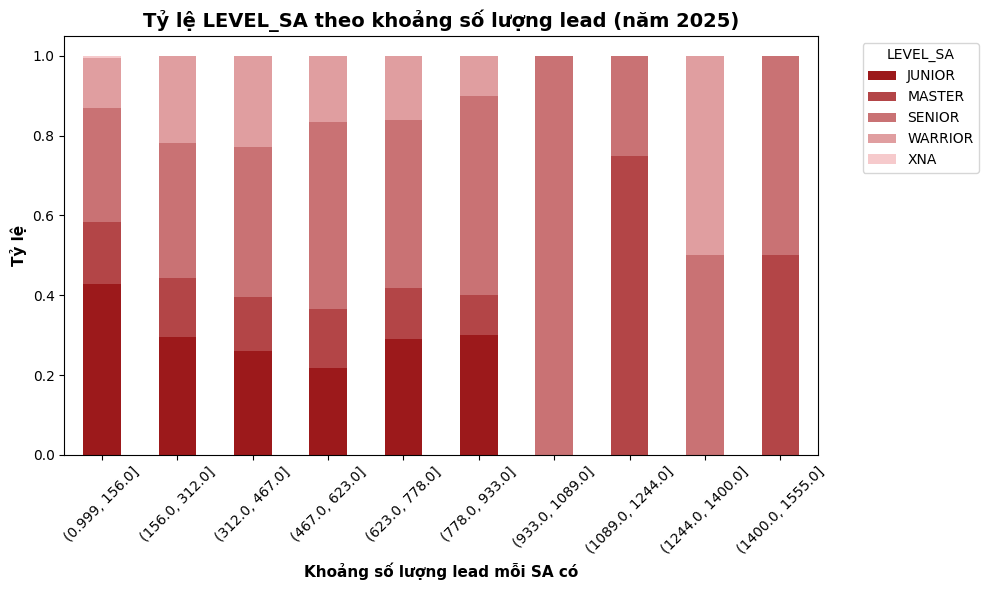

In [ ]:
custom_cmap = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])

for year in sorted(leads_df['DTIME_CREATED'].dt.year.unique()):
    valid_sa_year = leads_df[(leads_df['CODE_SA'] != -1) & (leads_df['DTIME_CREATED'].dt.year == year)]

    # Bước 1
    sa_lead_counts = valid_sa_year['CODE_SA'].value_counts()

    # Bước 2
    sa_lead_df = sa_lead_counts.reset_index()
    sa_lead_df.columns = ['CODE_SA', 'LEAD_COUNT']
    sa_lead_df = sa_lead_df.merge(
        valid_sa_year[['CODE_SA', 'LEVEL_SA']].drop_duplicates(),
        on='CODE_SA',
        how='left'
    )

    # Bước 3
    min_val, max_val = sa_lead_df['LEAD_COUNT'].min(), sa_lead_df['LEAD_COUNT'].max()
    bin_edges = np.linspace(min_val, max_val, num=11)
    bin_edges = np.round(bin_edges).astype(int)
    bin_edges = np.unique(bin_edges)

    sa_lead_df['LEAD_BIN'] = pd.cut(
        sa_lead_df['LEAD_COUNT'],
        bins=bin_edges,
        include_lowest=True
    )

    # Bước 4
    lead_count_distribution = (
        sa_lead_df
        .groupby('LEAD_BIN')['CODE_SA']
        .count()
        .reset_index(name='NUM_SA')
    )

    # Tạo bảng màu theo số lượng bin
    colors = custom_cmap(np.linspace(0, 1, len(lead_count_distribution)))

    plt.figure(figsize=(10, 6))
    bars = sns.barplot(data=lead_count_distribution, x='LEAD_BIN', y='NUM_SA', palette=colors)

    for bar in bars.patches:
        height = bar.get_height()
        plt.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',
            ha='center',
            va='bottom',
            fontsize=10,
            fontweight='bold'
        )

    plt.title(f'Số lượng SA theo khoảng số lượng lead (năm {year})', fontsize=14, fontweight='bold')
    plt.xlabel('Khoảng số lượng lead mỗi SA có', fontsize=11, fontweight='bold')
    plt.ylabel('Số lượng SA', fontsize=11, fontweight='bold')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

    # Bước 5
    level_dist = (
        sa_lead_df
        .groupby(['LEAD_BIN', 'LEVEL_SA'])['CODE_SA']
        .count()
        .reset_index(name='SA_COUNT')
    )

    level_dist['PCT'] = (
        level_dist
        .groupby('LEAD_BIN')['SA_COUNT']
        .transform(lambda x: x / x.sum())
    )

    # Bước 6
    pivot_df = level_dist.pivot(index='LEAD_BIN', columns='LEVEL_SA', values='PCT')
    ax = pivot_df.plot(kind='bar', stacked=True, figsize=(10, 6), colormap=custom_cmap)

    plt.title(f'Tỷ lệ LEVEL_SA theo khoảng số lượng lead (năm {year})', fontsize=14, fontweight='bold')
    plt.ylabel('Tỷ lệ', fontsize=11, fontweight='bold')
    plt.xlabel('Khoảng số lượng lead mỗi SA có', fontsize=11, fontweight='bold')
    plt.xticks(rotation=45)
    plt.legend(title='LEVEL_SA', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

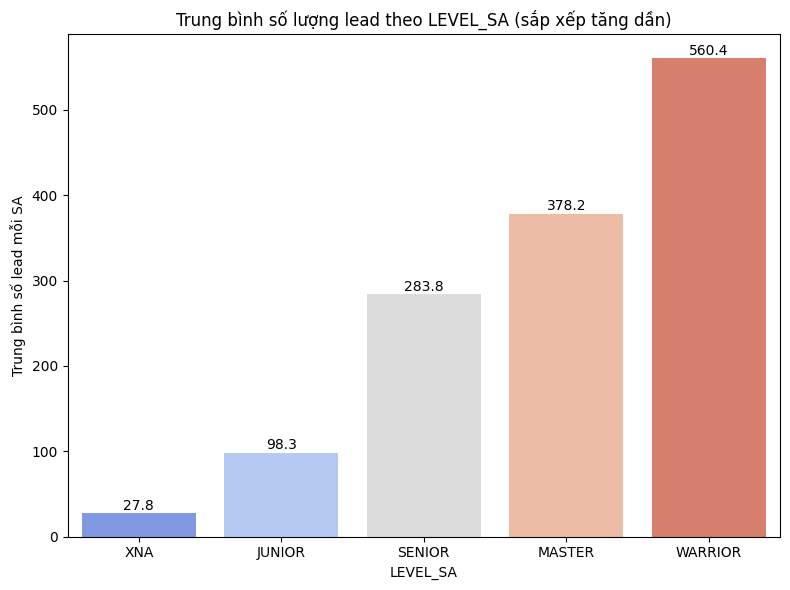

In [ ]:
# Bước 1: Lọc ra SA hợp lệ
valid_sa = leads_df[leads_df['CODE_SA'] != -1]

# Bước 2: Tính số lượng lead mỗi SA
sa_lead_counts = (
    valid_sa
    .groupby('CODE_SA')
    .size()
    .reset_index(name='LEAD_COUNT')
)

# Bước 3: Lấy LEVEL_SA của mỗi SA
sa_levels = (
    valid_sa[['CODE_SA', 'LEVEL_SA']]
    .drop_duplicates(subset='CODE_SA')
    .set_index('CODE_SA')
)

# Bước 4: Gộp LEVEL_SA vào bảng lead counts
sa_lead_counts = sa_lead_counts.join(sa_levels, on='CODE_SA')

# Bước 5: Tính trung bình số lượng lead theo LEVEL_SA
avg_leads_by_level = (
    sa_lead_counts
    .groupby('LEVEL_SA')['LEAD_COUNT']
    .mean()
    .reset_index()
    .sort_values('LEAD_COUNT')  # ← Sắp xếp theo trung bình từ thấp đến cao
)

# Bước 6: Vẽ biểu đồ
plt.figure(figsize=(8, 6))
bars = sns.barplot(
    data=avg_leads_by_level,
    x='LEVEL_SA',
    y='LEAD_COUNT',
    order=avg_leads_by_level['LEVEL_SA'],  # giữ thứ tự đúng đã sort
    palette='coolwarm'
)

# Thêm giá trị trên đầu mỗi cột (đúng thứ tự cột hiển thị)
for bar in bars.patches:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height + 0.5,
        f'{height:.1f}',
        ha='center',
        va='bottom'
    )

plt.title("Trung bình số lượng lead theo LEVEL_SA (sắp xếp tăng dần)")
plt.xlabel("LEVEL_SA")
plt.ylabel("Trung bình số lead mỗi SA")
plt.tight_layout()
plt.show()


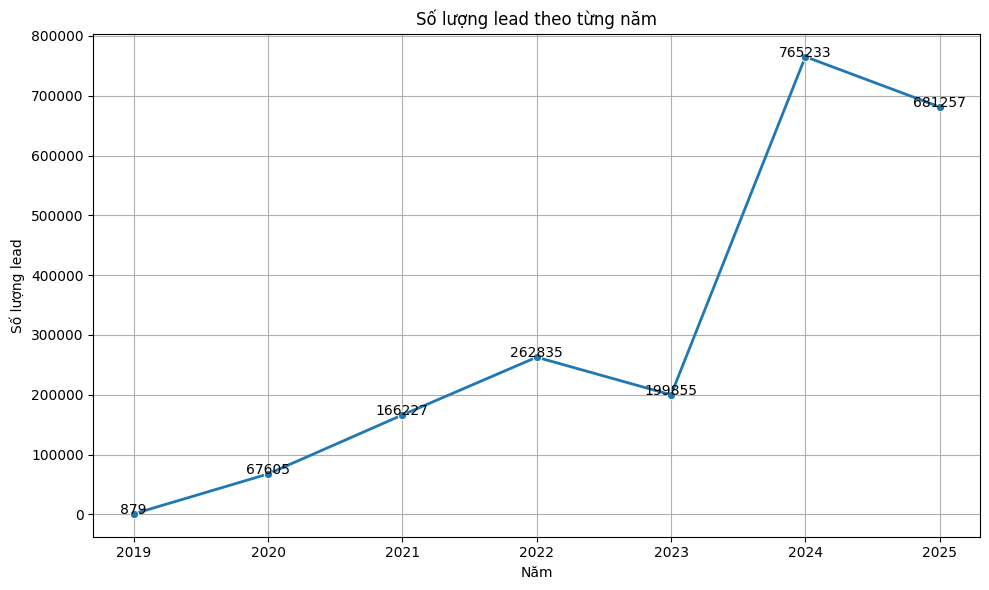

In [ ]:
# Tạo cột NĂM
leads_df['YEAR'] = leads_df['DTIME_CREATED'].dt.year

# Đếm số lượng lead theo từng năm
leads_by_year = leads_df.groupby('YEAR').size().reset_index(name='NUM_LEADS')

# Vẽ line chart
plt.figure(figsize=(10, 6))
sns.lineplot(data=leads_by_year, x='YEAR', y='NUM_LEADS', marker='o', linewidth=2)

# Gán số lượng lên trên mỗi điểm
for i, row in leads_by_year.iterrows():
    plt.text(row['YEAR'], row['NUM_LEADS'] + 50, f"{row['NUM_LEADS']}", ha='center')

plt.title("Số lượng lead theo từng năm")
plt.xlabel("Năm")
plt.ylabel("Số lượng lead")
plt.xticks(leads_by_year['YEAR'])  # Hiển thị đầy đủ các năm
plt.grid(True)
plt.tight_layout()
plt.show()

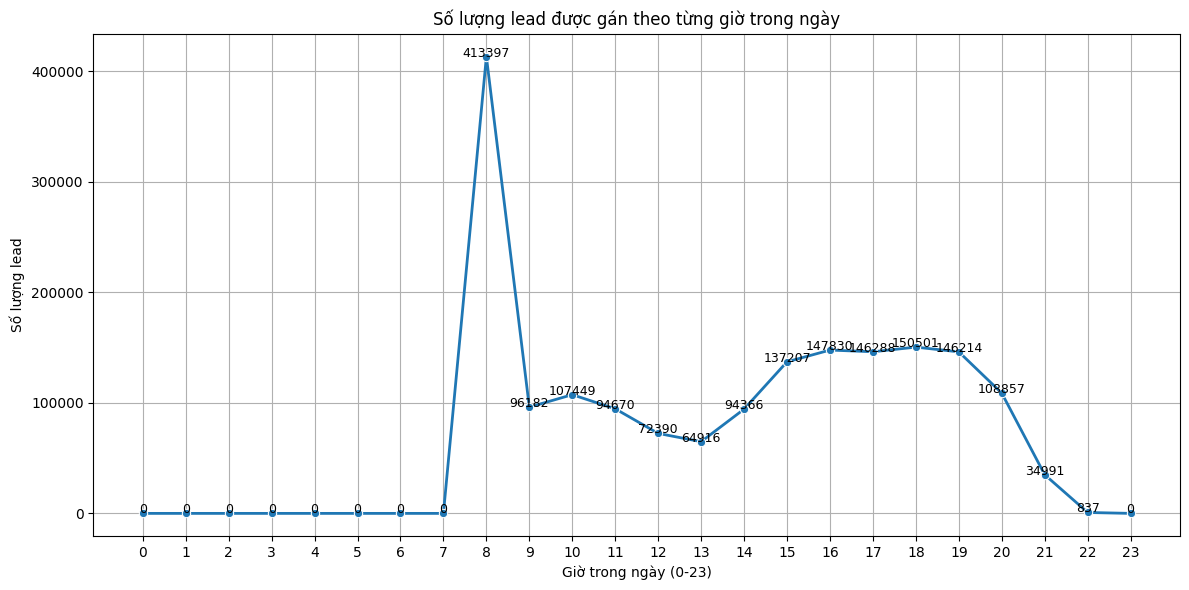

In [ ]:
# Đảm bảo datetime đúng
valid_assign_time = leads_df[leads_df['DATE_ASSIGNED'] != '2200-01-01 00:00:00']

# Tạo cột giờ
leads_df['HOUR'] = valid_assign_time['DATE_ASSIGNED'].dt.hour

# Đếm số lượng lead theo từng giờ
leads_by_hour = leads_df.groupby('HOUR').size().reset_index(name='NUM_LEADS')

# Đảm bảo đủ 24 giờ (0–23), kể cả nếu không có dữ liệu
full_hours = pd.DataFrame({'HOUR': np.arange(0, 24)})
leads_by_hour = full_hours.merge(leads_by_hour, on='HOUR', how='left').fillna(0)
leads_by_hour['NUM_LEADS'] = leads_by_hour['NUM_LEADS'].astype(int)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=leads_by_hour, x='HOUR', y='NUM_LEADS', marker='o', linewidth=2)

# Thêm số lên mỗi điểm
for i, row in leads_by_hour.iterrows():
    plt.text(row['HOUR'], row['NUM_LEADS'] + 5, f"{row['NUM_LEADS']}", ha='center', fontsize=9)

plt.title("Số lượng lead được gán theo từng giờ trong ngày")
plt.xlabel("Giờ trong ngày (0-23)")
plt.ylabel("Số lượng lead")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

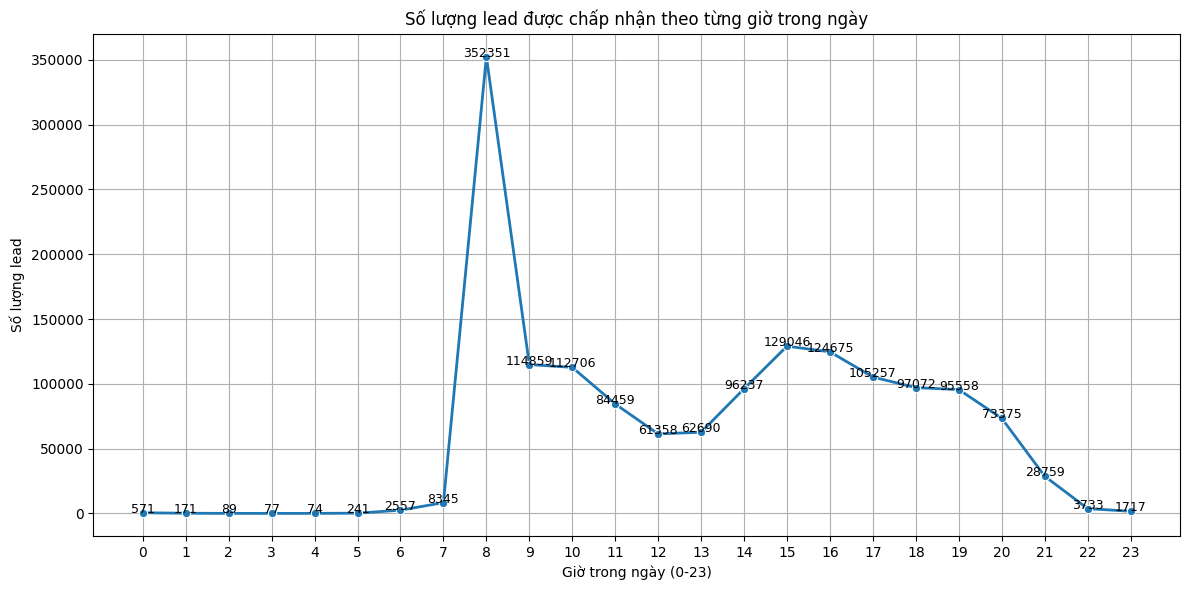

In [ ]:
# Đảm bảo datetime đúng
valid_assign_time = leads_df[leads_df['DATE_ACCEPTED'] != '2200-01-01 00:00:00']

# Tạo cột giờ
leads_df['HOUR'] = valid_assign_time['DATE_ACCEPTED'].dt.hour

# Đếm số lượng lead theo từng giờ
leads_by_hour = leads_df.groupby('HOUR').size().reset_index(name='NUM_LEADS')

# Đảm bảo đủ 24 giờ (0–23), kể cả nếu không có dữ liệu
full_hours = pd.DataFrame({'HOUR': np.arange(0, 24)})
leads_by_hour = full_hours.merge(leads_by_hour, on='HOUR', how='left').fillna(0)
leads_by_hour['NUM_LEADS'] = leads_by_hour['NUM_LEADS'].astype(int)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
sns.lineplot(data=leads_by_hour, x='HOUR', y='NUM_LEADS', marker='o', linewidth=2)

# Thêm số lên mỗi điểm
for i, row in leads_by_hour.iterrows():
    plt.text(row['HOUR'], row['NUM_LEADS'] + 5, f"{row['NUM_LEADS']}", ha='center', fontsize=9)

plt.title("Số lượng lead được chấp nhận theo từng giờ trong ngày")
plt.xlabel("Giờ trong ngày (0-23)")
plt.ylabel("Số lượng lead")
plt.xticks(range(0, 24))
plt.grid(True)
plt.tight_layout()
plt.show()

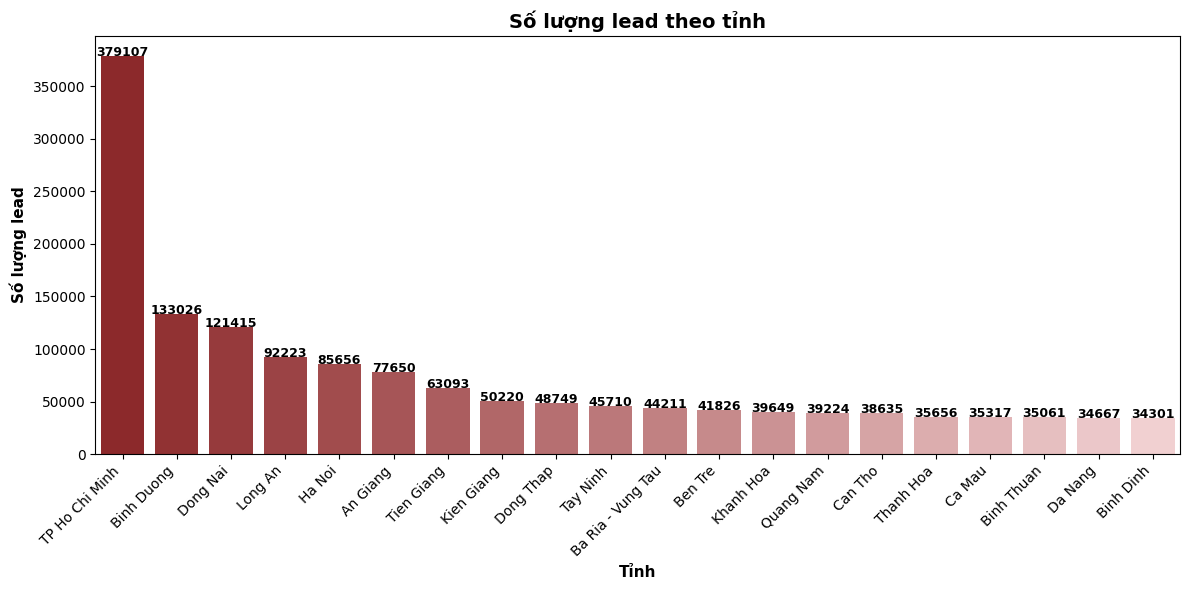

In [ ]:
lead_by_province = (
    leads_df['SALESROOM_PROVINCE']
    .dropna()
    .value_counts()
    .head(20)
    .reset_index()
)

# Đổi tên cột cho đúng
lead_by_province.columns = ['PROVINCE', 'NUM_LEADS']

# Tạo bảng màu giống template
custom_colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(lead_by_province))
)

# Vẽ biểu đồ
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=lead_by_province, x='PROVINCE', y='NUM_LEADS', palette=custom_colors)

# Ghi số lên đầu cột
for bar in ax.patches:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2, height + 5, f'{int(height)}', 
            ha='center', fontsize=9, fontweight='bold')

# Tiêu đề và nhãn trục với kiểu chữ đậm
plt.title("Số lượng lead theo tỉnh", fontsize=14, fontweight='bold')
plt.xlabel("Tỉnh", fontsize=11, fontweight='bold')
plt.ylabel("Số lượng lead", fontsize=11, fontweight='bold')

# Xoay nhãn trục X
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
valid_sa = leads_df[leads_df['CODE_SA'] != -1]
lead_per_sa = (
    valid_sa
    .groupby('CODE_SA')
    .size()
    .reset_index(name='NUM_LEADS')
)

lead_per_sa

CODE_SA  NUM_LEADS
0       12791        366
1       12797        231
2       12813        506
3       12892         25
4       12893        124
...       ...        ...
9605   121783        680
9606   121824        229
9607   121834        246
9608   121887          1
9609   121917        129

[9610 rows x 2 columns]

In [ ]:
employee_full = employee_df.merge(lead_per_sa, left_on='CODE_EMPLOYEE', right_on='CODE_SA', how='left')
employee_full['NUM_LEADS'] = employee_full['NUM_LEADS'].fillna(0).astype(int)
employee_full

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169  Female   
1              46945  2021-01-11   2021-07-26                  35377  Female   
2              47297  2021-02-22   2024-03-13                 115717  Female   
3              47428  2021-03-01   2021-04-11                   2101  Female   
4              47435  2021-03-01   2021-11-11                 115642  Female   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745  Female   
11379         120002  2013-10-14   2022-06-01                  17466  Female   
11380         120825  2013-11-27   2021-08-15                  23979  Female   
11381         121209  2013-12-16          NaN                  16010    Male   
11382         121368  2013-12-18          NaN                  24493  Female   

       BIRTH_DATE LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0      2001-11-28      XNA           270                  19            23   
1      1999-12-23      XNA           196                  21            25   
2      1999-06-10   JUNIOR          1115                  21            26   
3      1998-10-10      XNA            41                  22            26   
4      1988-02-18      XNA           255                  33            37   
...           ...      ...           ...                 ...           ...   
11378  1992-11-05      XNA          2979                  20            32   
11379  1992-05-01      XNA          3152                  21            33   
11380  1991-03-26      XNA          2818                  22            34   
11381  1988-03-11   JUNIOR          4195                  25            37   
11382  1989-02-02   JUNIOR          4193                  24            36   

          SA_PROVINCE  FLAG_MANAGER   CODE_SA  NUM_LEADS  
0          Ninh Thuan         False   46911.0          8  
1            Dong Nai         False   46945.0         19  
2      TP Ho Chi Minh         False   47297.0        187  
3          Binh Thuan         False       NaN          0  
4      TP Ho Chi Minh         False   47435.0         44  
...               ...           ...       ...        ...  
11378       Thai Binh         False  118286.0         24  
11379       Dong Thap         False  120002.0        252  
11380  TP Ho Chi Minh         False  120825.0          3  
11381       Dong Thap         False  121209.0        337  
11382         Nghe An         False  121368.0        204  

[11383 rows x 14 columns]

In [ ]:
def target_feature(row):
    if row['NAME_CREDIT_STATUS'] in ['In Preprocess', 'In Process']:
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] in ['Signed', 'Active', 'Finished', 'Paid off', 'Written off', 'Sold']:
        return 'Signed'
    if row['NAME_CREDIT_STATUS'] == 'Approved':
        if pd.notna(row['SIGN_CONTRACT_TIME']):
            return 'Signed'
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] == 'Rejected':
        return 'Rejected'
    if row['NAME_CREDIT_STATUS'] == 'Cancelled':
        if pd.notna(row['SIGN_CONTRACT_TIME']):
            return 'Signed'
        return 'Rejected'

final_df['SIGNED'] = final_df.apply(target_feature, axis=1)
# final_df = final_df[final_df['SIGNED'] != 'Processing']
final_df

SKP_CREDIT_CASE  SKP_CLIENT        NAME_EDUCATION_TYPE_x  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900899        342935765     7514929      Junior school education   
900900        342935889    14994675        High school education   

        CNT_CHILDREN_x  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                    0        7000000.0                     0   
1                    1        4000000.0                     0   
2                    0        2000000.0                     0   
3                    0        5000000.0                     0   
4                    0       10000000.0                     0   
...                ...              ...                   ...   
900896               1       25000000.0                     0   
900897               2       15000000.0                     0   
900898               1       15000000.0                     0   
900899               0       20000000.0                     0   
900900               0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  MANAGER_CODE_EMPLOYEE  \
0                Finished  Consumer Durable  ...                  26872   
1                Finished  Consumer Durable  ...                  19780   
2                Rejected  Consumer Durable  ...                    889   
3                Finished  Consumer Durable  ...                  34590   
4                Finished  Consumer Durable  ...                   1406   
...                   ...               ...  ...                    ...   
900896             Signed         Cash Loan  ...                 114569   
900897             Signed         Cash Loan  ...                 109522   
900898             Signed      Two-wheelers  ...                   1428   
900899           Approved         Cash Loan  ...                    248   
900900             Active         Cash Loan  ...                    248   

        GENDER  BIRTH_DATE  LEVEL_SA WORKING_DAYS AGE_EMPLOYEE_HIRED  \
0       Female  1985-03-24    SENIOR         2969                 30   
1       Female  1992-08-03    MASTER         2800                 22   
2       Female  1989-11-15    MASTER         2633                 28   
3       Female  1994-06-30       XNA         1473                 22   
4       Female  1992-07-10       XNA         1624                 24   
...        ...         ...       ...          ...                ...   
900896  Female  1988-06-01   WARRIOR         1458                 33   
900897    Male  2002-02-23   WARRIOR         1311                 19   
900898    Male  2000-08-17    JUNIOR          261                 24   
900899  

In [ ]:
approved_per_sa = (
    final_df
    .groupby('CODE_EMPLOYEE')['SIGNED']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

approved_per_sa

SIGNED  CODE_EMPLOYEE  Processing  Rejected  Signed
0               12791           0        48     204
1               12797           0        50     200
2               12813           0        99     300
3               12892           0        36     197
4               12893           0        75     217
...               ...         ...       ...     ...
9275           121824           0       129     270
9276           121834           0        78     294
9277           121887           0        46     166
9278           121917           0        52     144
9279           121944           0        32     150

[9280 rows x 4 columns]

In [ ]:
employee_full = employee_full.merge(approved_per_sa, on='CODE_EMPLOYEE', how='left')
employee_full.drop(columns=['CODE_SA'], inplace=True)
employee_full = employee_full.fillna(0)
employee_full

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169  Female   
1              46945  2021-01-11   2021-07-26                  35377  Female   
2              47297  2021-02-22   2024-03-13                 115717  Female   
3              47428  2021-03-01   2021-04-11                   2101  Female   
4              47435  2021-03-01   2021-11-11                 115642  Female   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745  Female   
11379         120002  2013-10-14   2022-06-01                  17466  Female   
11380         120825  2013-11-27   2021-08-15                  23979  Female   
11381         121209  2013-12-16            0                  16010    Male   
11382         121368  2013-12-18            0                  24493  Female   

       BIRTH_DATE LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0      2001-11-28      XNA           270                  19            23   
1      1999-12-23      XNA           196                  21            25   
2      1999-06-10   JUNIOR          1115                  21            26   
3      1998-10-10      XNA            41                  22            26   
4      1988-02-18      XNA           255                  33            37   
...           ...      ...           ...                 ...           ...   
11378  1992-11-05      XNA          2979                  20            32   
11379  1992-05-01      XNA          3152                  21            33   
11380  1991-03-26      XNA          2818                  22            34   
11381  1988-03-11   JUNIOR          4195                  25            37   
11382  1989-02-02   JUNIOR          4193                  24            36   

          SA_PROVINCE  FLAG_MANAGER  NUM_LEADS  Processing  Rejected  Signed  
0          Ninh Thuan         False          8         0.0       5.0    10.0  
1            Dong Nai         False         19         0.0       0.0     2.0  
2      TP Ho Chi Minh         False        187         0.0      13.0    36.0  
3          Binh Thuan         False          0         0.0       0.0     0.0  
4      TP Ho Chi Minh         False         44         0.0       0.0     3.0  
...               ...           ...        ...         ...       ...     ...  
11378       Thai Binh         False         24         0.0      24.0    48.0  
11379       Dong Thap         False        252         0.0      27.0    68.0  
11380  TP Ho Chi Minh         False          3         0.0      40.0   189.0  
11381       Dong Thap         False        337         0.0      64.0   253.0  
11382         Nghe An         False        204         0.0      98.0   183.0  

[11383 rows x 16 columns]

In [ ]:
employee_full['CONVERSATION_RATE'] = employee_full.apply(
    lambda row: row['Signed'] / row['NUM_LEADS'] if row['NUM_LEADS'] > 0 else 0,
    axis=1
).fillna(0)

employee_full

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169  Female   
1              46945  2021-01-11   2021-07-26                  35377  Female   
2              47297  2021-02-22   2024-03-13                 115717  Female   
3              47428  2021-03-01   2021-04-11                   2101  Female   
4              47435  2021-03-01   2021-11-11                 115642  Female   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745  Female   
11379         120002  2013-10-14   2022-06-01                  17466  Female   
11380         120825  2013-11-27   2021-08-15                  23979  Female   
11381         121209  2013-12-16            0                  16010    Male   
11382         121368  2013-12-18            0                  24493  Female   

       BIRTH_DATE LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0      2001-11-28      XNA           270                  19            23   
1      1999-12-23      XNA           196                  21            25   
2      1999-06-10   JUNIOR          1115                  21            26   
3      1998-10-10      XNA            41                  22            26   
4      1988-02-18      XNA           255                  33            37   
...           ...      ...           ...                 ...           ...   
11378  1992-11-05      XNA          2979                  20            32   
11379  1992-05-01      XNA          3152                  21            33   
11380  1991-03-26      XNA          2818                  22            34   
11381  1988-03-11   JUNIOR          4195                  25            37   
11382  1989-02-02   JUNIOR          4193                  24            36   

          SA_PROVINCE  FLAG_MANAGER  NUM_LEADS  Processing  Rejected  Signed  \
0          Ninh Thuan         False          8         0.0       5.0    10.0   
1            Dong Nai         False         19         0.0       0.0     2.0   
2      TP Ho Chi Minh         False        187         0.0      13.0    36.0   
3          Binh Thuan         False          0         0.0       0.0     0.0   
4      TP Ho Chi Minh         False         44         0.0       0.0     3.0   
...               ...           ...        ...         ...       ...     ...   
11378       Thai Binh         False         24         0.0      24.0    48.0   
11379       Dong Thap         False        252         0.0      27.0    68.0   
11380  TP Ho Chi Minh         False          3         0.0      40.0   189.0   
11381       Dong Thap         False        337         0.0      64.0   253.0   
11382         Nghe An         False        204         0.0      98.0   183.0   

       CONVERSATION_RATE  
0               1.250000  
1               0.105263  
2               0.192513  
3               0.000000  
4               0.068182  
...                  ...  
11378           2.000000  
11379           0.269841  
11380          63.000000  
11381           0.750742  
11382           0.897059  

[11383 rows x 17 columns]

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import seaborn as sns
import unicodedata
# from unidecode import unidecode
import warnings
warnings.filterwarnings("ignore")

In [ ]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280377 entries, 0 to 4280376
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  APPLY_CONTRACT_TIME    object 
 15  APPROVE_CONTRACT_TIME  object 
 16  SIGN_CONTRACT_TIME     object 
 17  APPLY_EMPLOYEE         int64  
 18  SIGN_EMPLOYEE          int64  
 19  FIRST_DUE              int64  
 20  SECOND_DUE             int64  
 21  THIRD_DUE              int64  
 22  FOURTH_DUE        

In [ ]:
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  APPLY_CONTRACT_TIME  \
0                 Rejected  Consumer Durable  ...  2020-01-21 11:05:16   
1                 Finished  Consumer Durable  ...  2020-01-23 21:16:52   
2                 Finished  Consumer Durable  ...  2020-03-06 21:25:19   
3                 Finished  Consumer Durable  ...  2020-03-10 19:33:37   
4                 Finished  Consumer Durable  ...  2019-01-31 19:09:53   
...                    ...               ...  ...                  ...   
4280372             Active         Cash Loan  ...  2025-06-04 11:15:56   
4280373             Active       Credit Card  ...  2025-06-04 16:17:23   
4280374             Active         Cash Loan  ...  2025-06-04 13:41:32   
4280375             Active         Cash Loan  ...  2025-06-04 11:43:25   
4280376          Cancelled         Cash Loan  ...  2025-06-04 18:06:45   

         APPROVE_CONTRACT_TIME   SIGN_CONTRACT_TIME  APPLY_EMPLOYEE  \
0                          NaN                  NaN              -1   
1          2020-01-23 21:19:41  2020-01-23 21:31:32              -1   
2          2020-03-06 21:28:01  2020-03-06 21:30:53           23074   
3          2020-03-10 19:36:53  2020-03-10 19:37:27              -1   
4          2019-01-31 19:11:02  2019-01-31 21:46:12           20815   
...                        ...                  ...             ...   
4280372    2025-06-04 11:19:56  2025-06-04 11:25:57              -1   
4280373    2025-06-04 16:18:00  2025-06-04 16:18:25              -1   
4280374    2025-06-04 14:20:52  2025-06-04 14:27:19           33883   
4280375    2025-06-

In [ ]:
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
customer_df

SKP_CLIENT NAME_GENDER          NAME_EDUCATION_TYPE  DATE_BIRTH  \
0               676      Female        High school education  1966-03-18   
1              1470        Male        High school education  1967-12-27   
2              7123        Male      Junior school education  1972-10-03   
3             10711      Female  Elementary (primary) school  1978-01-01   
4             12407        Male        High school education  1986-03-14   
...             ...         ...                          ...         ...   
1000523   126809534        Male                          XNA  1990-04-02   
1000524   127462754        Male                          XNA  2005-04-30   
1000525   126394510        Male                          XNA  1995-07-24   
1000526   118415150      Female                          XNA  2000-05-09   
1000527   126803169        Male                          XNA  2004-09-27   

         CNT_CHILDREN NAME_SALARY_FREQUENCY  CNT_PERSON_DEPENDENT  \
0                 0.0                   XNA                  -1.0   
1                 1.0                   XNA                  -1.0   
2                 2.0                   XNA                   6.0   
3                 1.0                   XNA                   1.0   
4                 1.0                   XNA                  -1.0   
...               ...                   ...                   ...   
1000523           0.0                   XNA                  -1.0   
1000524          -1.0                   XNA                  -1.0   
1000525           0.0                   XNA                  -1.0   
1000526          -1.0                   XNA                  -1.0   
1000527          -1.0                   XNA                  -1.0   

         AVG_SESSION_PER_WEEK_2025  AGE_CLIENT CLIENT_PROVINCE  
0                              0.0          59         Long An  
1                              0.0          57  TP Ho Chi Minh  
2                              0.0          52         Dak Lak  
3                              0.0          47      Tien Giang  
4                              0.0          39         Gia Lai  
...                            ...         ...             ...  
1000523                        0.0          35               0  
1000524                        0.0          20               0  
1000525                        0.0          29               0  
1000526                        0.0          25               0  
1000527                        0.0          20               0  

[1000528 rows x 10 columns]

In [ ]:
employee_df = pd.read_csv(r'cleaned_data/EMPLOYEE.csv')
employee_df

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169  Female   
1              46945  2021-01-11   2021-07-26                  35377  Female   
2              47297  2021-02-22   2024-03-13                 115717  Female   
3              47428  2021-03-01   2021-04-11                   2101  Female   
4              47435  2021-03-01   2021-11-11                 115642  Female   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745  Female   
11379         120002  2013-10-14   2022-06-01                  17466  Female   
11380         120825  2013-11-27   2021-08-15                  23979  Female   
11381         121209  2013-12-16          NaN                  16010    Male   
11382         121368  2013-12-18          NaN                  24493  Female   

       BIRTH_DATE LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0      2001-11-28      XNA           270                  19            23   
1      1999-12-23      XNA           196                  21            25   
2      1999-06-10   JUNIOR          1115                  21            26   
3      1998-10-10      XNA            41                  22            26   
4      1988-02-18      XNA           255                  33            37   
...           ...      ...           ...                 ...           ...   
11378  1992-11-05      XNA          2979                  20            32   
11379  1992-05-01      XNA          3152                  21            33   
11380  1991-03-26      XNA          2818                  22            34   
11381  1988-03-11   JUNIOR          4195                  25            37   
11382  1989-02-02   JUNIOR          4193                  24            36   

          SA_PROVINCE  FLAG_MANAGER  
0          Ninh Thuan         False  
1            Dong Nai         False  
2      TP Ho Chi Minh         False  
3          Binh Thuan         False  
4      TP Ho Chi Minh         False  
...               ...           ...  
11378       Thai Binh         False  
11379       Dong Thap         False  
11380  TP Ho Chi Minh         False  
11381       Dong Thap         False  
11382         Nghe An         False  

[11383 rows x 12 columns]

In [ ]:
leads_df = pd.read_csv(r'cleaned_data/LEADS.csv')
rtdm_count = (leads_df['LEAD_SOURCE'] == 'RTDM').sum()
print(f"Số lượng RTDM: {rtdm_count}")

Số lượng RTDM: 2027606


In [ ]:
shop_df = pd.read_csv(r'cleaned_data/SHOP.csv')
shop_df

CODE_POS SALESROOM_PROVINCE
0       410163          Hai Phong
1       400714            Nghe An
2       240068         Binh Phuoc
3       170525         Kien Giang
4       540196            Lao Cai
...        ...                ...
64338   121362           An Giang
64339   121361           An Giang
64340   300501           Bac Lieu
64341    15026     TP Ho Chi Minh
64342   510497             Son La

[64343 rows x 2 columns]

In [ ]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT        NAME_EDUCATION_TYPE_x  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN_x  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                     0        9000000.0                     0   
1                     0       10000000.0                     0   
2                     0        7000000.0                     0   
3                     0        7000000.0                     0   
4                     1        4000000.0                     0   
...                 ...              ...                   ...   
4280372               0       15000000.0                     0   
4280373               0       12000000.0                     0   
4280374               0       50000000.0                     0   
4280375               0       20000000.0                     0   
4280376               0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  FLAG_INS  NAME_GENDER  \
0                 Rejected  Consumer Durable  ...         0         Male   
1                 Finished  Consumer Durable  ...         1         Male   
2                 Finished  Consumer Durable  ...         1       Female   
3                 Finished  Consumer Durable  ...         1       Female   
4                 Finished  Consumer Durable  ...         1       Female   
...                    ...               ...  ...       ...          ...   
4280372             Active         Cash Loan  ...         0         Male   
4280373             Active       Credit Card  ...         1         Male   
4280374             Active         Cash Loan  ...         1         Male   
4280375             Active         Cash Loan  ...         0         Male   
4280376          Cancelled         Cash Loan  ...         0       Female   

               NAME_EDUCATION_TYPE_y  DATE_BIRTH CNT_CHILDREN_y  \
0        Elementary (primary) school  1980-08-03            0.0   
1                    Master's degree  1973-05-26            2.0   
2                  Bachelor's degree  1992-07-11            1.0   
3        Elementary (primary) school  1975-02-11            2.0   
4              High school education  1991-08-21            2.0   
...                              ...         ...            ...   
4280372              Master's degree  1972-03-26            2.0   
4280373        High school education  1993-10-03            0.0   
4280374        High school education  1976-01-01            0.0   
4280375    

In [ ]:
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT        NAME_EDUCATION_TYPE_x  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900899        342935765     7514929      Junior school education   
900900        342935889    14994675        High school education   

        CNT_CHILDREN_x  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                    0        7000000.0                     0   
1                    1        4000000.0                     0   
2                    0        2000000.0                     0   
3                    0        5000000.0                     0   
4                    0       10000000.0                     0   
...                ...              ...                   ...   
900896               1       25000000.0                     0   
900897               2       15000000.0                     0   
900898               1       15000000.0                     0   
900899               0       20000000.0                     0   
900900               0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  LEAVING_DATE  \
0                Finished  Consumer Durable  ...    2023-11-29   
1                Finished  Consumer Durable  ...    2022-11-30   
2                Rejected  Consumer Durable  ...           NaN   
3                Finished  Consumer Durable  ...    2021-01-01   
4                Finished  Consumer Durable  ...    2021-04-13   
...                   ...               ...  ...           ...   
900896             Signed         Cash Loan  ...           NaN   
900897             Signed         Cash Loan  ...           NaN   
900898             Signed      Two-wheelers  ...           NaN   
900899           Approved         Cash Loan  ...           NaN   
900900             Active         Cash Loan  ...           NaN   

        MANAGER_CODE_EMPLOYEE  GENDER  BIRTH_DATE LEVEL_SA WORKING_DAYS  \
0                       26872  Female  1985-03-24   SENIOR         2969   
1                       19780  Female  1992-08-03   MASTER         2800   
2                         889  Female  1989-11-15   MASTER         2633   
3                       34590  Female  1994-06-30      XNA         1473   
4                        1406  Female  1992-07-10      XNA         1624   
...                       ...     ...         ...      ...          ...   
900896                 114569  Female  1988-06-01  WARRIOR         1458   
900897                 109522    Male  2002-02-23  WARRIOR         1311   
900898                   1428    Male  2000-08-17   JUNIOR          261   
900899                    248    Male  1991-04-22   SENIOR          268   
900900     

### **Univariate**

#### **1.1. Contract Table**

##### 1.1.1 `SKP_CLIENT`

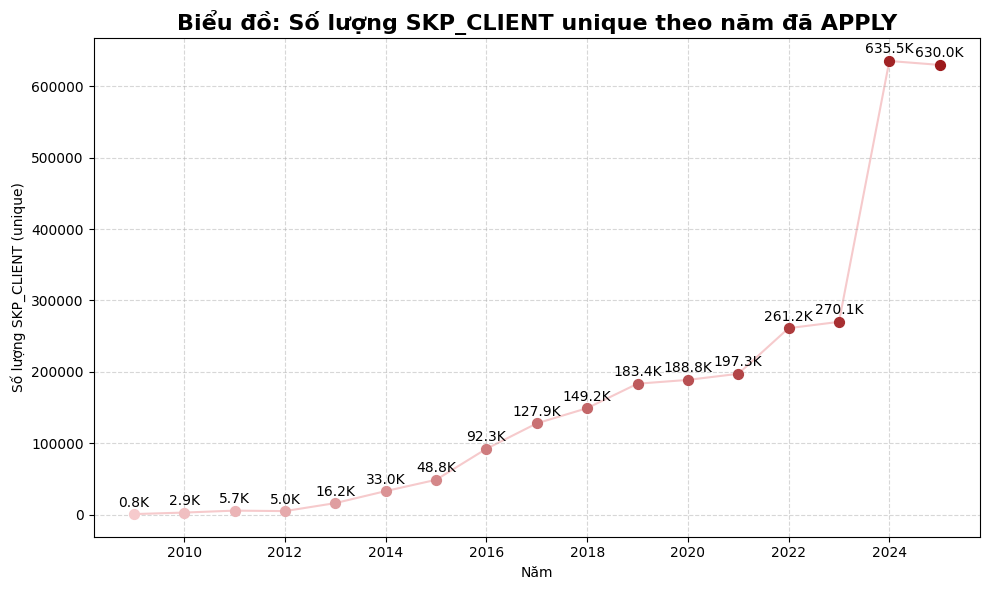

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Làm sạch tên cột (nếu cần)
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chuyển APPLY_CONTRACT_TIME thành datetime (nếu chưa)
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], errors='coerce')

# Trích xuất NĂM
contract_df['YEAR'] = contract_df['APPLY_CONTRACT_TIME'].dt.year

# Đếm số khách hàng duy nhất theo từng năm
yearly_clients = contract_df.groupby('YEAR')['SKP_CLIENT'].nunique()

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(yearly_clients)))
label_padding = max(yearly_clients.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_clients.index, yearly_clients.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(yearly_clients.index, yearly_clients.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y/1000:.1f}K', ha='center', va='bottom', fontsize=10)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lượng SKP_CLIENT unique theo năm đã APPLY', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('Số lượng SKP_CLIENT (unique)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1.1.2 `AMT_INCOME_MAIN`

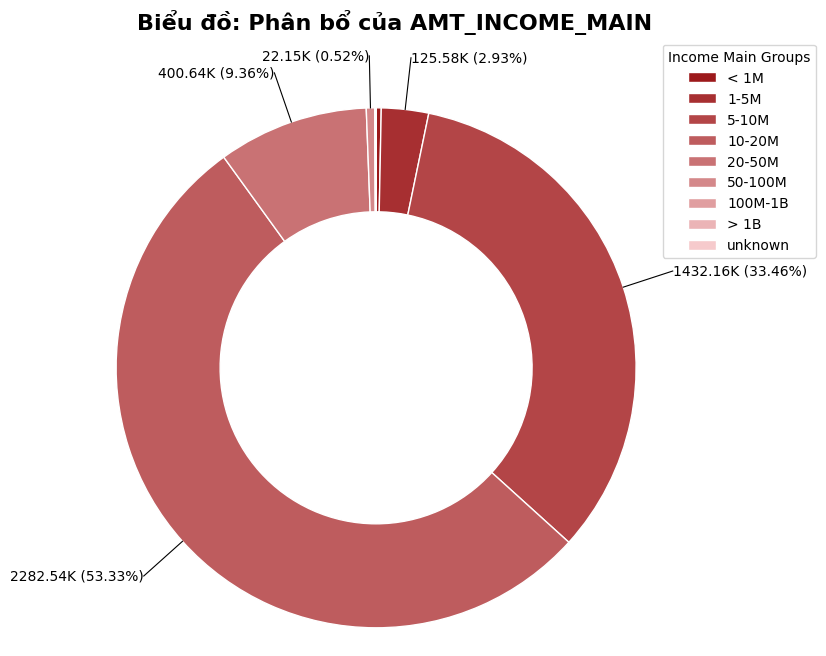

In [ ]:
# Define age bins and corresponding labels 
bins = [-float('inf'), 0, 1_000_000, 5_000_000, 10_000_000, 20_000_000, 50_000_000, 100_000_000, 1_000_000_000, float('inf')]
labels = ['unknown', '< 1M', '1-5M', '5-10M', '10-20M', '20-50M', '50-100M', '100M-1B', '> 1B']

# Categorize ages into defined age groups with a specified order
contract_df['INCOME_MAIN_GROUP'] = pd.cut(
    contract_df['AMT_INCOME_MAIN'],
    bins=bins,
    labels=pd.Categorical(labels, ordered=True),
    right=False)

# Count the number of users in each age group, preserving label order
# Sắp xếp theo labels gốc, nhưng đưa 'unknown' về cuối
ordered_labels = [l for l in labels if l != 'unknown'] + ['unknown']
income_main_counts = contract_df['INCOME_MAIN_GROUP'].value_counts().reindex(ordered_labels)

# Calculate total users, then format labels showing both count and percentage
total = income_main_counts.sum()
percentages = income_main_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(income_main_counts, percentages)
]

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(income_main_counts)))

# Draw pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    income_main_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Draw lines connecting each wedge to its external label
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue 

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Add a legend
ax.legend(
    wedges,
    income_main_counts.index,
    title="Income Main Groups",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ của AMT_INCOME_MAIN', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


##### 1.1.3 `AMT_INCOME_HOUSEHOLD`

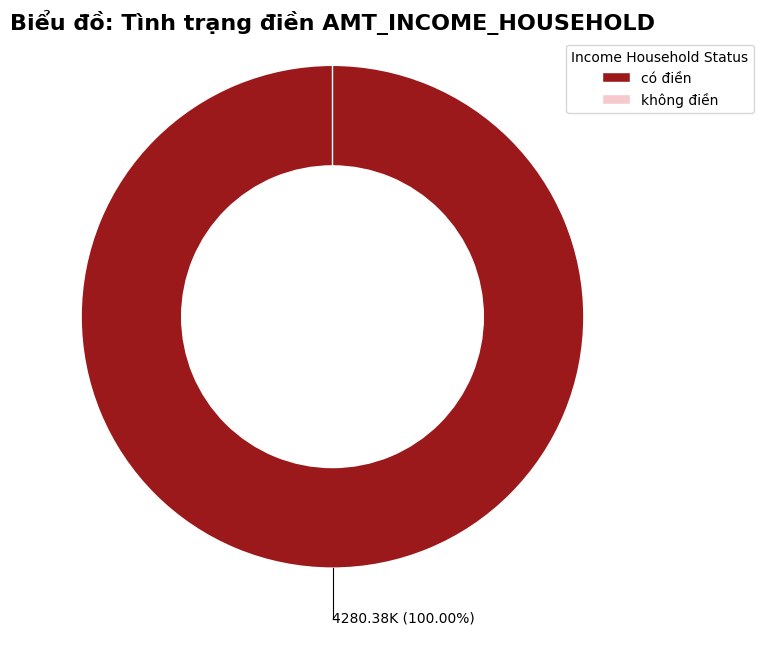

In [ ]:
# Gộp nhóm theo có/không điền
contract_df['INCOME_HOUSEHOLD_GROUP'] = np.where(
    contract_df['AMT_INCOME_HOUSEHOLD'].notna(),
    'có điền',
    'không điền'
)

# Đếm số lượng theo từng nhóm
income_household_counts = contract_df['INCOME_HOUSEHOLD_GROUP'].value_counts()
income_household_counts = income_household_counts.reindex(['có điền', 'không điền']).fillna(0)


# Tính phần trăm
total = income_household_counts.sum()
percentages = income_household_counts / total * 100

# Hiển thị nhãn theo định dạng: Số lượng (Phần trăm)
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(income_household_counts, percentages)
]

# Tạo màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(income_household_counts)))

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    income_household_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Vẽ các đường nối và nhãn ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    income_household_counts.index,
    title="Income Household Status",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Tình trạng điền AMT_INCOME_HOUSEHOLD', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


##### 1.1.4 `NAME_INCOME_TYPE`

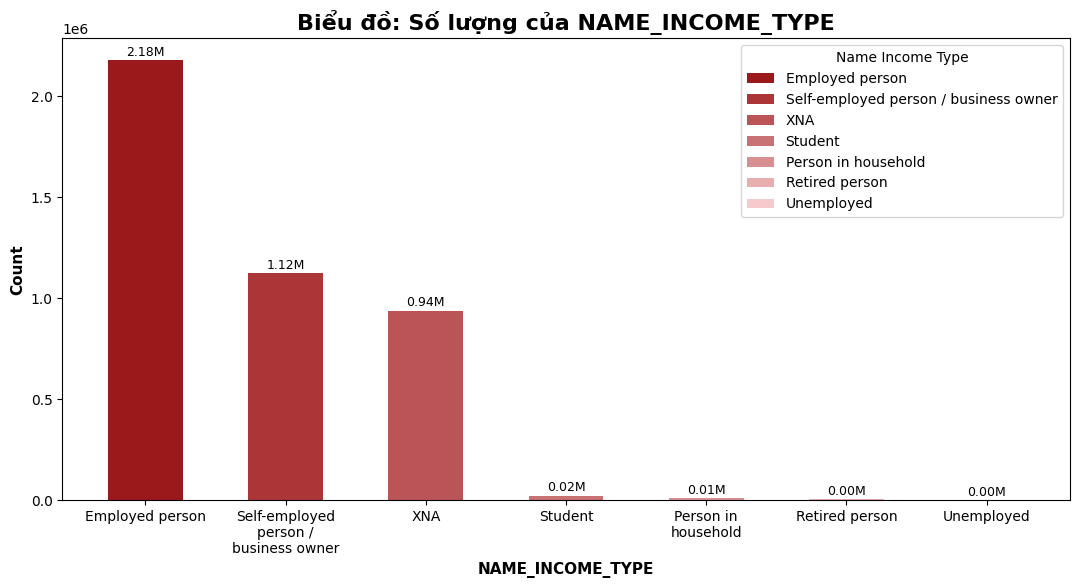

In [ ]:
import textwrap

# Count the number of occurrences for each category in 'sex' column
name_income_counts = contract_df['NAME_INCOME_TYPE'].value_counts()
labels = name_income_counts.index
values = name_income_counts.values
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxK (xx.xx%)"
total = name_income_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars, spacing them closely
x = np.arange(len(labels)) * 0.15

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(name_income_counts)))

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # vẫn dùng label gốc trong legend
    title="Name Income Type",
    loc="best"
)


plt.xticks(x, wrapped_labels)
plt.xlabel('NAME_INCOME_TYPE', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng của NAME_INCOME_TYPE', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=9)

plt.show()


##### 1.1.5 `CODE_PROFESSION`

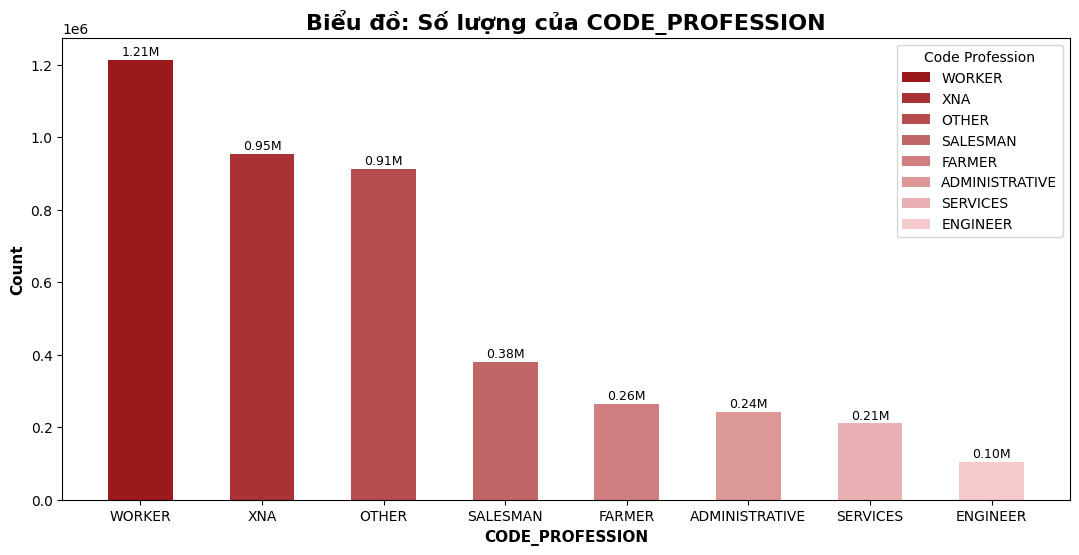

In [ ]:
# Count the number of occurrences for each category in 'sex' column
code_profession_counts = contract_df['CODE_PROFESSION'].value_counts()
labels = code_profession_counts.index
values = code_profession_counts.values

# Tính tổng và tạo nhãn định dạng "xxxK (xx.xx%)"
total = code_profession_counts.sum()
labels_with_values = [
    f'{count / 1000000:.2f}M' for count in values
]

# Create positions for the bars, spacing them closely
x = np.arange(len(labels)) * 0.15

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(code_profession_counts)))

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,
    title="Code Profession",
    loc="best"
)

# Set the x-axis tick labels at bar positions
plt.xticks(x, labels)
plt.xlabel('CODE_PROFESSION', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng của CODE_PROFESSION', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=9)

plt.show()


##### 1.1.6 `PRODUCT`

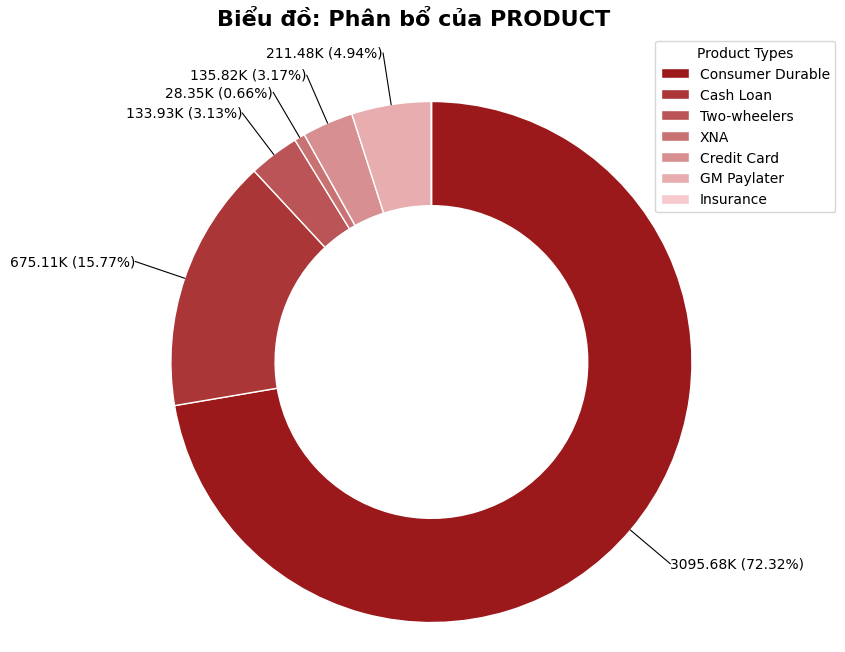

In [ ]:
# Lấy danh sách labels từ dữ liệu ban đầu
labels = contract_df['PRODUCT'].dropna().unique().tolist()

# Đưa 'unknown' về cuối nếu có
ordered_labels = [l for l in labels if l != 'unknown'] + (['unknown'] if 'unknown' in labels else [])

# Đếm số lượng từng nhóm PRODUCT, sắp xếp theo ordered_labels
product_counts = contract_df['PRODUCT'].value_counts().reindex(ordered_labels).fillna(0)

# Tính tổng và phần trăm
total = product_counts.sum()
percentages = product_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(product_counts, percentages)
]

# Tạo màu cho từng nhóm (tùy chỉnh theo nhu cầu)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(product_counts)))

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    product_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Vẽ đường nối và label ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue 

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    ordered_labels,
    title="Product Types",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ của PRODUCT', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


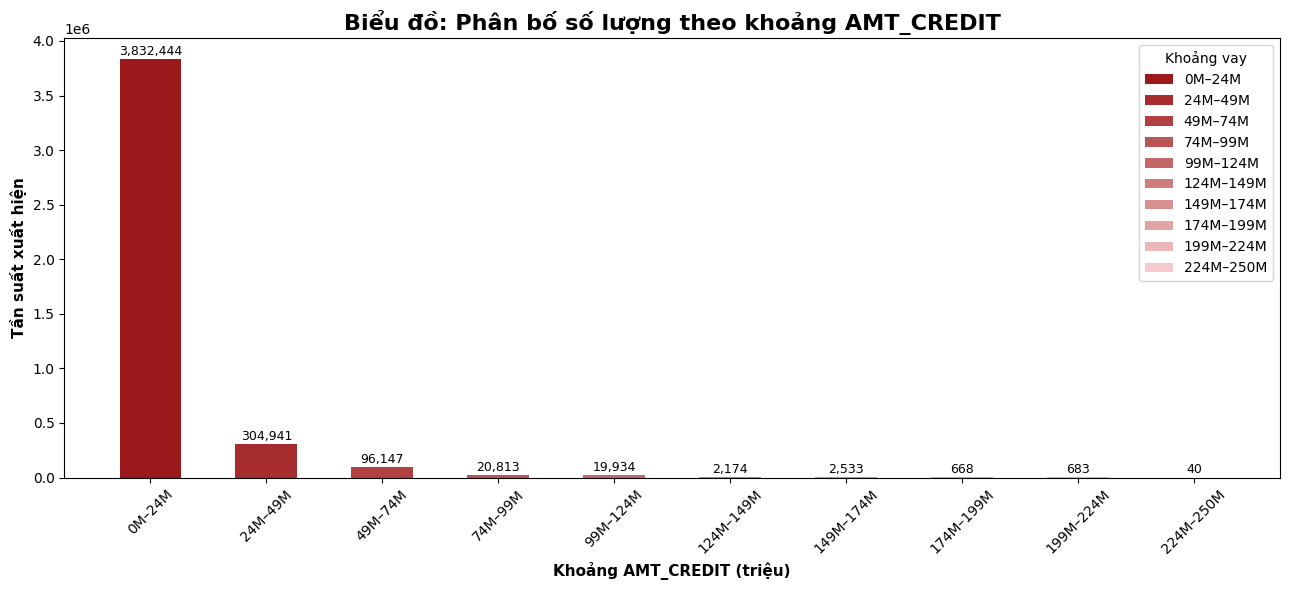

In [ ]:

# Làm sạch tên cột
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chia AMT_CREDIT thành 10 khoảng đều nhau
contract_df['AMT_CREDIT_BIN'] = pd.cut(contract_df['AMT_CREDIT'], bins=10)

# Đếm số lần xuất hiện của mỗi bin
amt_credit_bin_counts = contract_df['AMT_CREDIT_BIN'].value_counts().sort_index()

# Lấy labels và values
labels = [f"{int(b.left/1_000_000)}M–{int(b.right/1_000_000)}M" for b in amt_credit_bin_counts.index]
values = amt_credit_bin_counts.values
x = np.arange(len(labels)) * 0.15

# Tạo bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(values)))
labels_with_values = [f'{val:,}' for val in values]

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

# Chú thích
plt.legend(bars, labels, title="Khoảng vay", loc="best")
plt.xticks(x, labels, rotation=45)
plt.xlabel('Khoảng AMT_CREDIT (triệu)', fontsize=11, fontweight='bold')
plt.ylabel('Tần suất xuất hiện', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Phân bố số lượng theo khoảng AMT_CREDIT', fontsize=16, fontweight='bold')

# Gắn nhãn số
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=9)

plt.tight_layout()
plt.show()


##### 1.1.7 `NAME_CREDIT_STATUS`

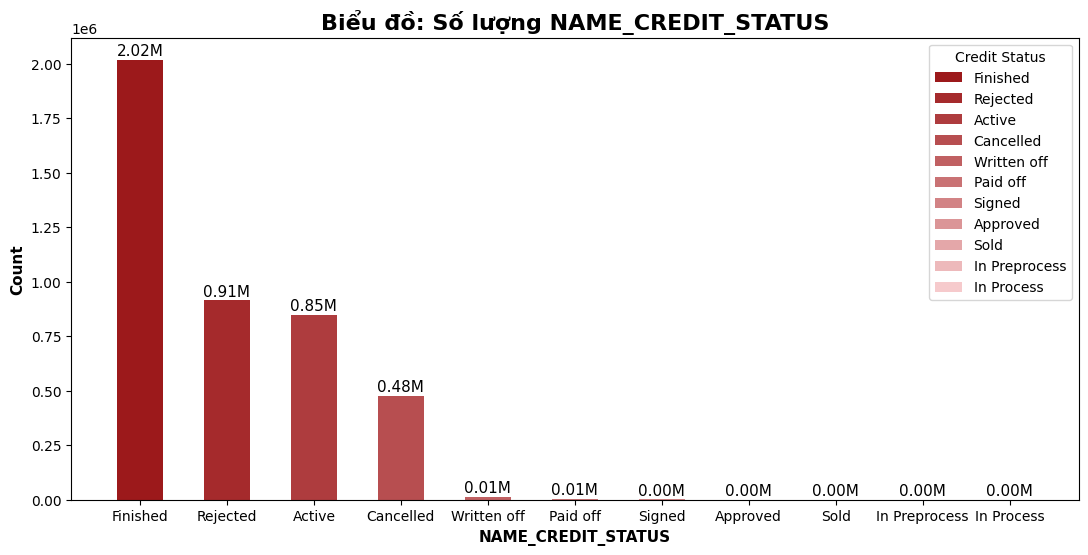

In [ ]:
import textwrap

# Count the number of occurrences for each category in 'NAME_CREDIT_STATUS'
status_counts = contract_df['NAME_CREDIT_STATUS'].value_counts()
labels = status_counts.index
values = status_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = status_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars
x = np.arange(len(labels)) * 0.15

# Create palette (sửa lại biến chính xác theo status_counts)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(status_counts)))

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Credit Status",
    loc="best"
)

# Set nhãn trục X đã được wrap
plt.xticks(x, wrapped_labels)

plt.xlabel('NAME_CREDIT_STATUS', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng NAME_CREDIT_STATUS', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()


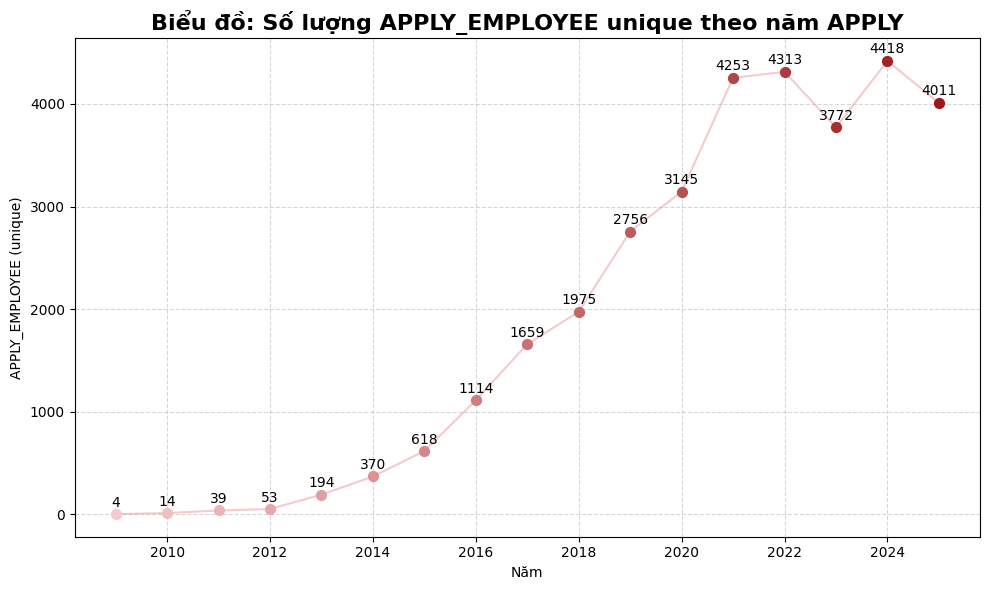

In [ ]:
# Làm sạch tên cột (nếu cần)
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chuyển APPLY_CONTRACT_TIME thành datetime (nếu chưa)
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], errors='coerce')

# Trích xuất NĂM
contract_df['YEAR'] = contract_df['APPLY_CONTRACT_TIME'].dt.year

# Đếm số khách hàng duy nhất theo từng năm
yearly_employee_apply = contract_df.groupby('YEAR')['APPLY_EMPLOYEE'].nunique()

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(yearly_employee_apply)))
label_padding = max(yearly_employee_apply.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_employee_apply.index, yearly_employee_apply.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(yearly_employee_apply.index, yearly_employee_apply.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y:}', ha='center', va='bottom', fontsize=10)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lượng APPLY_EMPLOYEE unique theo năm APPLY', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('APPLY_EMPLOYEE (unique)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


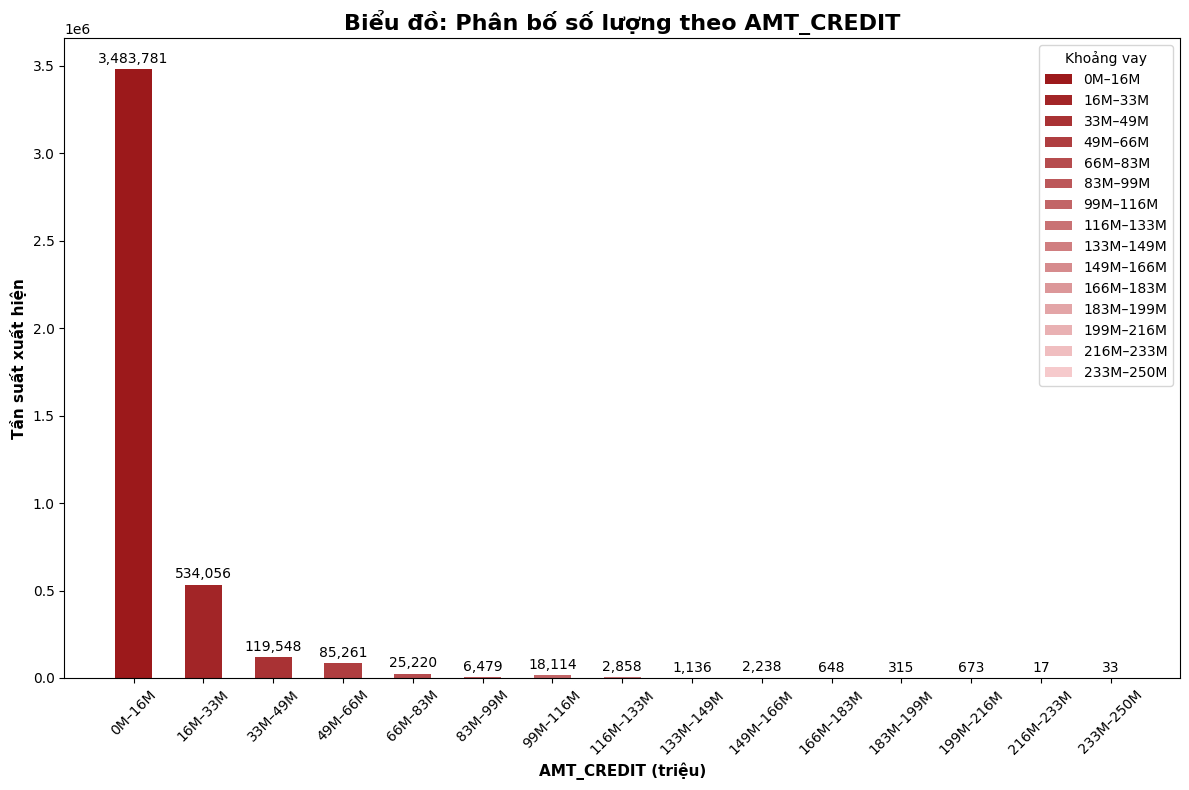

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap

# Làm sạch tên cột
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chia AMT_CREDIT thành 10 khoảng đều nhau
contract_df['AMT_CREDIT_BIN'] = pd.cut(contract_df['AMT_CREDIT'], bins=15)

# Đếm số lần xuất hiện của mỗi bin
amt_credit_bin_counts = contract_df['AMT_CREDIT_BIN'].value_counts().sort_index()

# Lấy labels và values
labels = [f"{int(b.left/1_000_000)}M–{int(b.right/1_000_000)}M" for b in amt_credit_bin_counts.index]
values = amt_credit_bin_counts.values
x = np.arange(len(labels)) * 0.15

# Tạo bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(values)))
labels_with_values = [f'{val:,}' for val in values]

# Vẽ biểu đồ
plt.figure(figsize=(12, 8))
bars = plt.bar(x, values, color=colors, width=0.08)

# Chú thích
plt.legend(bars, labels, title="Khoảng vay", loc="best")
plt.xticks(x, labels, rotation=45)
plt.xlabel('AMT_CREDIT (triệu)', fontsize=11, fontweight='bold')
plt.ylabel('Tần suất xuất hiện', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Phân bố số lượng theo AMT_CREDIT', fontsize=16, fontweight='bold')

# Gắn nhãn số
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=10)

plt.tight_layout()
plt.show()


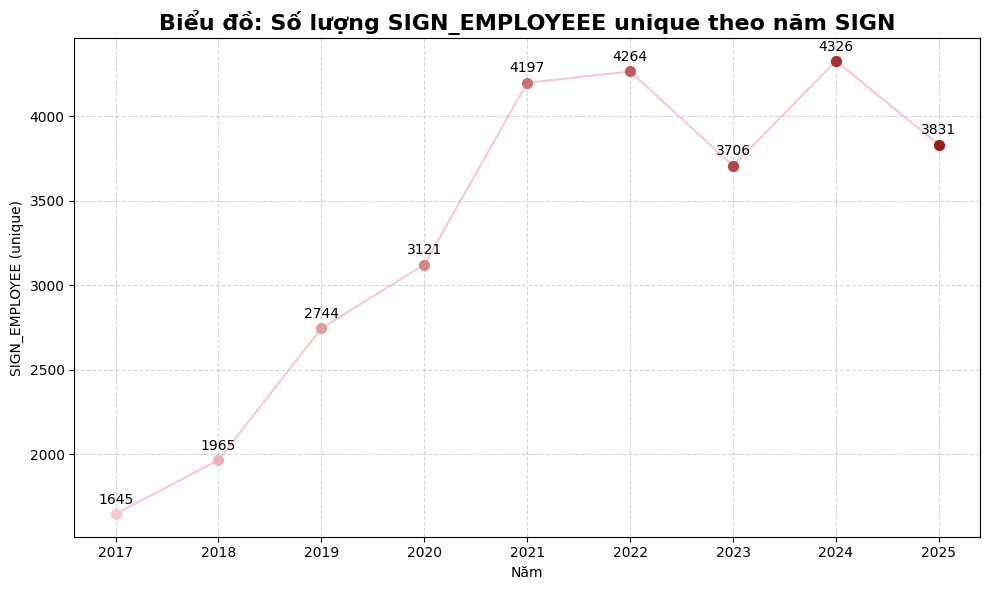

In [ ]:
# Làm sạch tên cột (nếu cần)
contract_df.columns = contract_df.columns.str.strip().str.upper()

# Chuyển SIGN_CONTRACT_TIME thành datetime (nếu chưa)
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], errors='coerce')

# Trích xuất NĂM
contract_df['YEAR'] = contract_df['SIGN_CONTRACT_TIME'].dt.year

# Đếm số khách hàng duy nhất theo từng năm
yearly_employee_sign = contract_df.groupby('YEAR')['SIGN_EMPLOYEE'].nunique()

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(yearly_employee_sign)))
label_padding = max(yearly_employee_sign.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(yearly_employee_sign.index, yearly_employee_sign.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(yearly_employee_sign.index, yearly_employee_sign.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y:}', ha='center', va='bottom', fontsize=10)

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lượng SIGN_EMPLOYEEE unique theo năm SIGN', fontsize=16, fontweight='bold')
plt.xlabel('Năm')
plt.ylabel('SIGN_EMPLOYEE (unique)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


##### 1.1.8 `FIRST_DUE`, `SECOND_DUE`, `THIRD_DUE`, `FOURTH_DUE`

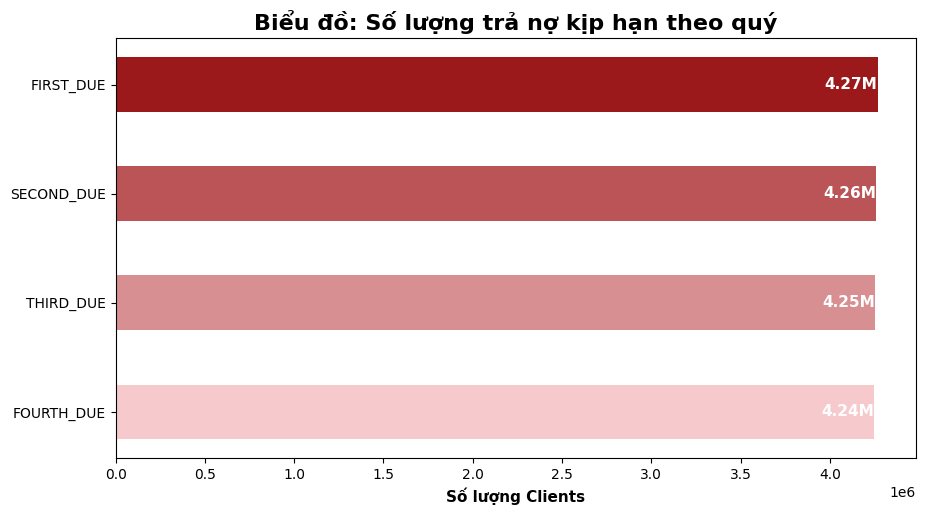

In [ ]:
# Danh sách các cột cần đếm số 0
due_cols = ['FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE']
zero_counts = (contract_df[due_cols] == 0).sum()

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(zero_counts)))

# Draw bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(zero_counts.index, zero_counts.values, color=colors, height=0.5)

# Invert the Y-axis so the top category appears at the top
plt.gca().invert_yaxis()
plt.title('Biểu đồ: Số lượng trả nợ kịp hạn theo quý', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng Clients', fontsize=11, fontweight='bold')

# Add data labels
for bar in bars:
    value = int(bar.get_width())
    label = f'{value/1000000:.2f}M' if value >= 1000 else str(value)
    plt.text(
        value, 
        bar.get_y() + bar.get_height()/2, 
        label, 
        ha='right', 
        va='center', 
        fontsize=11,
        color='w', 
        fontweight='bold'
        )

# Optimize spacing so labels and title
plt.tight_layout()
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=1)

plt.show()


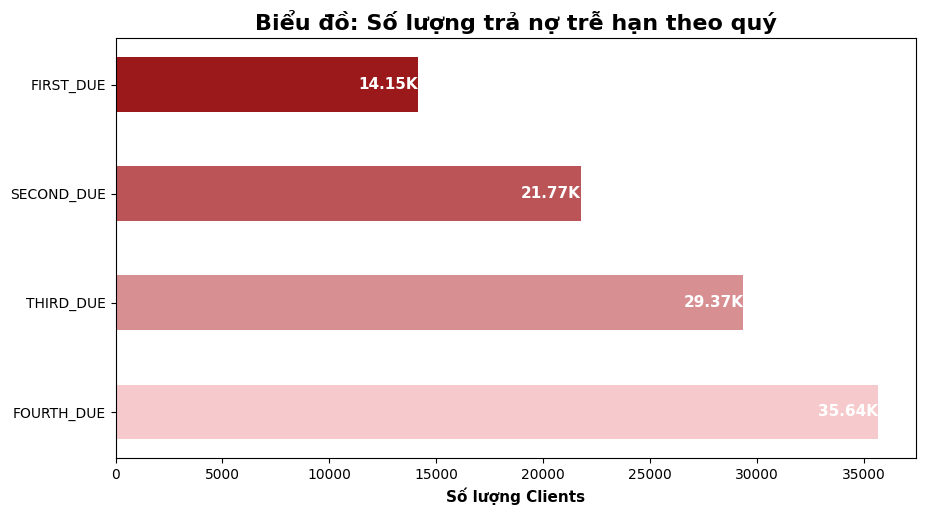

In [ ]:
# Danh sách các cột cần đếm số 1
due_cols = ['FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE']
zero_counts = (contract_df[due_cols] == 1).sum()

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(zero_counts)))

# Draw bar chart
plt.figure(figsize=(10, 6))
bars = plt.barh(zero_counts.index, zero_counts.values, color=colors, height=0.5)

# Invert the Y-axis so the top category appears at the top
plt.gca().invert_yaxis()
plt.title('Biểu đồ: Số lượng trả nợ trễ hạn theo quý', fontsize=16, fontweight='bold')
plt.xlabel('Số lượng Clients', fontsize=11, fontweight='bold')

# Add data labels
for bar in bars:
    value = int(bar.get_width())
    label = f'{value/1000:.2f}K' if value >= 1000 else str(value)
    plt.text(
        value, 
        bar.get_y() + bar.get_height()/2, 
        label, 
        ha='right', 
        va='center', 
        fontsize=11,
        color='w', 
        fontweight='bold'
        )

# Optimize spacing so labels and title
plt.tight_layout()
plt.subplots_adjust(top=0.8, bottom=0.1, left=0.2, right=1)

plt.show()


##### 1.1.9 `FLAG_INS`

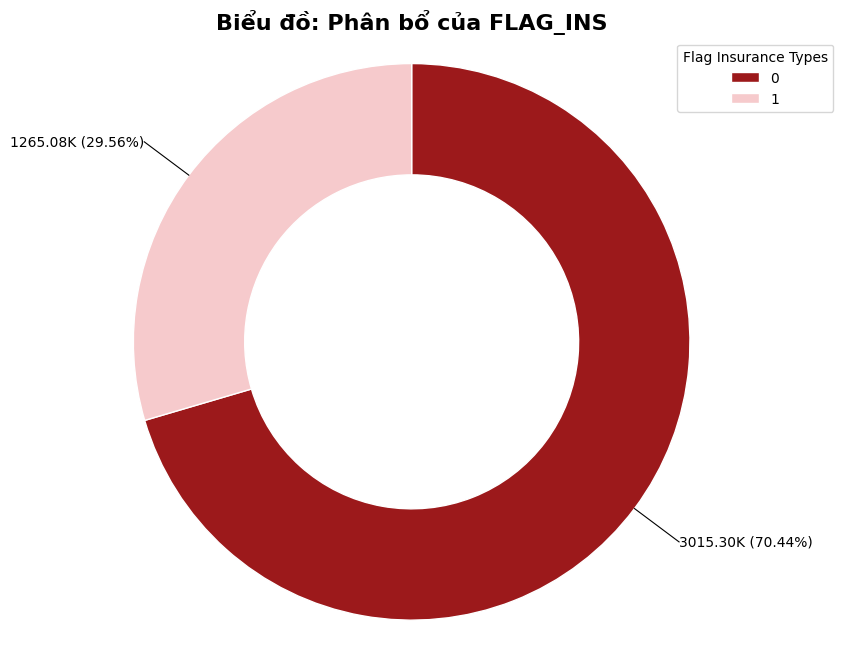

In [ ]:
# Lấy danh sách labels từ dữ liệu ban đầu
labels = contract_df['FLAG_INS'].dropna().unique().tolist()

# Đưa 'unknown' về cuối nếu có
ordered_labels = [l for l in labels if l != 'unknown'] + (['unknown'] if 'unknown' in labels else [])

# Đếm số lượng từng nhóm FLAG_INS, sắp xếp theo ordered_labels
flag_ins_counts = contract_df['FLAG_INS'].value_counts().reindex(ordered_labels).fillna(0)

# Tính tổng và phần trăm
total = flag_ins_counts.sum()
percentages = flag_ins_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(flag_ins_counts, percentages)
]

# Tạo màu cho từng nhóm (tùy chỉnh theo nhu cầu)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(flag_ins_counts)))

# Vẽ pie chart
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    flag_ins_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Vẽ đường nối và label ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue 

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)

    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)

    x_end = 1.2 * outer_radius * np.cos(angle_rad)
    y_end = 1.2 * outer_radius * np.sin(angle_rad)

    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    ordered_labels,
    title="Flag Insurance Types",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ của FLAG_INS', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


#### **1.2. Customer Table**

##### 1.2.1 `BIRTH_DATE` - AGE

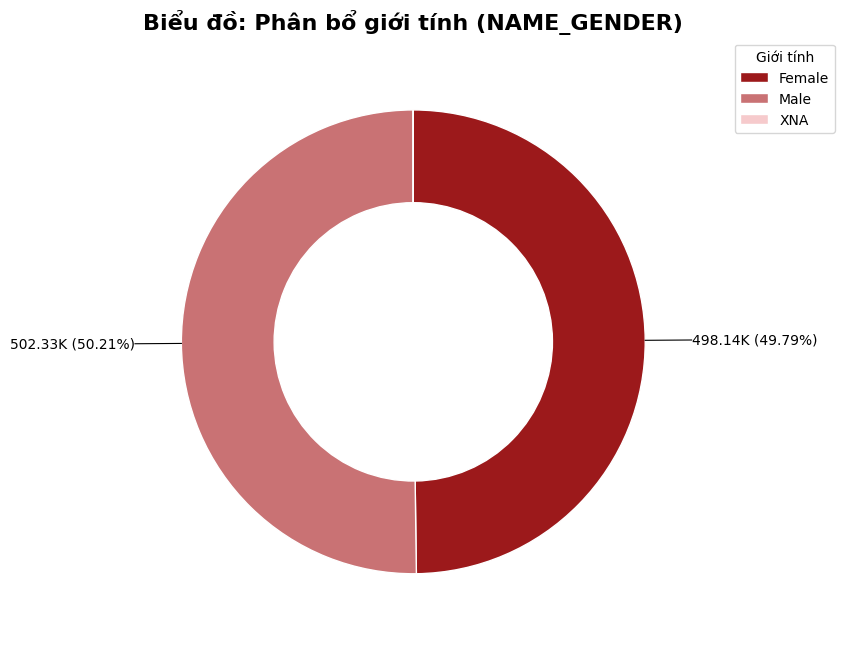

In [ ]:
# Bước 1: Merge NAME_GENDER từ customer_df vào contract_df theo SKP_CLIENT
gender_df = customer_df[['SKP_CLIENT', 'NAME_GENDER']].copy()


# Bước 2: Dùng NAME_GENDER thay cho FLAG_INS
labels = gender_df['NAME_GENDER'].dropna().unique().tolist()
ordered_labels = [l for l in labels if l != 'unknown'] + (['unknown'] if 'unknown' in labels else [])
gender_counts = gender_df['NAME_GENDER'].value_counts().reindex(ordered_labels).fillna(0)

# Tính tổng và phần trăm
total = gender_counts.sum()
percentages = gender_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(gender_counts, percentages)
]

# Tạo màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(gender_counts)))

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    gender_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Đường nối và nhãn ngoài
outer_radius = 1
for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
    if label == '':
        continue

    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'

    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Thêm chú thích
ax.legend(
    wedges,
    ordered_labels,
    title="Giới tính",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ giới tính (NAME_GENDER)', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


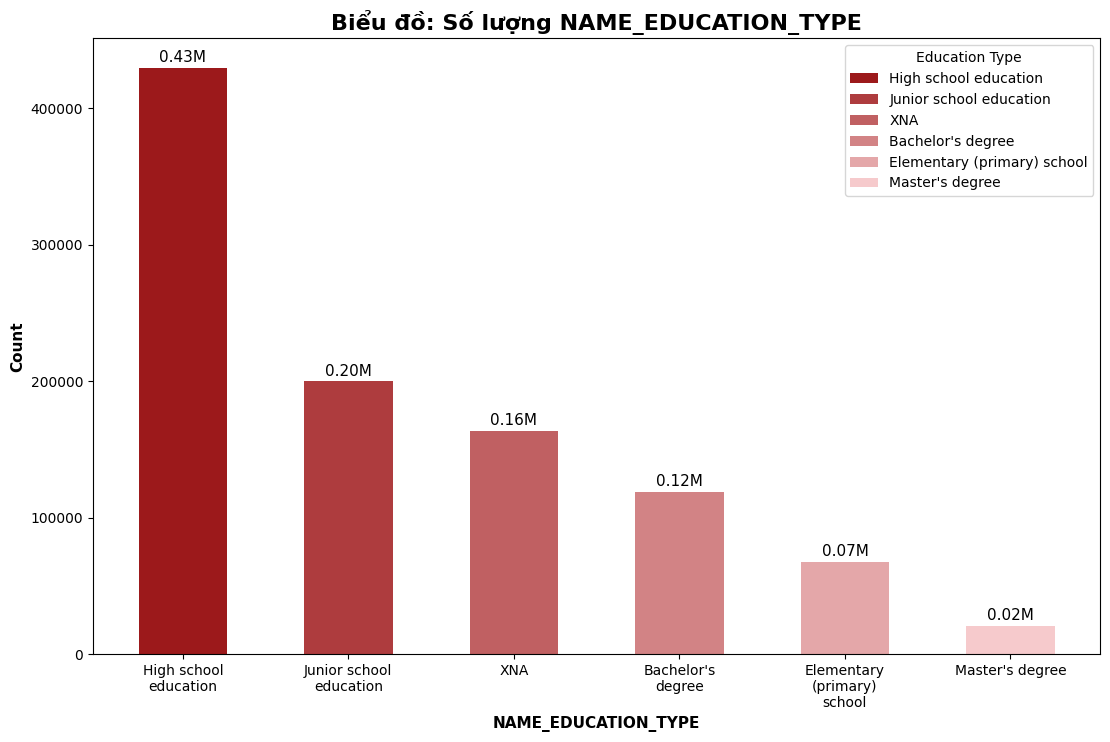

In [ ]:
import textwrap

# Count the number of occurrences for each category in 'NAME_CREDIT_STATUS'
education_type_counts = customer_df['NAME_EDUCATION_TYPE'].value_counts()
labels = education_type_counts.index
values = education_type_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = education_type_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars
x = np.arange(len(labels)) * 0.15

# Create palette (sửa lại biến chính xác theo education_type_counts)
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(education_type_counts)))

# Draw bar chart
plt.figure(figsize=(13, 8))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Education Type",
    loc="best"
)

# Set nhãn trục X đã được wrap
plt.xticks(x, wrapped_labels)

plt.xlabel('NAME_EDUCATION_TYPE', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng NAME_EDUCATION_TYPE', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()


In [ ]:
# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# from matplotlib.colors import LinearSegmentedColormap

# # Bước 1: Merge AGE_CUSTOMER_GROUP từ customer_df vào contract_df theo SKP_CLIENT
# age_df = customer_df[['SKP_CLIENT', 'AGE_CUSTOMER_GROUP']].copy()

# # Bước 2: Dùng AGE_CUSTOMER_GROUP thay cho NAME_GENDER
# labels = age_df['AGE_CUSTOMER_GROUP'].dropna().unique().tolist()
# ordered_labels = [l for l in labels if l.lower() != 'unknown'] + (['unknown'] if 'unknown' in [x.lower() for x in labels] else [])
# age_counts = age_df['AGE_CUSTOMER_GROUP'].value_counts().reindex(ordered_labels).fillna(0)

# # Tính tổng và phần trăm
# total = age_counts.sum()
# percentages = age_counts / total * 100
# labels_with_values = [
#     f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
#     for count, pct in zip(age_counts, percentages)
# ]

# # Tạo màu
# colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(age_counts)))

# # Vẽ biểu đồ tròn
# fig, ax = plt.subplots(figsize=(7.9, 7.9))
# wedges, texts = ax.pie(
#     age_counts,
#     startangle=90,
#     counterclock=False,
#     colors=colors,
#     wedgeprops=dict(width=0.4, edgecolor='w')
# )

# # Đường nối và nhãn ngoài
# outer_radius = 1
# for i, (wedge, label) in enumerate(zip(wedges, labels_with_values)):
#     if label == '':
#         continue

#     angle = (wedge.theta2 + wedge.theta1) / 2
#     angle_rad = np.deg2rad(angle)
#     x_start = outer_radius * np.cos(angle_rad)
#     y_start = outer_radius * np.sin(angle_rad)
#     x_end = 1.2 * x_start
#     y_end = 1.2 * y_start
#     x_label = 1.35 * np.cos(angle_rad)
#     y_label = 1.35 * np.sin(angle_rad)
#     ha = 'left' if x_label >= 0 else 'right'

#     ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
#     ax.text(x_end, y_end, label, ha=ha, va='center')

# # Thêm chú thích
# ax.legend(
#     wedges,
#     ordered_labels,
#     title="Nhóm tuổi",
#     loc="upper right",
#     bbox_to_anchor=(1.2, 1)
# )

# ax.set_title('Biểu đồ: Phân bổ theo nhóm tuổi (AGE_CUSTOMER_GROUP)', fontsize=16, fontweight='bold')
# ax.axis('equal')
# plt.show()


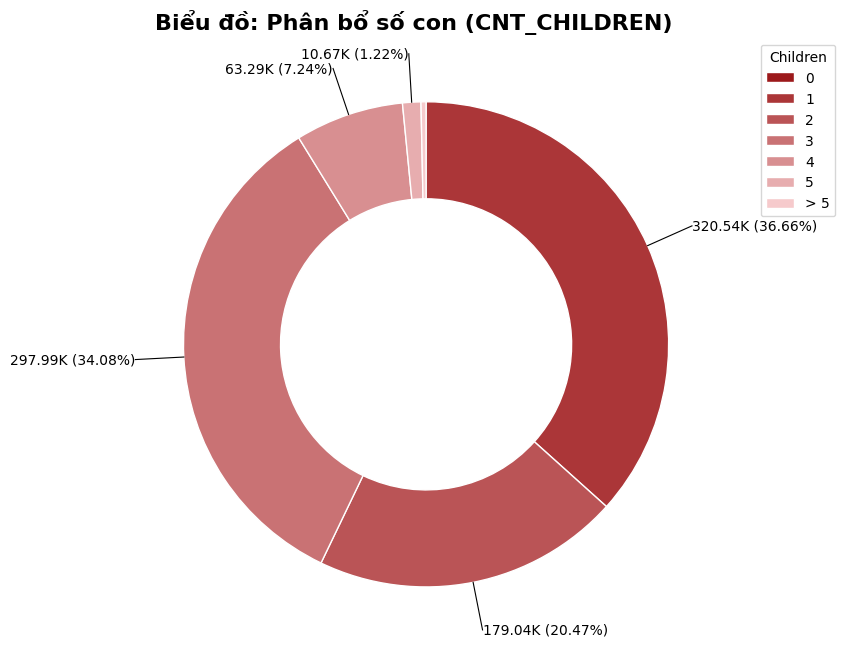

In [ ]:
# Loại bỏ giá trị âm
customer_df = customer_df[customer_df['CNT_CHILDREN'] >= 0]

# Định nghĩa các nhóm CNT_CHILDREN
bins = [0, 1, 2, 3, 4, 5, 100]  # 100 để bao toàn bộ giá trị >5
labels = ['0', '1', '2', '3', '4', '5', '> 5']

# Phân nhóm số con
customer_df['CNT_CHILDREN_GROUP'] = pd.cut(
    customer_df['CNT_CHILDREN'],
    bins=[-0.1, 0, 1, 2, 3, 4, 5, np.inf],
    labels=pd.Categorical(['0', '1', '2', '3', '4', '5', '> 5'], ordered=True),
    right=False
)

# Đếm số lượng trong từng nhóm
cnt_children_counts = customer_df['CNT_CHILDREN_GROUP'].value_counts().reindex(labels)

# Tính phần trăm và nhãn
total = cnt_children_counts.sum()
percentages = cnt_children_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(cnt_children_counts, percentages)
]

# Màu sắc
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(cnt_children_counts))
)

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    cnt_children_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn bên ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Chú thích
ax.legend(
    wedges,
    labels,
    title="Children",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ số con (CNT_CHILDREN)', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


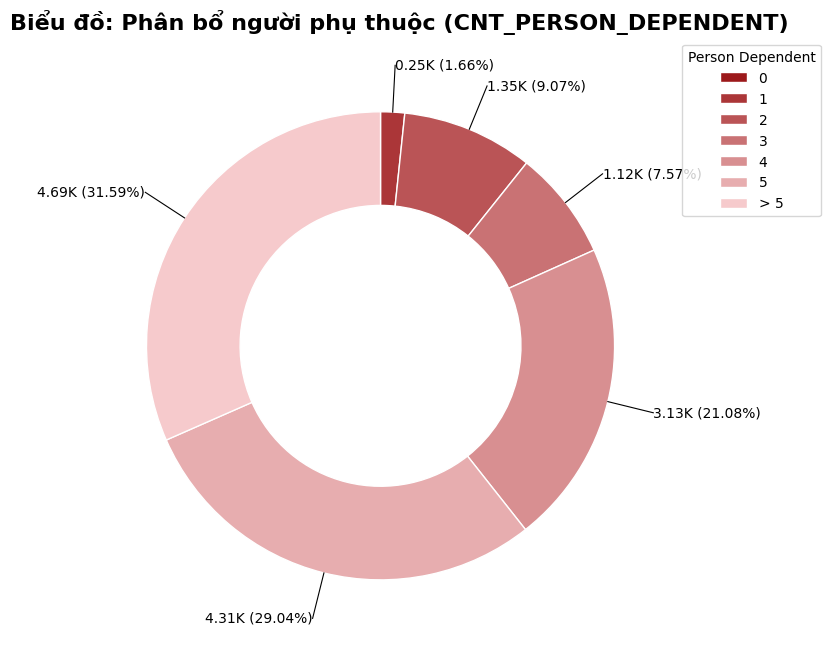

In [ ]:
# Loại bỏ giá trị âm
customer_df = customer_df[customer_df['CNT_PERSON_DEPENDENT'] >= 0]

# Định nghĩa các nhóm CNT_PERSON_DEPENDENT
bins = [0, 1, 2, 3, 4, 5, 100]  
labels = ['0', '1', '2', '3', '4', '5', '> 5']

# Phân nhóm số con
customer_df['CNT_PERSON_DEPENDENT_GROUP'] = pd.cut(
    customer_df['CNT_PERSON_DEPENDENT'],
    bins=[-0.1, 0, 1, 2, 3, 4, 5, np.inf],
    labels=pd.Categorical(['0', '1', '2', '3', '4', '5', '> 5'], ordered=True),
    right=False
)

# Đếm số lượng trong từng nhóm
cnt_person_dependent_counts = customer_df['CNT_PERSON_DEPENDENT_GROUP'].value_counts().reindex(labels)

# Tính phần trăm và nhãn
total = cnt_person_dependent_counts.sum()
percentages = cnt_person_dependent_counts / total * 100
labels_with_values = [
    f'{count/1000:.2f}K ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(cnt_person_dependent_counts, percentages)
]

# Màu sắc
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(cnt_person_dependent_counts))
)

# Vẽ biểu đồ tròn
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    cnt_person_dependent_counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn bên ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Chú thích
ax.legend(
    wedges,
    labels,
    title="Person Dependent",
    loc="upper right",
    bbox_to_anchor=(1.2, 1)
)

ax.set_title('Biểu đồ: Phân bổ người phụ thuộc (CNT_PERSON_DEPENDENT)', fontsize=16, fontweight='bold')
ax.axis('equal')
plt.show()


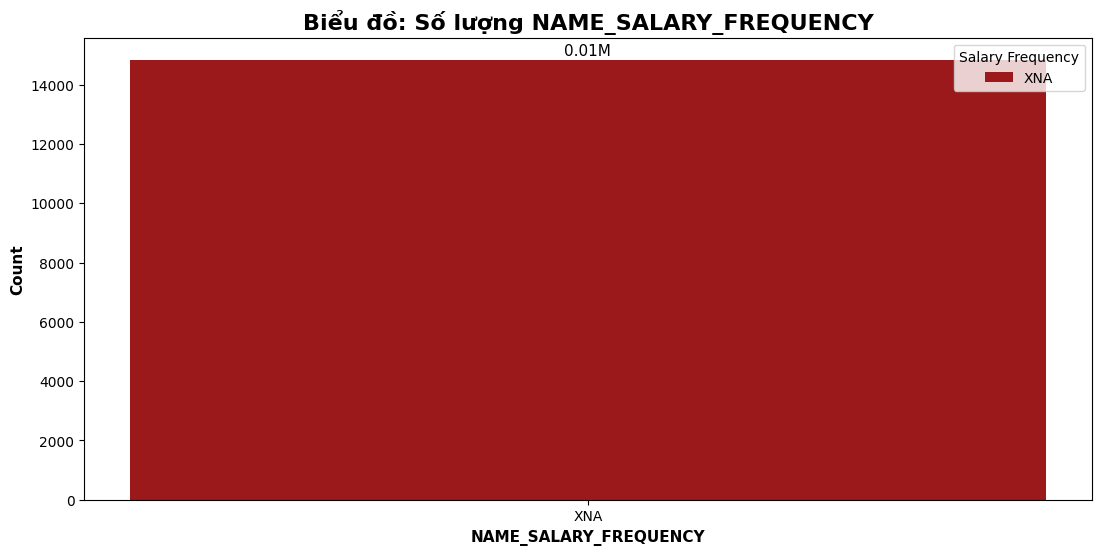

In [ ]:
import textwrap

# Count the number of occurrences for each category in 'NAME_SALARY_FREQUENCY'
status_counts = customer_df['NAME_SALARY_FREQUENCY'].value_counts()
labels = status_counts.index
values = status_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = status_counts.sum()
labels_with_values = [
    f'{count / 1_000_000:.2f}M' for count in values
]

# Create positions for the bars
x = np.arange(len(labels)) * 0.15

# Create palette
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(status_counts))
)

# Draw bar chart
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Add a legend
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Salary Frequency",
    loc="best"
)

# Set nhãn trục X đã được wrap
plt.xticks(x, wrapped_labels)

plt.xlabel('NAME_SALARY_FREQUENCY', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Số lượng NAME_SALARY_FREQUENCY', fontsize=16, fontweight='bold')

# Add custom labels above each bar
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()


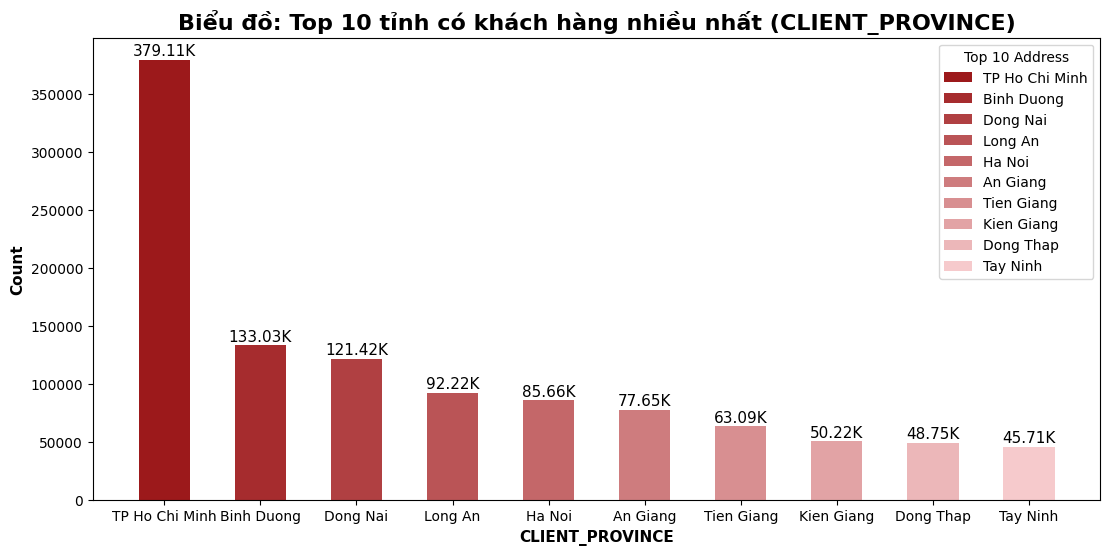

In [ ]:
# Lấy top 10 giá trị xuất hiện nhiều nhất trong 'CLIENT_PROVINCE'
merge_df = leads_df.merge(shop_df, how='left', on='CODE_POS')
client_province_counts = merge_df['SALESROOM_PROVINCE'].value_counts().head(10)
labels = client_province_counts.index
values = client_province_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(label, width=15) for label in labels]

# Tính tổng và tạo nhãn định dạng "xxxM"
total = client_province_counts.sum()
labels_with_values = [
    f'{count / 1_000:.2f}K' for count in values
]

# Tạo vị trí cho các cột
x = np.arange(len(labels)) * 0.15

# Tạo bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(client_province_counts))
)

# Vẽ biểu đồ cột
plt.figure(figsize=(13, 6))
bars = plt.bar(
    x,
    values,
    color=colors,
    width=0.08,
)

# Thêm chú thích
plt.legend(
    bars,
    labels,  # legend giữ nhãn gốc (không xuống dòng)
    title="Top 10 Address",
    loc="best"
)

# Gắn nhãn trục X
plt.xticks(x, wrapped_labels)
plt.xlabel('CLIENT_PROVINCE', fontsize=11, fontweight='bold')
plt.ylabel('Count', fontsize=11, fontweight='bold')
plt.title('Biểu đồ: Top 10 tỉnh có khách hàng nhiều nhất (CLIENT_PROVINCE)', fontsize=16, fontweight='bold')

# Gắn nhãn số liệu trên đầu cột
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.show()

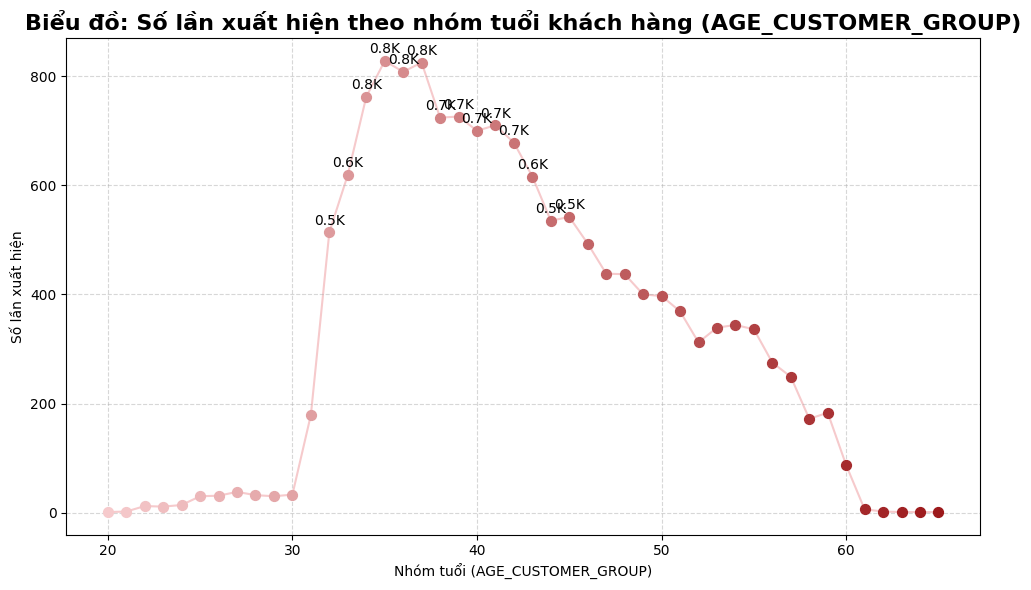

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap

# Làm sạch tên cột (nếu cần)
customer_df.columns = customer_df.columns.str.strip().str.upper()

# Đếm số lượng theo AGE_CUSTOMER_GROUP
age_group_counts = customer_df['AGE_CLIENT'].value_counts().sort_index()  # giữ đúng thứ tự nhóm

# Tạo bảng màu
cmap = LinearSegmentedColormap.from_list("custom_reds", ['#F6CACC', '#9C191B'])
colors = cmap(np.linspace(0, 1, len(age_group_counts)))
label_padding = max(age_group_counts.values) * 0.01

# Vẽ line chart
plt.figure(figsize=(10, 6))
plt.plot(age_group_counts.index, age_group_counts.values, color='#F6CACC', linewidth=1.5, zorder=1)

# Thêm chấm và nhãn giá trị
for (x, y, color) in zip(age_group_counts.index, age_group_counts.values, colors):
    plt.scatter(x, y, color=color, s=50, zorder=2)
    plt.text(x, y + label_padding, f'{y/1000:.1f}K', ha='center', va='bottom', fontsize=10) if  y >= 500 else ''

# Tùy chỉnh biểu đồ
plt.title('Biểu đồ: Số lần xuất hiện theo nhóm tuổi khách hàng (AGE_CUSTOMER_GROUP)', fontsize=16, fontweight='bold')
plt.xlabel('Nhóm tuổi (AGE_CUSTOMER_GROUP)')
plt.ylabel('Số lần xuất hiện')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


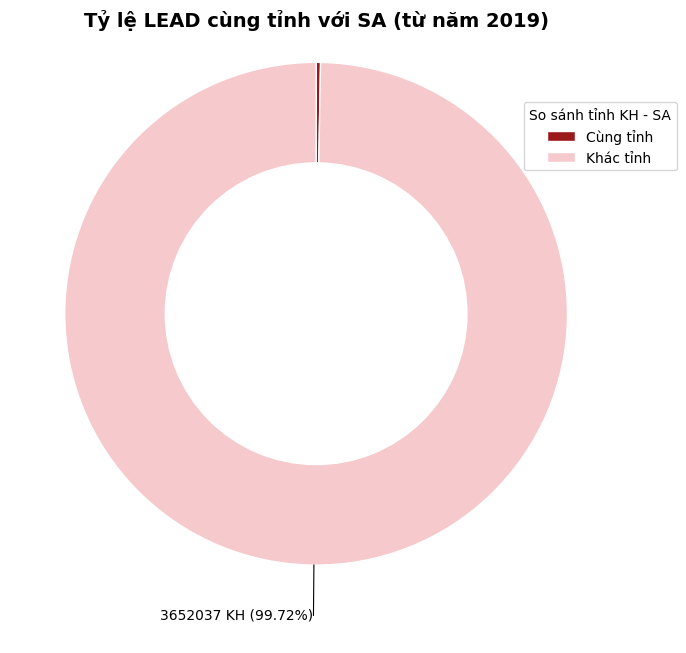

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Bước 0: Chuyển đổi thời gian (nếu cần)
contract_df['APPLY_CONTRACT_TIME'] = pd.to_datetime(contract_df['APPLY_CONTRACT_TIME'], errors='coerce')

# Bước 1: Lọc từ năm 2019 trở đi
contract_filtered = contract_df[contract_df['APPLY_CONTRACT_TIME'].dt.year >= 2019]

# Bước 2: Lọc distinct theo SKP_CREDIT_CASE
contract_unique = contract_filtered.drop_duplicates(subset='SKP_CREDIT_CASE')

# Bước 3: Merge thông tin khách và nhân viên
contract_merge = contract_unique.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']],
    how='left', on='SKP_CLIENT'
)

contract_merge = contract_merge.merge(
    employee_df[['CODE_EMPLOYEE', 'SA_PROVINCE']],
    how='left', left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE'
)

# Bước 4: So sánh tỉnh
contract_merge['SAME_PROVINCE'] = contract_merge['CLIENT_PROVINCE'] == contract_merge['SA_PROVINCE']

# Bước 5: Đếm số lượng
counts = contract_merge['SAME_PROVINCE'].value_counts().rename({True: 'Cùng tỉnh', False: 'Khác tỉnh'})
counts = counts.reindex(['Cùng tỉnh', 'Khác tỉnh'], fill_value=0)

# Bước 6: Tính phần trăm và gắn nhãn
total = counts.sum()
percentages = counts / total * 100
labels = counts.index.tolist()
labels_with_values = [
    f'{count:.0f} KH ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(counts, percentages)
]

# Màu sắc
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(counts))
)

# Bước 7: Vẽ biểu đồ
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Legend + tiêu đề
ax.legend(
    wedges,
    labels,
    title="So sánh tỉnh KH - SA",
    loc="upper right",
    bbox_to_anchor=(1.1, 0.9)
)

ax.set_title('Tỷ lệ LEAD cùng tỉnh với SA (từ năm 2019)', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.show()

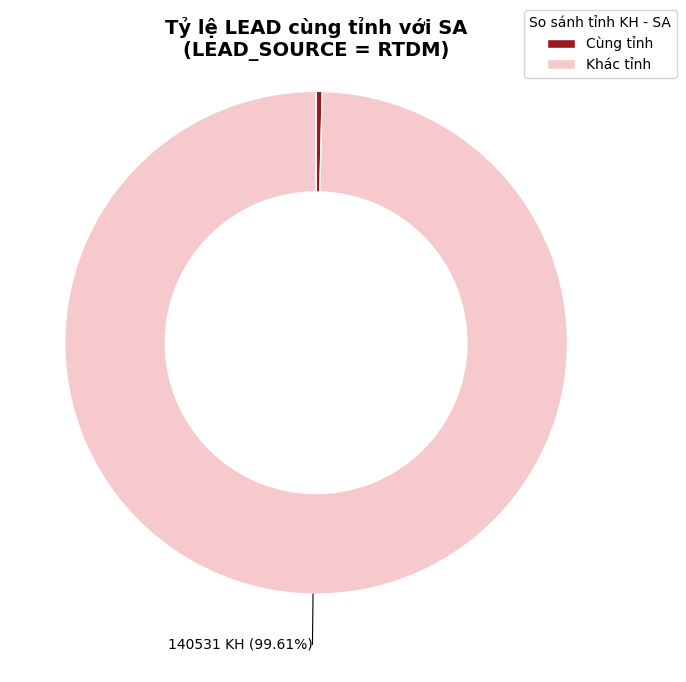

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap

# Bước 1: Merge contract với leads để lọc theo LEAD_SOURCE
contract_with_leads = contract_df.merge(
    leads_df[['SKP_CLIENT', 'LEAD_SOURCE']],
    how='left', on='SKP_CLIENT'
)

# ❌ Bỏ lọc theo thời gian, chỉ giữ điều kiện LEAD_SOURCE = 'SOB'
contract_filtered = contract_with_leads[
    contract_with_leads['LEAD_SOURCE'] =='SOB'
]

# Bước 2: Lọc hợp đồng không trùng theo SKP_CREDIT_CASE
contract_unique = contract_filtered.drop_duplicates(subset='SKP_CREDIT_CASE')

# Bước 3: Merge thông tin khách và nhân viên
contract_merge = contract_unique.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']],
    how='left', on='SKP_CLIENT'
)

contract_merge = contract_merge.merge(
    employee_df[['CODE_EMPLOYEE', 'SA_PROVINCE']],
    how='left', left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE'
)

# Bước 4: So sánh tỉnh
contract_merge['SAME_PROVINCE'] = contract_merge['CLIENT_PROVINCE'] == contract_merge['SA_PROVINCE']

# Bước 5: Thống kê số lượng
counts = contract_merge['SAME_PROVINCE'].value_counts().rename({True: 'Cùng tỉnh', False: 'Khác tỉnh'})
counts = counts.reindex(['Cùng tỉnh', 'Khác tỉnh'], fill_value=0)

# Bước 6: Tính phần trăm và nhãn hiển thị
total = counts.sum()
percentages = counts / total * 100
labels = counts.index.tolist()
labels_with_values = [
    f'{count:.0f} KH ({pct:.2f}%)' if pct >= 0.5 else ''
    for count, pct in zip(counts, percentages)
]

# Màu sắc gradient
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(counts))
)

# Bước 7: Vẽ pie chart nâng cao
fig, ax = plt.subplots(figsize=(7.9, 7.9))
wedges, texts = ax.pie(
    counts,
    startangle=90,
    counterclock=False,
    colors=colors,
    wedgeprops=dict(width=0.4, edgecolor='w')
)

# Gắn nhãn ngoài
outer_radius = 1
for wedge, label in zip(wedges, labels_with_values):
    if label == '':
        continue
    angle = (wedge.theta2 + wedge.theta1) / 2
    angle_rad = np.deg2rad(angle)
    x_start = outer_radius * np.cos(angle_rad)
    y_start = outer_radius * np.sin(angle_rad)
    x_end = 1.2 * x_start
    y_end = 1.2 * y_start
    x_label = 1.35 * np.cos(angle_rad)
    y_label = 1.35 * np.sin(angle_rad)
    ha = 'left' if x_label >= 0 else 'right'
    ax.plot([x_start, x_end], [y_start, y_end], color='black', lw=0.8)
    ax.text(x_end, y_end, label, ha=ha, va='center')

# Legend + tiêu đề
ax.legend(
    wedges,
    labels,
    title="So sánh tỉnh KH - SA",
    loc="upper right",
    bbox_to_anchor=(1.1, 1.1)
)

ax.set_title('Tỷ lệ LEAD cùng tỉnh với SA\n(LEAD_SOURCE = RTDM)', fontsize=14, fontweight='bold')
ax.axis('equal')
plt.show()





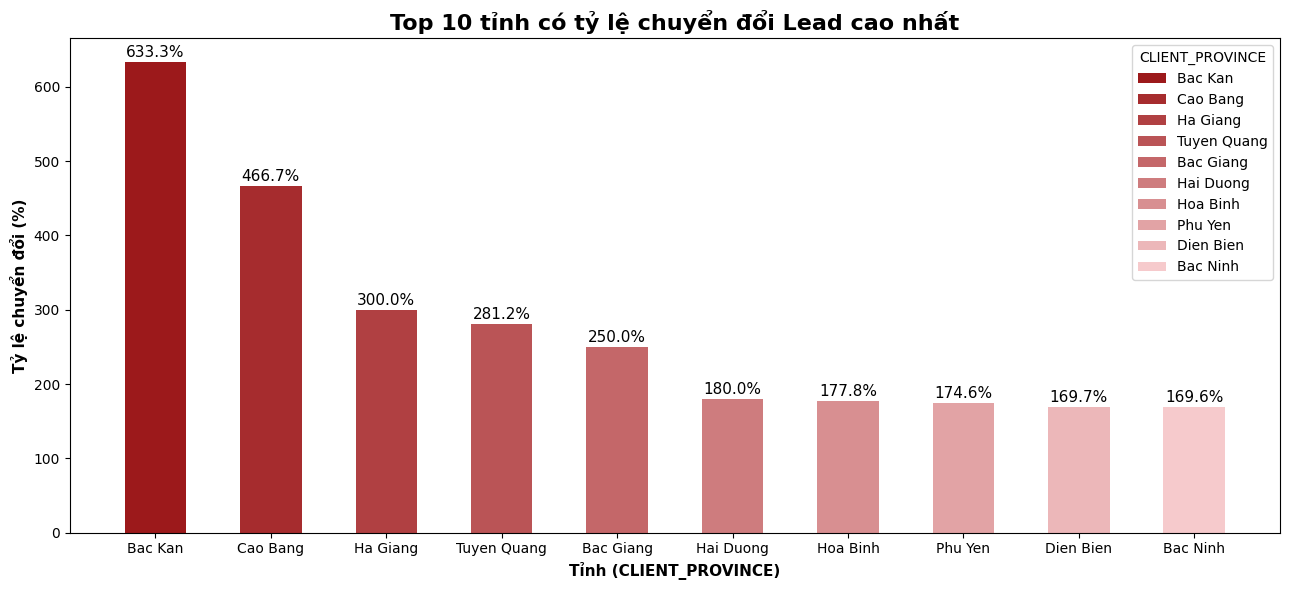

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import textwrap

# Làm sạch dữ liệu hợp đồng
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], errors='coerce')

# Lọc hợp đồng đã ký
signed_contracts = contract_df[contract_df['SIGN_CONTRACT_TIME'].notna()]
signed_with_province = signed_contracts.merge(customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left')
signed_counts = signed_with_province['CLIENT_PROVINCE'].value_counts()

# Tính số lead theo tỉnh
leads_with_province = leads_df.merge(customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left')
lead_counts = leads_with_province['CLIENT_PROVINCE'].value_counts()

# Tính tỷ lệ chuyển đổi
conversion_rate = (signed_counts / lead_counts).fillna(0) * 100
conversion_rate = conversion_rate[conversion_rate > 0]
conversion_rate = conversion_rate.sort_values(ascending=False).head(10)

# Chuẩn bị dữ liệu vẽ
labels = conversion_rate.index.tolist()
values = conversion_rate.values
wrapped_labels = [textwrap.fill(str(label), width=15) for label in labels]
labels_with_values = [f'{v:.1f}%' for v in values]
x = np.arange(len(labels)) * 0.15
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(labels)))

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

plt.legend(bars, labels, title="CLIENT_PROVINCE", loc="best")
plt.xticks(x, wrapped_labels)
plt.xlabel('Tỉnh (CLIENT_PROVINCE)', fontsize=11, fontweight='bold')
plt.ylabel('Tỷ lệ chuyển đổi (%)', fontsize=11, fontweight='bold')
plt.title('Top 10 tỉnh có tỷ lệ chuyển đổi Lead cao nhất', fontsize=16, fontweight='bold')

for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.tight_layout()
plt.show()






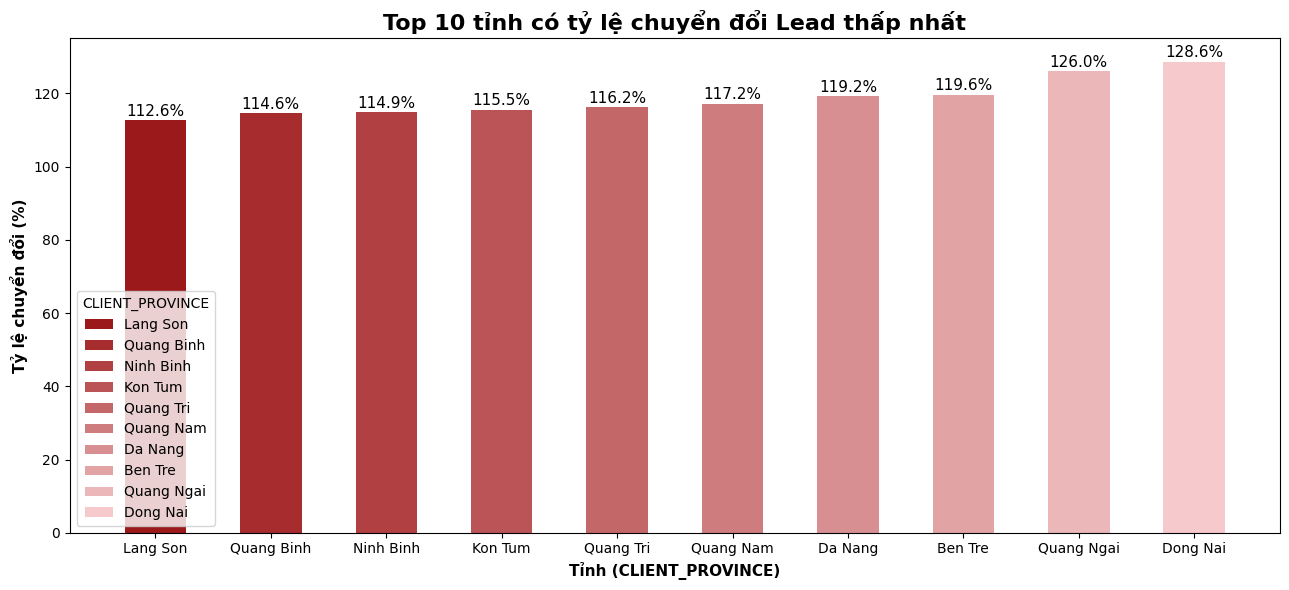

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
import textwrap

# Làm sạch dữ liệu
contract_df['SIGN_CONTRACT_TIME'] = pd.to_datetime(contract_df['SIGN_CONTRACT_TIME'], errors='coerce')

# Lọc hợp đồng đã ký
signed_contracts = contract_df[contract_df['SIGN_CONTRACT_TIME'].notna()]
signed_with_province = signed_contracts.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left'
)

# Bỏ CLIENT_PROVINCE là 0 hoặc "0"
signed_with_province = signed_with_province[
    (signed_with_province['CLIENT_PROVINCE'].astype(str) != '0') & 
    (signed_with_province['CLIENT_PROVINCE'].notna())
]

# Đếm số hợp đồng đã ký theo tỉnh
signed_counts = signed_with_province['CLIENT_PROVINCE'].value_counts()

# Đếm số lead theo tỉnh (cũng loại bỏ '0')
leads_with_province = leads_df.merge(
    customer_df[['SKP_CLIENT', 'CLIENT_PROVINCE']], on='SKP_CLIENT', how='left'
)
leads_with_province = leads_with_province[
    (leads_with_province['CLIENT_PROVINCE'].astype(str) != '0') &
    (leads_with_province['CLIENT_PROVINCE'].notna())
]
lead_counts = leads_with_province['CLIENT_PROVINCE'].value_counts()

# Tính tỷ lệ chuyển đổi
conversion_rate = (signed_counts / lead_counts).fillna(0) * 100
conversion_rate = conversion_rate[conversion_rate > 0]
conversion_rate = conversion_rate.sort_values(ascending=True).head(10)

# Chuẩn bị dữ liệu vẽ
labels = conversion_rate.index.tolist()
values = conversion_rate.values
wrapped_labels = [textwrap.fill(str(label), width=15) for label in labels]
labels_with_values = [f'{v:.1f}%' for v in values]
x = np.arange(len(labels)) * 0.15
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(np.linspace(0, 1, len(labels)))

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

plt.legend(bars, labels, title="CLIENT_PROVINCE", loc="best")
plt.xticks(x, wrapped_labels)
plt.xlabel('Tỉnh (CLIENT_PROVINCE)', fontsize=11, fontweight='bold')
plt.ylabel('Tỷ lệ chuyển đổi (%)', fontsize=11, fontweight='bold')
plt.title('Top 10 tỉnh có tỷ lệ chuyển đổi Lead thấp nhất', fontsize=16, fontweight='bold')

for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.tight_layout()
plt.show()


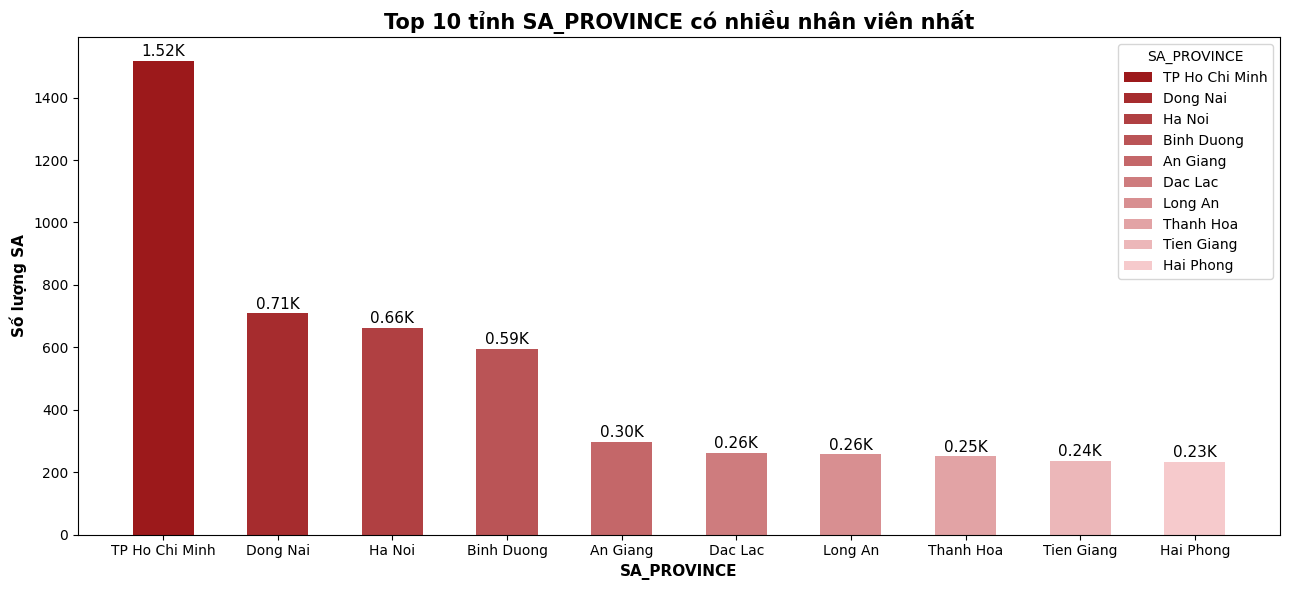

In [ ]:
# Đếm số lượng theo SA_PROVINCE
sa_province_counts = employee_df['SA_PROVINCE'].value_counts().head(10)
labels = sa_province_counts.index
values = sa_province_counts.values

# Bọc nhãn trục X nếu quá dài
wrapped_labels = [textwrap.fill(str(label), width=15) for label in labels]

# Định dạng nhãn số liệu
labels_with_values = [f'{count / 1_000:.2f}K' for count in values]

# Tạo vị trí cho cột
x = np.arange(len(labels)) * 0.15

# Bảng màu
colors = LinearSegmentedColormap.from_list("custom_reds", ['#9C191B', '#F6CACC'])(
    np.linspace(0, 1, len(sa_province_counts))
)

# Vẽ biểu đồ
plt.figure(figsize=(13, 6))
bars = plt.bar(x, values, color=colors, width=0.08)

# Thêm legend
plt.legend(
    bars,
    labels,  # nhãn gốc không xuống dòng
    title="SA_PROVINCE",
    loc="best"
)

# Nhãn trục
plt.xticks(x, wrapped_labels)
plt.xlabel('SA_PROVINCE', fontsize=11, fontweight='bold')
plt.ylabel('Số lượng SA', fontsize=11, fontweight='bold')
plt.title('Top 10 tỉnh SA_PROVINCE có nhiều nhân viên nhất', fontsize=15, fontweight='bold')

# Nhãn số trên mỗi cột
for i, label in enumerate(labels_with_values):
    plt.text(x[i], values[i] + max(values) * 0.01, label, ha='center', fontsize=11)

plt.tight_layout()
plt.show()


# **IV. MODEL 1**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, f1_score, roc_auc_score
from sklearn.model_selection import RandomizedSearchCV
import warnings
from sklearn.feature_selection import chi2, f_classif
from scipy.stats import ks_2samp
from scipy.stats import chi2_contingency
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
import catboost as cb
import random
warnings.filterwarnings("ignore")

In [ ]:
def set_seed(seed = 42):
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

In [ ]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
contract_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4280377 entries, 0 to 4280376
Data columns (total 24 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   SKP_CREDIT_CASE        int64  
 1   SKP_CLIENT             int64  
 2   NAME_EDUCATION_TYPE    object 
 3   CNT_CHILDREN           int64  
 4   AMT_INCOME_MAIN        float64
 5   AMT_INCOME_HOUSEHOLD   int64  
 6   NAME_INCOME_TYPE       object 
 7   CODE_PROFESSION        object 
 8   NAME_CREDIT_STATUS     object 
 9   PRODUCT                object 
 10  AMT_CREDIT             float64
 11  PAYMENT_NUM            float64
 12  INIT_PAY               float64
 13  ANNUITY                float64
 14  APPLY_CONTRACT_TIME    object 
 15  APPROVE_CONTRACT_TIME  object 
 16  SIGN_CONTRACT_TIME     object 
 17  APPLY_EMPLOYEE         int64  
 18  SIGN_EMPLOYEE          int64  
 19  FIRST_DUE              int64  
 20  SECOND_DUE             int64  
 21  THIRD_DUE              int64  
 22  FOURTH_DUE        

In [ ]:
contract_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  APPLY_CONTRACT_TIME  \
0                 Rejected  Consumer Durable  ...  2020-01-21 11:05:16   
1                 Finished  Consumer Durable  ...  2020-01-23 21:16:52   
2                 Finished  Consumer Durable  ...  2020-03-06 21:25:19   
3                 Finished  Consumer Durable  ...  2020-03-10 19:33:37   
4                 Finished  Consumer Durable  ...  2019-01-31 19:09:53   
...                    ...               ...  ...                  ...   
4280372             Active         Cash Loan  ...  2025-06-04 11:15:56   
4280373             Active       Credit Card  ...  2025-06-04 16:17:23   
4280374             Active         Cash Loan  ...  2025-06-04 13:41:32   
4280375             Active         Cash Loan  ...  2025-06-04 11:43:25   
4280376          Cancelled         Cash Loan  ...  2025-06-04 18:06:45   

         APPROVE_CONTRACT_TIME   SIGN_CONTRACT_TIME  APPLY_EMPLOYEE  \
0                          NaN                  NaN              -1   
1          2020-01-23 21:19:41  2020-01-23 21:31:32              -1   
2          2020-03-06 21:28:01  2020-03-06 21:30:53           23074   
3          2020-03-10 19:36:53  2020-03-10 19:37:27              -1   
4          2019-01-31 19:11:02  2019-01-31 21:46:12           20815   
...                        ...                  ...             ...   
4280372    2025-06-04 11:19:56  2025-06-04 11:25:57              -1   
4280373    2025-06-04 16:18:00  2025-06-04 16:18:25              -1   
4280374    2025-06-04 14:20:52  2025-06-04 14:27:19           33883   
4280375    2025-06-

In [ ]:
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
customer_df

SKP_CLIENT NAME_GENDER          NAME_EDUCATION_TYPE  DATE_BIRTH  \
0               676      Female        High school education  1966-03-18   
1              1470        Male        High school education  1967-12-27   
2              7123        Male      Junior school education  1972-10-03   
3             10711      Female  Elementary (primary) school  1978-01-01   
4             12407        Male        High school education  1986-03-14   
...             ...         ...                          ...         ...   
1000523   126809534        Male                          XNA  1990-04-02   
1000524   127462754        Male                          XNA  2005-04-30   
1000525   126394510        Male                          XNA  1995-07-24   
1000526   118415150      Female                          XNA  2000-05-09   
1000527   126803169        Male                          XNA  2004-09-27   

         CNT_CHILDREN NAME_SALARY_FREQUENCY  CNT_PERSON_DEPENDENT  \
0                 0.0                   XNA                  -1.0   
1                 1.0                   XNA                  -1.0   
2                 2.0                   XNA                   6.0   
3                 1.0                   XNA                   1.0   
4                 1.0                   XNA                  -1.0   
...               ...                   ...                   ...   
1000523           0.0                   XNA                  -1.0   
1000524          -1.0                   XNA                  -1.0   
1000525           0.0                   XNA                  -1.0   
1000526          -1.0                   XNA                  -1.0   
1000527          -1.0                   XNA                  -1.0   

         AVG_SESSION_PER_WEEK_2025  AGE_CLIENT CLIENT_PROVINCE  
0                              0.0          59         Long An  
1                              0.0          57  TP Ho Chi Minh  
2                              0.0          52         Dak Lak  
3                              0.0          47      Tien Giang  
4                              0.0          39         Gia Lai  
...                            ...         ...             ...  
1000523                        0.0          35               0  
1000524                        0.0          20               0  
1000525                        0.0          29               0  
1000526                        0.0          25               0  
1000527                        0.0          20               0  

[1000528 rows x 10 columns]

In [ ]:
customer_df.drop(columns=['NAME_EDUCATION_TYPE', 'DATE_BIRTH', 'CNT_CHILDREN'], inplace=True)
customer_df

SKP_CLIENT NAME_GENDER NAME_SALARY_FREQUENCY  CNT_PERSON_DEPENDENT  \
0               676      Female                   XNA                  -1.0   
1              1470        Male                   XNA                  -1.0   
2              7123        Male                   XNA                   6.0   
3             10711      Female                   XNA                   1.0   
4             12407        Male                   XNA                  -1.0   
...             ...         ...                   ...                   ...   
1000523   126809534        Male                   XNA                  -1.0   
1000524   127462754        Male                   XNA                  -1.0   
1000525   126394510        Male                   XNA                  -1.0   
1000526   118415150      Female                   XNA                  -1.0   
1000527   126803169        Male                   XNA                  -1.0   

         AVG_SESSION_PER_WEEK_2025  AGE_CLIENT CLIENT_PROVINCE  
0                              0.0          59         Long An  
1                              0.0          57  TP Ho Chi Minh  
2                              0.0          52         Dak Lak  
3                              0.0          47      Tien Giang  
4                              0.0          39         Gia Lai  
...                            ...         ...             ...  
1000523                        0.0          35               0  
1000524                        0.0          20               0  
1000525                        0.0          29               0  
1000526                        0.0          25               0  
1000527                        0.0          20               0  

[1000528 rows x 7 columns]

In [ ]:
customer_df['CLIENT_PROVINCE'] = customer_df['CLIENT_PROVINCE'].replace({0: '0'})
customer_df['CLIENT_PROVINCE'].unique()

array(['Long An', 'TP Ho Chi Minh', 'Dak Lak', 'Tien Giang', 'Gia Lai',
       'Quang Ninh', 'Dong Thap', 'Soc Trang', 'Quang Ngai', 'Da Nang',
       'Nghe An', 'An Giang', 'Bac Lieu', 'Binh Duong', 'Dong Nai',
       'Thua Thien - Hue', 'Yen Bai', 'Bac Giang', 'Ba Ria - Vung Tau',
       'Ha Noi', 'Hai Phong', 'Binh Phuoc', 'Hung Yen', 'Tay Ninh',
       'Vinh Long', 'Binh Thuan', 'Quang Tri', 'Ninh Thuan', 'Vinh Phuc',
       'Khanh Hoa', 'Lam Dong', 'Can Tho', 'Thanh Hoa', 'Kien Giang',
       'Quang Binh', 'Quang Nam', 'Ca Mau', 'Binh Dinh', 'Kon Tum',
       'Thai Nguyen', 'Bac Ninh', 'Son La', 'Thai Binh', 'Ben Tre',
       'Phu Tho', 'Phu Yen', 'Dak Nong', 'Lang Son', 'Nam Dinh',
       'Ha Tinh', 'Tra Vinh', 'Ninh Binh', 'Hau Giang', 'Hai Duong',
       'Ha Nam', 'Hoa Binh', 'Dien Bien', 'Bac Kan', 'Lao Cai',
       'Tuyen Quang', 'Cao Bang', 'Ha Giang', 'Lai Chau', '0'],
      dtype=object)

In [ ]:
employee_df = pd.read_csv(r'filled_data/EMPLOYEE.csv')
employee_df

CODE_EMPLOYEE HIRING_DATE LEAVING_DATE  MANAGER_CODE_EMPLOYEE  GENDER  \
0              46911  2021-01-04   2021-10-01                 115169       0   
1              46945  2021-01-11   2021-07-26                  35377       0   
2              47297  2021-02-22   2024-03-13                 115717       0   
3              47428  2021-03-01   2021-04-11                   2101       0   
4              47435  2021-03-01   2021-11-11                 115642       0   
...              ...         ...          ...                    ...     ...   
11378         118286  2013-07-24   2021-09-19                 120745       0   
11379         120002  2013-10-14   2022-06-01                  17466       0   
11380         120825  2013-11-27   2021-08-15                  23979       0   
11381         121209  2013-12-16          NaN                  16010       1   
11382         121368  2013-12-18          NaN                  24493       0   

       BIRTH_DATE  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0      2001-11-28         0           270                  19            23   
1      1999-12-23         0           196                  21            25   
2      1999-06-10         0          1115                  21            26   
3      1998-10-10         0            41                  22            26   
4      1988-02-18         0           255                  33            37   
...           ...       ...           ...                 ...           ...   
11378  1992-11-05         0          2979                  20            32   
11379  1992-05-01         0          3152                  21            33   
11380  1991-03-26         0          2818                  22            34   
11381  1988-03-11         0          4195                  25            37   
11382  1989-02-02         0          4193                  24            36   

       SA_PROVINCE  FLAG_MANAGER  
0               42             0  
1               19             0  
2               52             0  
3               11             0  
4               52             0  
...            ...           ...  
11378           54             0  
11379           20             0  
11380           52             0  
11381           20             0  
11382           40             0  

[11383 rows x 12 columns]

In [ ]:
employee_df.drop(columns=['HIRING_DATE', 'LEAVING_DATE', 'MANAGER_CODE_EMPLOYEE', 'BIRTH_DATE'], inplace=True)
employee_df

CODE_EMPLOYEE  GENDER  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  \
0              46911       0         0           270                  19   
1              46945       0         0           196                  21   
2              47297       0         0          1115                  21   
3              47428       0         0            41                  22   
4              47435       0         0           255                  33   
...              ...     ...       ...           ...                 ...   
11378         118286       0         0          2979                  20   
11379         120002       0         0          3152                  21   
11380         120825       0         0          2818                  22   
11381         121209       1         0          4195                  25   
11382         121368       0         0          4193                  24   

       AGE_EMPLOYEE  SA_PROVINCE  FLAG_MANAGER  
0                23           42             0  
1                25           19             0  
2                26           52             0  
3                26           11             0  
4                37           52             0  
...             ...          ...           ...  
11378            32           54             0  
11379            33           20             0  
11380            34           52             0  
11381            37           20             0  
11382            36           40             0  

[11383 rows x 8 columns]

In [ ]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1              199467152    62216381            Bachelor's degree   
2              202732373    12665970            Bachelor's degree   
3              203031337    38026388  Elementary (primary) school   
4              149179096    14975594  Elementary (primary) school   
...                  ...         ...                          ...   
4280372        342935768    77354359        High school education   
4280373        342935857    20795524        High school education   
4280374        342935889    14994675        High school education   
4280375        342936178    67269333        High school education   
4280376        342936440   112516677        High school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0       10000000.0                     0   
2                   0        7000000.0                     0   
3                   0        7000000.0                     0   
4                   1        4000000.0                     0   
...               ...              ...                   ...   
4280372             0       15000000.0                     0   
4280373             0       12000000.0                     0   
4280374             0       50000000.0                     0   
4280375             0       20000000.0                     0   
4280376             0       15000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                              Employed person           OTHER   
2                              Employed person           OTHER   
3                              Employed person          WORKER   
4                              Employed person        SALESMAN   
...                                        ...             ...   
4280372                        Employed person  ADMINISTRATIVE   
4280373                        Employed person          WORKER   
4280374                        Employed person           OTHER   
4280375  Self-employed person / business owner           OTHER   
4280376                        Employed person          WORKER   

        NAME_CREDIT_STATUS           PRODUCT  ...  SECOND_DUE  THIRD_DUE  \
0                 Rejected  Consumer Durable  ...           0          0   
1                 Finished  Consumer Durable  ...           0          0   
2                 Finished  Consumer Durable  ...           0          0   
3                 Finished  Consumer Durable  ...           0          0   
4                 Finished  Consumer Durable  ...           0          0   
...                    ...               ...  ...         ...        ...   
4280372             Active         Cash Loan  ...           0          0   
4280373             Active       Credit Card  ...           0          0   
4280374             Active         Cash Loan  ...           0          0   
4280375             Active         Cash Loan  ...           0          0   
4280376          Cancelled         Cash Loan  ...           0          0   

         FOURTH_DUE  FLAG_INS NAME_GENDER       NAME_SALARY_FREQUENCY  \
0                 0         0        Male  Irregular salary frequency   
1                 0         1        Male                         XNA   
2                 0         1      Female                         XNA   
3                 0         1      Female                         XNA   
4                 0         1      Female                         XNA   
...             ...       ...         ...                         ...   
4280372           0         0        Male                         XNA   
4280373           0         1        Male                         XNA   
4280374           0         1        Male       

In [ ]:
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900899        342935765     7514929      Junior school education   
900900        342935889    14994675        High school education   

        CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                  0        7000000.0                     0   
1                  1        4000000.0                     0   
2                  0        2000000.0                     0   
3                  0        5000000.0                     0   
4                  0       10000000.0                     0   
...              ...              ...                   ...   
900896             1       25000000.0                     0   
900897             2       15000000.0                     0   
900898             1       15000000.0                     0   
900899             0       20000000.0                     0   
900900             0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  AGE_CLIENT  CLIENT_PROVINCE  \
0                Finished  Consumer Durable  ...          32          Phu Tho   
1                Finished  Consumer Durable  ...          33        Khanh Hoa   
2                Rejected  Consumer Durable  ...          20                0   
3                Finished  Consumer Durable  ...          45        Thanh Hoa   
4                Finished  Consumer Durable  ...          30           Ha Noi   
...                   ...               ...  ...         ...              ...   
900896             Signed         Cash Loan  ...          26       Kien Giang   
900897             Signed         Cash Loan  ...          44         Bac Lieu   
900898             Signed      Two-wheelers  ...          28          Ben Tre   
900899           Approved         Cash Loan  ...          34   TP Ho Chi Minh   
900900             Active         Cash Loan  ...          49   TP Ho Chi Minh   

        CODE_EMPLOYEE  GENDER LEVEL_SA WORKING_DAYS AGE_EMPLOYEE_HIRED  \
0               23074       0        2         2969                 30   
1               20815       0        1         2800                 22   
2               37020       0        1         2633                 28   
3               31181       0        0         1473                 22   
4               30150       0        0         1624                 24   
...               ...     ...      ...          ...                ...   
900896          49032       0        3         1458                 33   
900897          50676       1        3         1311                 19   
900898        

In [ ]:
def target_feature(row):
    if row['NAME_CREDIT_STATUS'] in ['In Preprocess', 'In Process']:
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] in ['Approved', 'Signed', 'Active', 'Finished', 'Paid off', 'Written off', 'Sold']:
        return 'Approved'
    if row['NAME_CREDIT_STATUS'] == 'Rejected':
        return 'Rejected'
    if row['NAME_CREDIT_STATUS'] == 'Cancelled':
        if pd.notna(row['APPROVE_CONTRACT_TIME']):
            return 'Rejected'
        return 'Approved'

final_df['APPROVE'] = final_df.apply(target_feature, axis=1)
final_df = final_df[final_df['APPROVE'] != 'Processing']
final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900899        342935765     7514929      Junior school education   
900900        342935889    14994675        High school education   

        CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                  0        7000000.0                     0   
1                  1        4000000.0                     0   
2                  0        2000000.0                     0   
3                  0        5000000.0                     0   
4                  0       10000000.0                     0   
...              ...              ...                   ...   
900896             1       25000000.0                     0   
900897             2       15000000.0                     0   
900898             1       15000000.0                     0   
900899             0       20000000.0                     0   
900900             0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  CLIENT_PROVINCE  \
0                Finished  Consumer Durable  ...          Phu Tho   
1                Finished  Consumer Durable  ...        Khanh Hoa   
2                Rejected  Consumer Durable  ...                0   
3                Finished  Consumer Durable  ...        Thanh Hoa   
4                Finished  Consumer Durable  ...           Ha Noi   
...                   ...               ...  ...              ...   
900896             Signed         Cash Loan  ...       Kien Giang   
900897             Signed         Cash Loan  ...         Bac Lieu   
900898             Signed      Two-wheelers  ...          Ben Tre   
900899           Approved         Cash Loan  ...   TP Ho Chi Minh   
900900             Active         Cash Loan  ...   TP Ho Chi Minh   

        CODE_EMPLOYEE  GENDER  LEVEL_SA WORKING_DAYS AGE_EMPLOYEE_HIRED  \
0               23074       0         2         2969                 30   
1               20815       0         1         2800                 22   
2               37020       0         1         2633                 28   
3               31181       0         0         1473                 22   
4               30150       0         0         1624                 24   
...               ...     ...       ...          ...                ...   
900896          49032       0         3         1458                 33   
900897          50676       1         3         1311                 19   
900898          59017       1         0          261                 24   
900899          58955       1         2          268                 33   

In [ ]:
# dont use approve columns because model are predicting customer is approved or not
final_df.drop(columns=['SKP_CLIENT', 'APPLY_CONTRACT_TIME', 'APPROVE_CONTRACT_TIME', 'SIGN_CONTRACT_TIME', 'APPLY_EMPLOYEE', 'SIGN_EMPLOYEE', 'CODE_EMPLOYEE', 'NAME_CREDIT_STATUS'], inplace=True)
final_df

SKP_CREDIT_CASE          NAME_EDUCATION_TYPE  CNT_CHILDREN  \
0             202732373            Bachelor's degree             0   
1             149179096  Elementary (primary) school             1   
2             335925533                          XNA             0   
3             163357328      Junior school education             0   
4             193688464            Bachelor's degree             0   
...                 ...                          ...           ...   
900896        342934673      Junior school education             1   
900897        342934791  Elementary (primary) school             2   
900898        342935412  Elementary (primary) school             1   
900899        342935765      Junior school education             0   
900900        342935889        High school education             0   

        AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0             7000000.0                     0   
1             4000000.0                     0   
2             2000000.0                     0   
3             5000000.0                     0   
4            10000000.0                     0   
...                 ...                   ...   
900896       25000000.0                     0   
900897       15000000.0                     0   
900898       15000000.0                     0   
900899       20000000.0                     0   
900900       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

                 PRODUCT   AMT_CREDIT  PAYMENT_NUM  ...  AGE_CLIENT  \
0       Consumer Durable    5593000.0          6.0  ...          32   
1       Consumer Durable    3003000.0          4.0  ...          33   
2       Consumer Durable    6890000.0          8.0  ...          20   
3       Consumer Durable    3300000.0          6.0  ...          45   
4       Consumer Durable    2895000.0          6.0  ...          30   
...                  ...          ...          ...  ...         ...   
900896         Cash Loan   30000000.0         12.0  ...          26   
900897         Cash Loan   25000000.0         18.0  ...          44   
900898      Two-wheelers   18000000.0          9.0  ...          28   
900899         Cash Loan   61566000.0         39.0  ...          34   
900900         Cash Loan  152460000.0         39.0  ...          49   

        CLIENT_PROVINCE  GENDER  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  \
0               Phu Tho       0         2          2969                  30   
1             Khanh Hoa       0         1          2800                  22   
2                     0       0         1          2633                  28   
3             Thanh Hoa       0         0          1473                  22   
4                Ha Noi       0         0          1624                  24   
...                 ...     ...       ...           ...                 ...   
900896       Kien Giang       0         3          1458                  33   
900897         Bac Lieu       1         3          1311                  19   
900898          Ben Tre       1         0           261                  24   
900899   TP Ho Chi Minh       1         2           268                  33   
900900   TP Ho Chi Minh       0         1          2913                  20

In [ ]:
fill_median = ['AMT_CREDIT', 'PAYMENT_NUM', 'INIT_PAY', 'ANNUITY', 'CNT_PERSON_DEPENDENT']

for col in fill_median:
    final_df[col] = final_df[col].replace(-1, np.nan)
    final_df[col] = final_df[col].fillna(final_df[col].median())

final_df

SKP_CREDIT_CASE          NAME_EDUCATION_TYPE  CNT_CHILDREN  \
0             202732373            Bachelor's degree             0   
1             149179096  Elementary (primary) school             1   
2             335925533                          XNA             0   
3             163357328      Junior school education             0   
4             193688464            Bachelor's degree             0   
...                 ...                          ...           ...   
900896        342934673      Junior school education             1   
900897        342934791  Elementary (primary) school             2   
900898        342935412  Elementary (primary) school             1   
900899        342935765      Junior school education             0   
900900        342935889        High school education             0   

        AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0             7000000.0                     0   
1             4000000.0                     0   
2             2000000.0                     0   
3             5000000.0                     0   
4            10000000.0                     0   
...                 ...                   ...   
900896       25000000.0                     0   
900897       15000000.0                     0   
900898       15000000.0                     0   
900899       20000000.0                     0   
900900       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

                 PRODUCT   AMT_CREDIT  PAYMENT_NUM  ...  AGE_CLIENT  \
0       Consumer Durable    5593000.0          6.0  ...          32   
1       Consumer Durable    3003000.0          4.0  ...          33   
2       Consumer Durable    6890000.0          8.0  ...          20   
3       Consumer Durable    3300000.0          6.0  ...          45   
4       Consumer Durable    2895000.0          6.0  ...          30   
...                  ...          ...          ...  ...         ...   
900896         Cash Loan   30000000.0         12.0  ...          26   
900897         Cash Loan   25000000.0         18.0  ...          44   
900898      Two-wheelers   18000000.0          9.0  ...          28   
900899         Cash Loan   61566000.0         39.0  ...          34   
900900         Cash Loan  152460000.0         39.0  ...          49   

        CLIENT_PROVINCE  GENDER  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  \
0               Phu Tho       0         2          2969                  30   
1             Khanh Hoa       0         1          2800                  22   
2                     0       0         1          2633                  28   
3             Thanh Hoa       0         0          1473                  22   
4                Ha Noi       0         0          1624                  24   
...                 ...     ...       ...           ...                 ...   
900896       Kien Giang       0         3          1458                  33   
900897         Bac Lieu       1         3          1311                  19   
900898          Ben Tre       1         0           261                  24   
900899   TP Ho Chi Minh       1         2           268                  33   
900900   TP Ho Chi Minh       0         1          2913                  20

In [ ]:
numeric_columns = ['CNT_CHILDREN', 'AMT_INCOME_MAIN', 'AMT_INCOME_HOUSEHOLD', 'AMT_CREDIT', 'PAYMENT_NUM', 'INIT_PAY', 'ANNUITY', 'CNT_PERSON_DEPENDENT', 'AVG_SESSION_PER_WEEK_2025', 'AGE_CLIENT', 'WORKING_DAYS', 'AGE_EMPLOYEE_HIRED', 'AGE_EMPLOYEE']
category_columns = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_PROFESSION', 'PRODUCT', 'FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE', 'FLAG_INS', 'NAME_GENDER', 'NAME_SALARY_FREQUENCY', 'CLIENT_PROVINCE', 'GENDER', 'LEVEL_SA', 'SA_PROVINCE', 'FLAG_MANAGER']
target = 'APPROVE'
len(numeric_columns) + len(category_columns)

29

In [ ]:
encode_cols = ['NAME_EDUCATION_TYPE', 'NAME_INCOME_TYPE', 'CODE_PROFESSION', 'PRODUCT', 'FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE', 'FLAG_INS', 'NAME_GENDER', 'NAME_SALARY_FREQUENCY', 'CLIENT_PROVINCE']
for col in encode_cols + [target]:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col].astype(str))
    print(f"Mapping for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")

final_df

Mapping for NAME_EDUCATION_TYPE: {"Bachelor's degree": np.int64(0), 'Elementary (primary) school': np.int64(1), 'High school education': np.int64(2), 'Junior school education': np.int64(3), "Master's degree": np.int64(4), 'XNA': np.int64(5)}
Mapping for NAME_INCOME_TYPE: {'Employed person': np.int64(0), 'Person in household': np.int64(1), 'Retired person': np.int64(2), 'Self-employed person / business owner': np.int64(3), 'Student': np.int64(4), 'Unemployed': np.int64(5), 'XNA': np.int64(6)}
Mapping for CODE_PROFESSION: {'ADMINISTRATIVE': np.int64(0), 'ENGINEER': np.int64(1), 'FARMER': np.int64(2), 'OTHER': np.int64(3), 'SALESMAN': np.int64(4), 'SERVICES': np.int64(5), 'WORKER': np.int64(6), 'XNA': np.int64(7)}
Mapping for PRODUCT: {'Cash Loan': np.int64(0), 'Consumer Durable': np.int64(1), 'Credit Card': np.int64(2), 'GM Paylater': np.int64(3), 'Insurance': np.int64(4), 'Two-wheelers': np.int64(5), 'XNA': np.int64(6)}
Mapping for FIRST_DUE: {'0': np.int64(0), '1': np.int64(1)}
Mapping

SKP_CREDIT_CASE  NAME_EDUCATION_TYPE  CNT_CHILDREN  AMT_INCOME_MAIN  \
0             202732373                    0             0        7000000.0   
1             149179096                    1             1        4000000.0   
2             335925533                    5             0        2000000.0   
3             163357328                    3             0        5000000.0   
4             193688464                    0             0       10000000.0   
...                 ...                  ...           ...              ...   
900896        342934673                    3             1       25000000.0   
900897        342934791                    1             2       15000000.0   
900898        342935412                    1             1       15000000.0   
900899        342935765                    3             0       20000000.0   
900900        342935889                    2             0       50000000.0   

        AMT_INCOME_HOUSEHOLD  NAME_INCOME_TYPE  CODE_PROFESSION  PRODUCT  \
0                          0                 0                3        1   
1                          0                 0                4        1   
2                          0                 6                7        1   
3                          0                 0                6        1   
4                          0                 0                3        1   
...                      ...               ...              ...      ...   
900896                     0                 0                4        0   
900897                     0                 3                3        0   
900898                     0                 0                6        5   
900899                     0                 3                1        0   
900900                     0                 0                3        0   

         AMT_CREDIT  PAYMENT_NUM  ...  AGE_CLIENT  CLIENT_PROVINCE  GENDER  \
0         5593000.0          6.0  ...          32               43       0   
1         3003000.0          4.0  ...          33               31       0   
2         6890000.0          8.0  ...          20                0       0   
3         3300000.0          6.0  ...          45               56       0   
4         2895000.0          6.0  ...          30               24       0   
...             ...          ...  ...         ...              ...     ...   
900896   30000000.0         12.0  ...          26               32       0   
900897   25000000.0         18.0  ...          44                5       1   
900898   18000000.0          9.0  ...          28                7       1   
900899   61566000.0         39.0  ...          34               52       1   
900900  152460000.0         39.0  ...          49               52       0   

        LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  SA_PROVINCE  \
0              2          2969                  30            40           43   
1              1          2800                  22            32           31   
2              1          2633                  28            35           52   
3              0          1473                  22            30           56   
4              0          1624                  24            32           30   
...          ...           ...                 ...           ...          ...   
900896         3          1458                  33            37           38   
900897         3          1311                  19            23            5   
900898         0           261                  24            24           52   
900899         2           268                  33            34           38   
900900         1          2913                  20            28           52   

        FLAG_MANAGER  APPROVE  
0                  0        0  
1                  1        0  
2                  0        1  
3                  0        0  
4                  0        0  
...              ...      ...  
900896      

In [ ]:
contract_train = pd.read_csv(r'data/contract_train.csv')
contract_train

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0              199270422     3489209                          XNA   
1               75118432    20003356                          XNA   
2               65575692    16372633                          XNA   
3               66901942    14990367                          XNA   
4               78144853    19573302                          XNA   
...                  ...         ...                          ...   
4080563        195986329    20566159            Bachelor's degree   
4080564        117314500     4244312  Elementary (primary) school   
4080565        321433839    11854609                          XNA   
4080566         81343486    12603259                          XNA   
4080567        278360564    40677477      Junior school education   

         CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                   0        9000000.0                     0   
1                   0              0.0                     0   
2                   0              0.0                     0   
3                   0              0.0                     0   
4                   0              0.0                     0   
...               ...              ...                   ...   
4080563             0       18000000.0                     0   
4080564             1        7000000.0                     0   
4080565             0       10000000.0                     0   
4080566             0              0.0                     0   
4080567             0       10000000.0                     0   

                              NAME_INCOME_TYPE CODE_PROFESSION  \
0                                          XNA             XNA   
1                                          XNA             XNA   
2                                          XNA             XNA   
3                                          XNA             XNA   
4                                          XNA             XNA   
...                                        ...             ...   
4080563                        Employed person        ENGINEER   
4080564                        Employed person          WORKER   
4080565                        Employed person           OTHER   
4080566                                    XNA             XNA   
4080567  Self-employed person / business owner          WORKER   

        NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE              TRANSAC  \
0                 Rejected      CD  ...            NaN                  NaN   
1                 Finished      CD  ...        0021864                  NaN   
2                 Finished      CD  ...        0020061                  NaN   
3                 Finished      CD  ...        0021770                  NaN   
4                 Rejected      CD  ...            NaN                  NaN   
...                    ...     ...  ...            ...                  ...   
4080563             Active      CC  ...   OpenAPI_User  2019-12-25 00:00:00   
4080564          Cancelled      CL  ...            NaN                  NaN   
4080565           Finished      CL  ...       00049441                  NaN   
4080566           Finished      CD  ...        0034562                  NaN   
4080567          Cancelled    BNPL  ...            NaN                  NaN   

         FIRST_DUE  SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                0           0          0          0         NaN        0   
1                0           0          0          0         NaN        1   
2                0           0          0          0         NaN        1   
3                0           0          0          0         NaN        1   
4                0           0          0          0         NaN        0   
...            ...         ...        ...        ...         ...      ...   
4080563          0           0          0          0    105000.0        0   
4080564          0           0          0          0 

In [ ]:
id_train = contract_train['SKP_CREDIT_CASE'].unique()

In [ ]:
contract_test = pd.read_csv(r'data/contract_test.csv')
contract_test

SKP_CREDIT_CASE  SKP_CLIENT    NAME_EDUCATION_TYPE  CNT_CHILDREN  \
0             338045289   124672475      Bachelor's degree             2   
1             340503500    41333404  High school education             2   
2             341035471    61151829                    XNA             0   
3             337265914    93196127                    XNA             0   
4             342091310   125545214                    XNA             0   
...                 ...         ...                    ...           ...   
290089        341008445    99001073                    XNA             0   
290090        341022122    72511607                    XNA             0   
290091        337510899    73169785      Bachelor's degree             0   
290092        337972038    20462917                    XNA             0   
290093        342932643     9000715  High school education             2   

        AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0            20000000.0                     0   
1            12000000.0                     0   
2                   0.0                     0   
3                   0.0                     0   
4            15000000.0                     0   
...                 ...                   ...   
290089              0.0                     0   
290090              0.0                     0   
290091       20000000.0                     0   
290092              0.0                     0   
290093       10000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0       Self-employed person / business owner        SALESMAN   
1                             Employed person  ADMINISTRATIVE   
2                                         XNA             XNA   
3                                         XNA             XNA   
4                                         XNA             XNA   
...                                       ...             ...   
290089                                    XNA             XNA   
290090                                    XNA             XNA   
290091                        Employed person  ADMINISTRATIVE   
290092                                    XNA             XNA   
290093  Self-employed person / business owner          FARMER   

       NAME_CREDIT_STATUS PRODUCT  ...  SIGN_EMPLOYEE  TRANSAC  FIRST_DUE  \
0                  Active      CD  ...      R00024476      NaN          0   
1                  Active      CL  ...        0036811      NaN          0   
2                  Active      CL  ...       00057550      NaN          0   
3                  Active      TW  ...        0021613      NaN          0   
4                Rejected      CD  ...            NaN      NaN          0   
...                   ...     ...  ...            ...      ...        ...   
290089          Cancelled      CL  ...         109062      NaN          0   
290090             Active      CL  ...     Koyal_User      NaN          0   
290091           Rejected      CL  ...            NaN      NaN          0   
290092             Active      CL  ...     Koyal_User      NaN          0   
290093             Signed    BNPL  ...     Koyal_User      NaN          0   

        SECOND_DUE  THIRD_DUE FOURTH_DUE AMT_BILLING FLAG_INS  \
0                0          0          0         NaN        0   
1                0          0          0         NaN        1   
2                0          0          0         NaN        1   
3                0          0          0         NaN        1   
4                0          0          0         NaN        0   
...            ...        ...        ...         ...      ...   
290089           0          0          0         NaN        0   
290090           0          0          0         NaN        1   
290091           0          0          0         NaN        0   
290092           0          0          0         NaN        0   
290093           0          0          0         NaN        0   

       APPLY_EMPLOY

In [ ]:
id_test = contract_test['SKP_CREDIT_CASE'].unique()

In [ ]:
train = final_df[final_df['SKP_CREDIT_CASE'].isin(id_train)]
test = final_df[final_df['SKP_CREDIT_CASE'].isin(id_test)]
train.drop(columns=['SKP_CREDIT_CASE'], inplace=True)
test.drop(columns=['SKP_CREDIT_CASE'], inplace=True)
print(f"Train shape: {train.shape}, Test shape: {test.shape}")

Train shape: (627760, 30), Test shape: (42974, 30)


In [ ]:
train

NAME_EDUCATION_TYPE  CNT_CHILDREN  AMT_INCOME_MAIN  \
0                         0             0        7000000.0   
1                         1             1        4000000.0   
2                         5             0        2000000.0   
3                         3             0        5000000.0   
4                         0             0       10000000.0   
...                     ...           ...              ...   
886334                    2             0        6000000.0   
886335                    2             0       10000000.0   
886336                    3             2        7000000.0   
886337                    2             0        8000000.0   
886338                    3             0        7000000.0   

        AMT_INCOME_HOUSEHOLD  NAME_INCOME_TYPE  CODE_PROFESSION  PRODUCT  \
0                          0                 0                3        1   
1                          0                 0                4        1   
2                          0                 6                7        1   
3                          0                 0                6        1   
4                          0                 0                3        1   
...                      ...               ...              ...      ...   
886334                     0                 3                3        1   
886335                     0                 0                3        5   
886336                     0                 3                3        1   
886337                     0                 0                6        1   
886338                     0                 0                3        1   

        AMT_CREDIT  PAYMENT_NUM    INIT_PAY  ...  AGE_CLIENT  CLIENT_PROVINCE  \
0        5593000.0          6.0   2397000.0  ...          32               43   
1        3003000.0          4.0   1287000.0  ...          33               31   
2        6890000.0          8.0   4000000.0  ...          20                0   
3        3300000.0          6.0   1500000.0  ...          45               56   
4        2895000.0          6.0   2895000.0  ...          30               24   
...            ...          ...         ...  ...         ...              ...   
886334   4750000.0          9.0   4750000.0  ...          52               20   
886335  18900000.0          9.0  18900000.0  ...          19               20   
886336   6340000.0          9.0   6340000.0  ...          36               12   
886337   8600000.0          9.0   3900000.0  ...          23               54   
886338  10500000.0          9.0   8000000.0  ...          19               42   

        GENDER  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
0            0         2          2969                  30            40   
1            0         1          2800                  22            32   
2            0         1          2633                  28            35   
3            0         0          1473                  22            30   
4            0         0          1624                  24            32   
...        ...       ...           ...                 ...           ...   
886334       1         0           415                  25            27   
886335       1         2          1003                  31            34   
886336       0         2           296                  23            23   
886337       0         2           688                  29            31   
886338       0         2           289                  29            30   

        SA_PROVINCE  FLAG_MANAGER  APPROVE  
0                43             0        0  
1                31             1        0  
2                52             0        1  
3                56             0        0  
4                30             0        0  
...             ...           ...      ...  
886334           20             0        0  
886335           20             0        0  
886336           12             0        0  
886337        

In [ ]:
test

NAME_EDUCATION_TYPE  CNT_CHILDREN  AMT_INCOME_MAIN  \
36                        5             0       25000000.0   
63                        1             0       13000000.0   
66                        3             0       15000000.0   
93                        5             0       25000000.0   
97                        1             0       15000000.0   
...                     ...           ...              ...   
900896                    3             1       25000000.0   
900897                    1             2       15000000.0   
900898                    1             1       15000000.0   
900899                    3             0       20000000.0   
900900                    2             0       50000000.0   

        AMT_INCOME_HOUSEHOLD  NAME_INCOME_TYPE  CODE_PROFESSION  PRODUCT  \
36                         0                 6                7        1   
63                         0                 1                7        1   
66                         0                 0                0        1   
93                         0                 3                4        0   
97                         0                 3                2        1   
...                      ...               ...              ...      ...   
900896                     0                 0                4        0   
900897                     0                 3                3        0   
900898                     0                 0                6        5   
900899                     0                 3                1        0   
900900                     0                 0                3        0   

         AMT_CREDIT  PAYMENT_NUM   INIT_PAY  ...  AGE_CLIENT  CLIENT_PROVINCE  \
36        7300000.0         10.0  7300000.0  ...          43               19   
63        7300000.0          8.0  3200000.0  ...          19                7   
66        9500000.0          9.0  5000000.0  ...          42               31   
93       50000000.0         36.0        0.0  ...          33               52   
97        6730000.0          6.0  2770000.0  ...          41               58   
...             ...          ...        ...  ...         ...              ...   
900896   30000000.0         12.0        0.0  ...          26               32   
900897   25000000.0         18.0        0.0  ...          44                5   
900898   18000000.0          9.0  6385000.0  ...          28                7   
900899   61566000.0         39.0        0.0  ...          34               52   
900900  152460000.0         39.0        0.0  ...          49               52   

        GENDER  LEVEL_SA  WORKING_DAYS  AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  \
36           1         2           373                  27            28   
63           0         1          1556                  21            26   
66           0         2           274                  19            20   
93           1         0           730                  28            30   
97           0         3          1542                  27            31   
...        ...       ...           ...                 ...           ...   
900896       0         3          1458                  33            37   
900897       1         3          1311                  19            23   
900898       1         0           261                  24            24   
900899       1         2           268                  33            34   
900900       0         1          2913                  20            28   

        SA_PROVINCE  FLAG_MANAGER  APPROVE  
36               19             0        1  
63                7             0        1  
66               31             0        0  
93               52             0        0  
97               58             0        0  
...             ...           ...      ...  
900896           38             0        0  
900897            5             0        0  
900898           52             0        0  
900899        

In [ ]:
# ANOVA test for numeric features
for col in numeric_columns:
    f_value, p_value = f_classif(train[col].values.reshape(-1, 1), train[target])
    if p_value[0] < 0.05:
        print(f"ANOVA test for {col}: F-value = {f_value[0]}, p-value = {p_value[0]} (significant)")
    else:
        print(f"ANOVA test for {col}: F-value = {f_value[0]}, p-value = {p_value[0]}")

ANOVA test for CNT_CHILDREN: F-value = 22624.29874173146, p-value = 0.0 (significant)
ANOVA test for AMT_INCOME_MAIN: F-value = 1.2838113589489248, p-value = 0.25719201110763423
ANOVA test for AMT_INCOME_HOUSEHOLD: F-value = nan, p-value = nan
ANOVA test for AMT_CREDIT: F-value = 5395.053625695995, p-value = 0.0 (significant)
ANOVA test for PAYMENT_NUM: F-value = 825.6021804483147, p-value = 1.922497004858644e-181 (significant)
ANOVA test for INIT_PAY: F-value = 3759.640135214083, p-value = 0.0 (significant)
ANOVA test for ANNUITY: F-value = 1425.9369436481013, p-value = 1.091293441804e-311 (significant)
ANOVA test for CNT_PERSON_DEPENDENT: F-value = 3.182287354722328, p-value = 0.07444093880601328
ANOVA test for AVG_SESSION_PER_WEEK_2025: F-value = 1862.637982889673, p-value = 0.0 (significant)
ANOVA test for AGE_CLIENT: F-value = 9135.435078543964, p-value = 0.0 (significant)
ANOVA test for WORKING_DAYS: F-value = 5529.334129706082, p-value = 0.0 (significant)
ANOVA test for AGE_EMPL

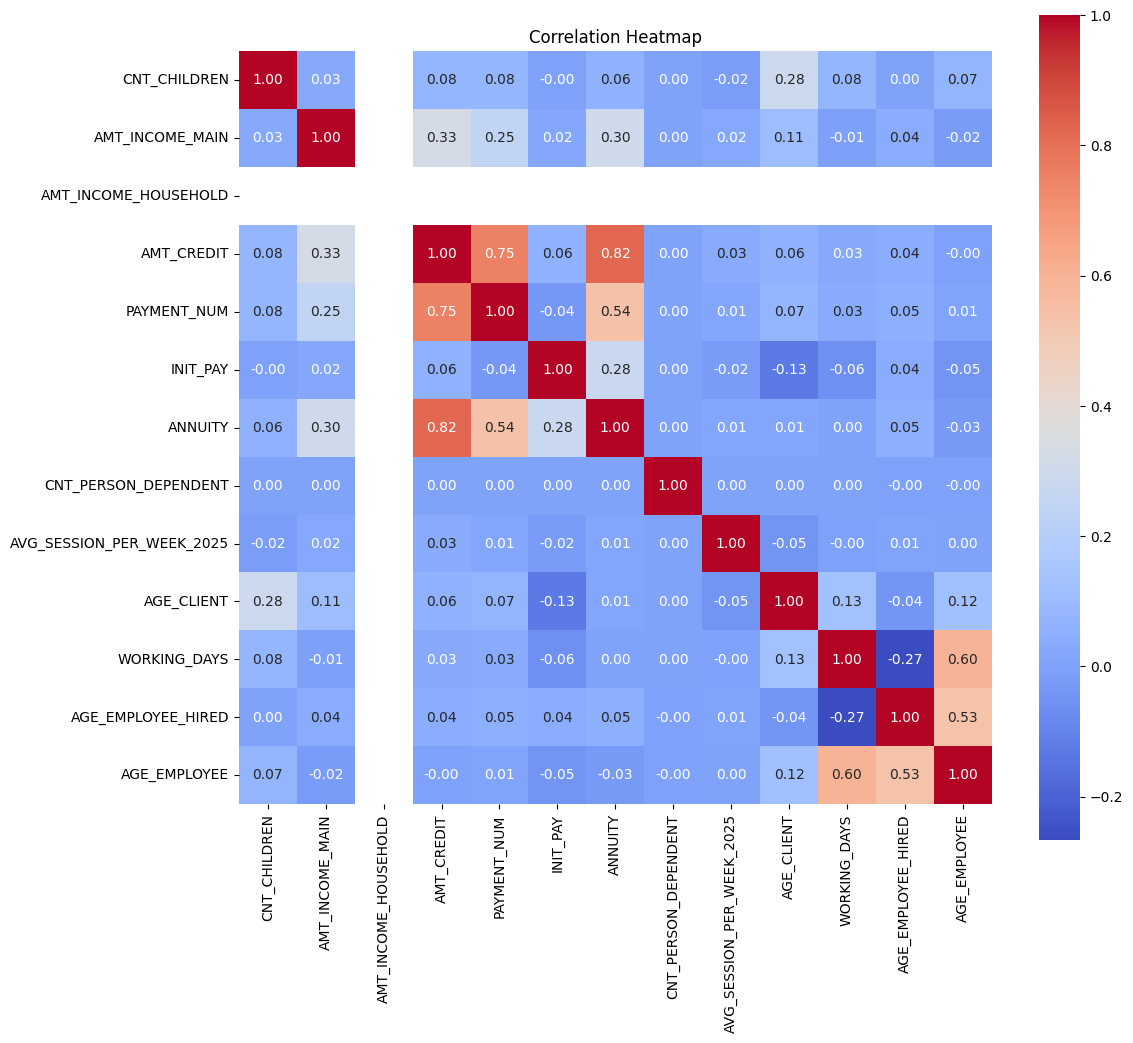

In [ ]:
# Heatmap for correlation
plt.figure(figsize=(12, 12))
sns.heatmap(train[numeric_columns].corr(), annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
plt.title('Correlation Heatmap')
plt.tight_layout()

In [ ]:
# Chi-squared test for categorical features
for col in category_columns:
    chi2_stat, p_value = chi2(train[col].values.reshape(-1, 1), train[target])
    if p_value[0] < 0.05:
        print(f"Chi-squared test for {col}: Chi2-statistic = {chi2_stat[0]}, p-value = {p_value[0]} (significant)")
    else:
        print(f"Chi-squared test for {col}: Chi2-statistic = {chi2_stat[0]}, p-value = {p_value[0]}")

Chi-squared test for NAME_EDUCATION_TYPE: Chi2-statistic = 148614.61896331474, p-value = 0.0 (significant)
Chi-squared test for NAME_INCOME_TYPE: Chi2-statistic = 584724.0109500872, p-value = 0.0 (significant)
Chi-squared test for CODE_PROFESSION: Chi2-statistic = 88212.80496607584, p-value = 0.0 (significant)
Chi-squared test for PRODUCT: Chi2-statistic = 11.758149606361718, p-value = 0.0006057741800583633 (significant)
Chi-squared test for FIRST_DUE: Chi2-statistic = 870.3669574021719, p-value = 2.7152379510175755e-191 (significant)
Chi-squared test for SECOND_DUE: Chi2-statistic = 1501.2183562360833, p-value = 0.0 (significant)
Chi-squared test for THIRD_DUE: Chi2-statistic = 2053.733262687323, p-value = 0.0 (significant)
Chi-squared test for FOURTH_DUE: Chi2-statistic = 2537.270461244085, p-value = 0.0 (significant)
Chi-squared test for FLAG_INS: Chi2-statistic = 125203.69213223032, p-value = 0.0 (significant)
Chi-squared test for NAME_GENDER: Chi2-statistic = 1018.5015705608948, p

In [ ]:
# Test drift for numeric features
for col in numeric_columns:
    ks_stat, p_value = ks_2samp(train[col], test[col])
    if p_value < 0.05:
        print(f"KS test for {col}: KS-statistic = {ks_stat}, p-value = {p_value} (drift detected)")
    else:
        print(f"KS test for {col}: KS-statistic = {ks_stat}, p-value = {p_value} (no drift detected)")

KS test for CNT_CHILDREN: KS-statistic = 0.055870595652511845, p-value = 1.4375856058481392e-109 (drift detected)
KS test for AMT_INCOME_MAIN: KS-statistic = 0.289841326212822, p-value = 0.0 (drift detected)
KS test for AMT_INCOME_HOUSEHOLD: KS-statistic = 0.0, p-value = 1.0 (no drift detected)
KS test for AMT_CREDIT: KS-statistic = 0.17693052349813776, p-value = 0.0 (drift detected)
KS test for PAYMENT_NUM: KS-statistic = 0.2031627483032601, p-value = 0.0 (drift detected)
KS test for INIT_PAY: KS-statistic = 0.21583803692707315, p-value = 0.0 (drift detected)
KS test for ANNUITY: KS-statistic = 0.1500755721884205, p-value = 0.0 (drift detected)
KS test for CNT_PERSON_DEPENDENT: KS-statistic = 0.0007823155926627301, p-value = 1.0 (no drift detected)
KS test for AVG_SESSION_PER_WEEK_2025: KS-statistic = 0.01128728726108208, p-value = 7.027096437015706e-05 (drift detected)
KS test for AGE_CLIENT: KS-statistic = 0.05060258687508909, p-value = 6.015108504341388e-90 (drift detected)
KS test

In [ ]:
# Test drift for categorical features
for col in category_columns:
    train['src'] = 'train'
    test['src'] = 'test'
    df_all = pd.concat([train[[col, 'src']], test[[col, 'src']]], ignore_index=True)

    contingency_table = pd.crosstab(df_all[col], df_all['src'])
    chi2_stat, p_value, _, _ = chi2_contingency(contingency_table)
    if p_value < 0.05:
        print(f"Chi-squared test for {col}: Chi2-statistic = {chi2_stat}, p-value = {p_value} (drift detected)")
    else:
        print(f"Chi-squared test for {col}: Chi2-statistic = {chi2_stat}, p-value = {p_value} (no drift detected)")

Chi-squared test for NAME_EDUCATION_TYPE: Chi2-statistic = 5701.620705262683, p-value = 0.0 (drift detected)
Chi-squared test for NAME_INCOME_TYPE: Chi2-statistic = 489.25908913493856, p-value = 1.7309203835959148e-102 (drift detected)
Chi-squared test for CODE_PROFESSION: Chi2-statistic = 1078.1112701320606, p-value = 1.5872125623481274e-228 (drift detected)
Chi-squared test for PRODUCT: Chi2-statistic = 8367.153123518985, p-value = 0.0 (drift detected)
Chi-squared test for FIRST_DUE: Chi2-statistic = 9.498906792244895, p-value = 0.0020559435454465163 (drift detected)
Chi-squared test for SECOND_DUE: Chi2-statistic = 64.1929394823669, p-value = 1.1281230916539174e-15 (drift detected)
Chi-squared test for THIRD_DUE: Chi2-statistic = 251.25069664751013, p-value = 1.386050967629922e-56 (drift detected)
Chi-squared test for FOURTH_DUE: Chi2-statistic = 501.3807755544232, p-value = 4.759290617317611e-111 (drift detected)
Chi-squared test for FLAG_INS: Chi2-statistic = 1164.2682328794026, p

In [ ]:
# All columns isnot significant and multicollinearity with each other (> 0.8)
remove_columns = ['AMT_INCOME_HOUSEHOLD', 'AMT_INCOME_MAIN', 'CNT_PERSON_DEPENDENT', 'ANNUITY']
train_cols = [x for x in numeric_columns + category_columns if x not in remove_columns]
X_train = train[train_cols]
X_test = test[train_cols]
Y_train = train[target]
Y_test = test[target]
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}, Y_train shape: {Y_train.shape}, Y_test shape: {Y_test.shape}")

X_train shape: (627760, 25), X_test shape: (42974, 25), Y_train shape: (627760,), Y_test shape: (42974,)


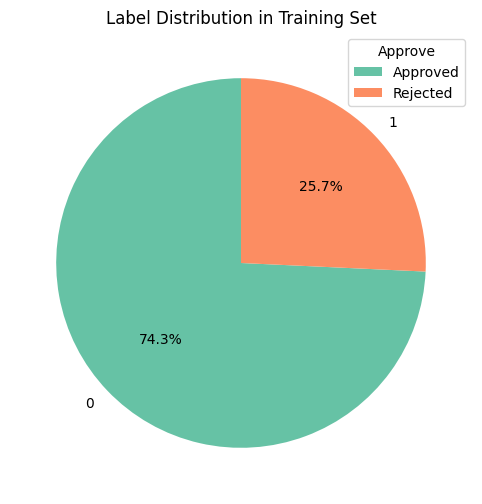

In [ ]:
# Pie chart for target distribution
plt.figure(figsize=(8, 6))
Y_train.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Label Distribution in Training Set')
plt.ylabel('')
plt.legend(title='Approve', labels=['Approved', 'Rejected'], loc='upper right')
plt.show()

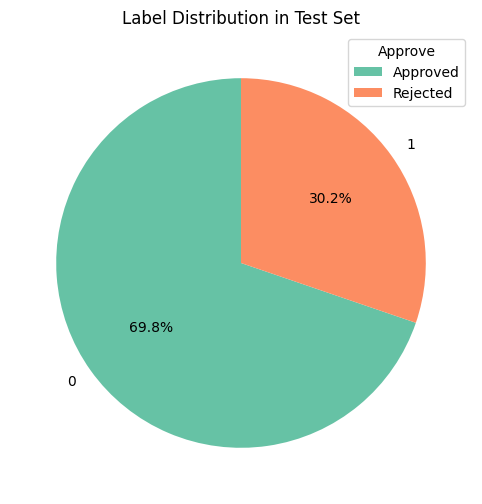

In [ ]:
# Pie chart for target distribution
plt.figure(figsize=(8, 6))
Y_test.value_counts().plot.pie(autopct='%1.1f%%', startangle=90, colors=['#66c2a5', '#fc8d62'])
plt.title('Label Distribution in Test Set')
plt.ylabel('')
plt.legend(title='Approve', labels=['Approved', 'Rejected'], loc='upper right')
plt.show()

In [ ]:
class Predictor:
    def __init__(self, X_train, X_test, Y_train, Y_test):
        scaler = StandardScaler()
        X_train = scaler.fit_transform(X_train)
        X_test = scaler.transform(X_test)
        
        self.X_train = X_train
        self.X_test = X_test
        self.Y_train = Y_train
        self.Y_test = Y_test

        self.configs = {
            'random_forest': {'n_estimators': 100, 'criterion': 'gini', 'max_depth': None},
            'xgboost': {'n_estimators': 100, 'learning_rate': 0.1, 'max_depth': 3},
            'lightgbm': {'n_estimators': 100, 'learning_rate': 0.1, 'num_leaves': 31},
            'catboost': {'iterations': 100, 'learning_rate': 0.1, 'depth': 6}
        }

        self.param_grids = {
            'random_forest': {'n_estimators': [50, 100, 200], 'criterion': ['gini', 'entropy'], 'max_depth': [None] + list(range(1, 21))},
            'xgboost': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'max_depth': list(range(3, 10))},
            'lightgbm': {'n_estimators': [50, 100, 200], 'learning_rate': [0.01, 0.1, 0.2], 'num_leaves': [31, 63]},
            'catboost': {'iterations': [50, 100], 'learning_rate': [0.01, 0.1], 'depth': list(range(3, 10))}
        }
        
    def create_model(self, model_name):
        if model_name not in self.configs:
            raise ValueError(f"Model {model_name} is not defined in configs.")
        try:
            model_class = {
                'random_forest': RandomForestClassifier,
                'xgboost': xgb.XGBClassifier,
                'lightgbm': lgb.LGBMClassifier,
                'catboost': cb.CatBoostClassifier
            }[model_name]
            return model_class(**self.configs[model_name])
        except KeyError:
            raise ValueError(f"Model {model_name} is not recognized.")

    def run_model(self, model_name, threshold=False):
        best_threshold = 0.5
        best_f1 = 0.0
        Y_pred = None
        model = self.create_model(model_name)
        model.fit(self.X_train, self.Y_train)
        if threshold is False:
            Y_pred = model.predict(self.X_test)
        else:
            for threshold in np.arange(0.1, 1.0, 0.1):
                probs = model.predict_proba(self.X_test)[:, 1]
                Y_pred_tmp = (probs >= threshold).astype(int)
                f1 = f1_score(self.Y_test, Y_pred_tmp)
                print(f"F1 score for threshold {threshold}: {f1}")
                if f1 > best_f1:
                    best_f1 = f1
                    best_threshold = threshold
                    Y_pred = Y_pred_tmp
            print(f"Best threshold for {model_name}: {best_threshold} with F1 score: {best_f1}")

        tn, fp, fn, tp = confusion_matrix(self.Y_test, Y_pred).ravel()
        # fnr = fn / (fn + tp) if (fn + tp) > 0 else 0

        print(f"Model: {model_name}")
        print('Config:', self.configs[model_name])
        print('Accuracy:', accuracy_score(self.Y_test, Y_pred))
        print('F1 score:', f1_score(self.Y_test, Y_pred))
        # print('FNR:', fnr)
        print('AUC:', roc_auc_score(self.Y_test, model.predict_proba(self.X_test)[:, 1]))
        
        # Confusion matrix plot
        cm = confusion_matrix(self.Y_test, Y_pred)
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Approved', 'Rejected'], yticklabels=['Approved', 'Rejected'])
        plt.title(f'Confusion Matrix for {model_name}')
        plt.xlabel('Predicted')
        plt.ylabel('Actual')
        plt.show()
        

    def update_config(self, model_name, new_config):
        if model_name in self.configs:
            self.configs[model_name] = {**self.configs[model_name], **new_config}
        return self.create_model(model_name)
    
    def random_search(self, model_name, cv=2, scoring='f1', verbose=1, n_iter=25, random_state=42):
        if model_name not in self.configs:
                raise ValueError(f"Model '{model_name}' not recognized. Available models: {list(self.configs.keys())}")
    
        model = self.create_model(model_name)
        if model is None:
            raise ValueError(f"Model '{model_name}' not found in the class instance.")
    
        param_distributions = self.param_grids.get(model_name, None)
        if param_distributions is None:
            raise ValueError(f"No parameter grid defined for model '{model_name}'.")
    
        randomized_search = RandomizedSearchCV(
            estimator=model,
            param_distributions=param_distributions,
            n_iter=n_iter,
            cv=cv,
            scoring=scoring,
            n_jobs=-1,
            verbose=verbose,
            random_state=random_state
        )
    
        print(f"Starting Randomized Search for model '{model_name}'...")
        randomized_search.fit(self.X_train, self.Y_train)
    
        best_params = randomized_search.best_params_
        best_score = randomized_search.best_score_
    
        print(f"Best Parameters for {model_name}: {best_params}")
        print(f"Best Cross-Validation {scoring}: {best_score:.4f}")

        return self.update_config(model_name, best_params)

In [ ]:
predictor = Predictor(X_train, X_test, Y_train, Y_test)

Starting Randomized Search for model 'random_forest'...
Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best Parameters for random_forest: {'n_estimators': 100, 'max_depth': 10, 'criterion': 'entropy'}
Best Cross-Validation f1: 0.7455
F1 score for threshold 0.1: 0.7601128880526811
F1 score for threshold 0.2: 0.7710915335224727
F1 score for threshold 0.30000000000000004: 0.8298255376256096
F1 score for threshold 0.4: 0.8459799588380175
F1 score for threshold 0.5: 0.8552307150405072
F1 score for threshold 0.6: 0.8454473891367095
F1 score for threshold 0.7000000000000001: 0.7698066675474523
F1 score for threshold 0.8: 0.7353379258983429
F1 score for threshold 0.9: 0.6969903574559267
Best threshold for random_forest: 0.5 with F1 score: 0.8552307150405072
Model: random_forest
Config: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10, 'class_weight': {0: 3, 1: 7}}
Accuracy: 0.9043607762833341
F1 score: 0.8552307150405072
AUC: 0.9655125545213913


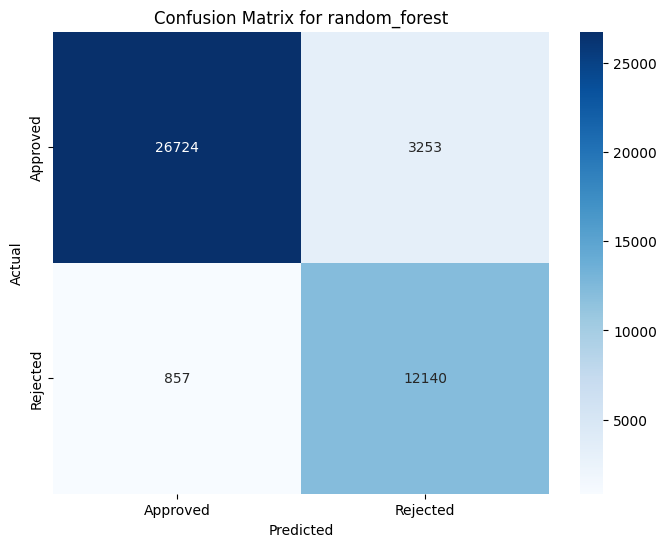

In [ ]:
predictor.update_config('random_forest', {'class_weight': {0:3, 1: 7}})
predictor.random_search('random_forest')
predictor.run_model('random_forest', True)

Starting Randomized Search for model 'xgboost'...
Fitting 2 folds for each of 25 candidates, totalling 50 fits
Best Parameters for xgboost: {'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.01}
Best Cross-Validation f1: 0.7502
F1 score for threshold 0.1: 0.7600905429638122
F1 score for threshold 0.2: 0.7781431976586308
F1 score for threshold 0.30000000000000004: 0.8049669915121032
F1 score for threshold 0.4: 0.8351109638953296
F1 score for threshold 0.5: 0.851528384279476
F1 score for threshold 0.6: 0.8495408181785182
F1 score for threshold 0.7000000000000001: 0.7509739823563656
F1 score for threshold 0.8: 0.7136333365046142
F1 score for threshold 0.9: 0.24174194418228395
Best threshold for xgboost: 0.5 with F1 score: 0.851528384279476
Model: xgboost
Config: {'n_estimators': 200, 'learning_rate': 0.01, 'max_depth': 5, 'scale_pos_weight': 2.3333333333333335}
Accuracy: 0.903476520686927
F1 score: 0.851528384279476
AUC: 0.9624228579091011


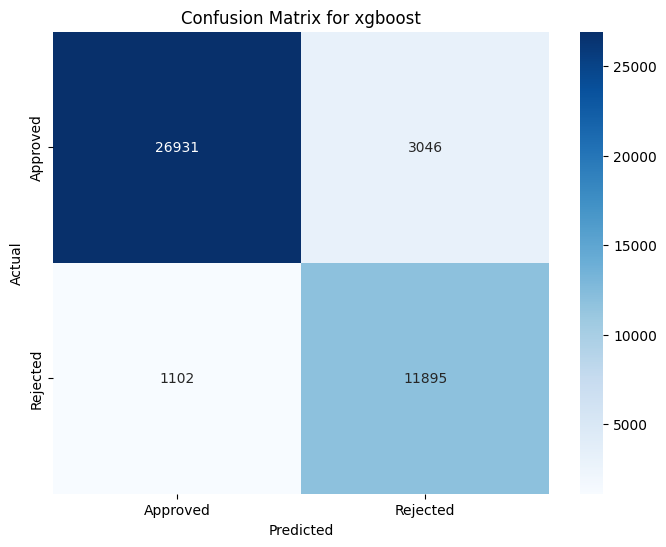

In [ ]:
predictor.update_config('xgboost', {'scale_pos_weight': 7/3})
predictor.random_search('xgboost')
predictor.run_model('xgboost', True)

Starting Randomized Search for model 'lightgbm'...
Fitting 2 folds for each of 18 candidates, totalling 36 fits
[LightGBM] [Info] Number of positive: 161586, number of negative: 466174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.032507 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1298
[LightGBM] [Info] Number of data points in the train set: 627760, number of used features: 25
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.257401 -> initscore=-1.059521
[LightGBM] [Info] Start training from score -1.059521
Best Parameters for lightgbm: {'num_leaves': 63, 'n_estimators': 100, 'learning_rate': 0.1}
Best Cross-Validation f1: 0.7476
[LightGBM] [Info] Number of positive: 161586, number of negative: 466174
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.033350 seconds.
You can set `force_row_wi

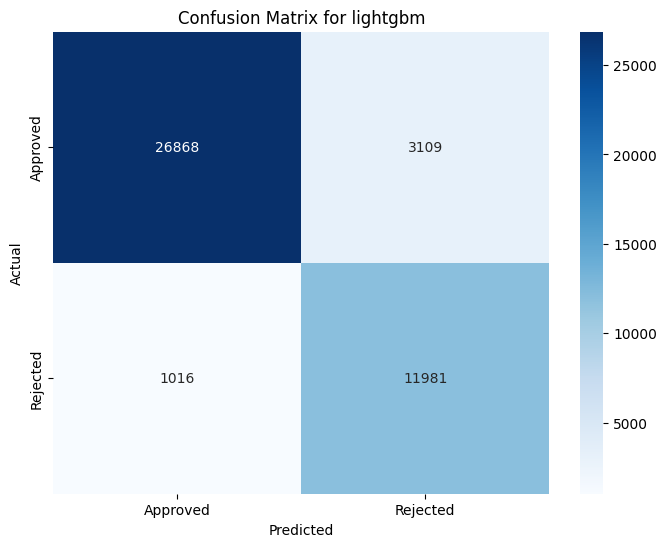

In [ ]:
predictor.update_config('lightgbm', {'scale_pos_weight': 7/3})
predictor.random_search('lightgbm')
predictor.run_model('lightgbm', True)

Starting Randomized Search for model 'catboost'...
Fitting 2 folds for each of 25 candidates, totalling 50 fits
0:	learn: 0.5659992	total: 194ms	remaining: 9.49s
1:	learn: 0.4756965	total: 245ms	remaining: 5.88s
2:	learn: 0.4118039	total: 296ms	remaining: 4.64s
3:	learn: 0.3639107	total: 362ms	remaining: 4.16s
4:	learn: 0.3317425	total: 437ms	remaining: 3.93s
5:	learn: 0.3084945	total: 525ms	remaining: 3.85s
6:	learn: 0.2892970	total: 660ms	remaining: 4.06s
7:	learn: 0.2752394	total: 746ms	remaining: 3.92s
8:	learn: 0.2647379	total: 824ms	remaining: 3.75s
9:	learn: 0.2579906	total: 904ms	remaining: 3.62s
10:	learn: 0.2515989	total: 989ms	remaining: 3.51s
11:	learn: 0.2464429	total: 1.06s	remaining: 3.37s
12:	learn: 0.2424491	total: 1.18s	remaining: 3.36s
13:	learn: 0.2381877	total: 1.27s	remaining: 3.26s
14:	learn: 0.2364581	total: 1.36s	remaining: 3.18s
15:	learn: 0.2344171	total: 1.44s	remaining: 3.06s
16:	learn: 0.2318501	total: 1.52s	remaining: 2.95s
17:	learn: 0.2298976	total: 1.6

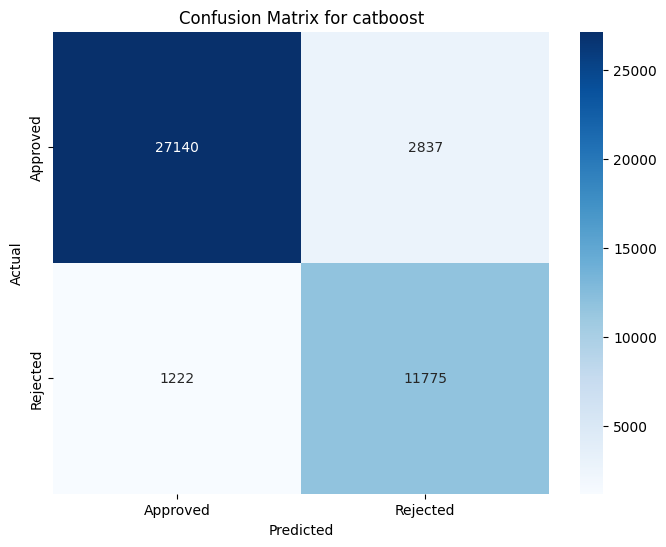

In [ ]:
predictor.update_config('catboost', {'scale_pos_weight': 7/3})
predictor.random_search('catboost')
predictor.run_model('catboost', True)

# **Results**
| Models        | Accuracy | F1 Score | AUC Score | Training Time |
|---------------|----------|----------|-----------|---------------|
| Random Forest | 0.904    | 0.855    | 0.966     | 14p12s        |
| XGBoost       | 0.903    | 0.852    | 0.962     | 1p23s         |
| LightGBM      | 0.904    | 0.853    | 0.968     | 2p4s          |
| CatBoost      | 0.906    | 0.853    | 0.963     | 3p57s         |

**Mô hình được đề xuất: CatBoost là lựa chọn tốt nhất cho triển khai lâu dài vì:**
- Xử lý biến danh mục tự động, giảm lỗi và phù hợp với dữ liệu của bạn.
- Ổn định với data drift nhờ cơ chế xử lý danh mục mới.
- Hiệu suất tốt (Accuracy cao nhất, F1 Score cạnh tranh).
- Thời gian huấn luyện chấp nhận được (3p57s).

# **V. MODEL 2**

In [ ]:
import pandas as pd
import numpy as np
from surprise import SVD, KNNBasic, Dataset, Reader, accuracy
from surprise.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import LabelEncoder
import random

In [ ]:
def set_seed(seed = 42):
    random.seed(seed)
    np.random.seed(seed)

set_seed(42)

In [ ]:
contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')
employee_df = pd.read_csv(r'filled_data/EMPLOYEE.csv')
leads_df = pd.read_csv(r'cleaned_data/LEADS.csv')

C:\Users\Admin\AppData\Local\Temp\ipykernel_20580\930957866.py:1: DtypeWarning: Columns (16) have mixed types. Specify dtype option on import or set low_memory=False.
  contract_df = pd.read_csv(r'cleaned_data/CONTRACT.csv')
C:\Users\Admin\AppData\Local\Temp\ipykernel_20580\930957866.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  customer_df = pd.read_csv(r'cleaned_data/CUSTOMER.csv')


In [ ]:
customer_df.drop(columns=['NAME_EDUCATION_TYPE', 'DATE_BIRTH', 'CNT_CHILDREN'], inplace=True)

In [ ]:
valid_sa = leads_df[leads_df['CODE_SA'] != -1]
lead_per_sa = (
    valid_sa
    .groupby('CODE_SA')
    .size()
    .reset_index(name='NUM_LEADS')
)

lead_per_sa

CODE_SA  NUM_LEADS
0       12791        366
1       12797        231
2       12813        506
3       12892         25
4       12893        124
...       ...        ...
9605   121783        680
9606   121824        229
9607   121834        246
9608   121887          1
9609   121917        129

[9610 rows x 2 columns]

In [ ]:
# employee_full = employee_df.merge(lead_per_sa, left_on='CODE_EMPLOYEE', right_on='CODE_SA', how='left')
# employee_full['NUM_LEADS'] = employee_full['NUM_LEADS'].fillna(0).astype(int)
# employee_full

In [ ]:
final_df = contract_df.merge(customer_df, on='SKP_CLIENT', how='inner')
final_df = final_df.merge(employee_df, left_on='APPLY_EMPLOYEE', right_on='CODE_EMPLOYEE', how='inner')
final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900899        342935765     7514929      Junior school education   
900900        342935889    14994675        High school education   

        CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                  0        7000000.0                     0   
1                  1        4000000.0                     0   
2                  0        2000000.0                     0   
3                  0        5000000.0                     0   
4                  0       10000000.0                     0   
...              ...              ...                   ...   
900896             1       25000000.0                     0   
900897             2       15000000.0                     0   
900898             1       15000000.0                     0   
900899             0       20000000.0                     0   
900900             0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900899  Self-employed person / business owner        ENGINEER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  LEAVING_DATE  \
0                Finished  Consumer Durable  ...    2023-11-29   
1                Finished  Consumer Durable  ...    2022-11-30   
2                Rejected  Consumer Durable  ...           NaN   
3                Finished  Consumer Durable  ...    2021-01-01   
4                Finished  Consumer Durable  ...    2021-04-13   
...                   ...               ...  ...           ...   
900896             Signed         Cash Loan  ...           NaN   
900897             Signed         Cash Loan  ...           NaN   
900898             Signed      Two-wheelers  ...           NaN   
900899           Approved         Cash Loan  ...           NaN   
900900             Active         Cash Loan  ...           NaN   

        MANAGER_CODE_EMPLOYEE  GENDER  BIRTH_DATE LEVEL_SA WORKING_DAYS  \
0                       26872       0  1985-03-24        2         2969   
1                       19780       0  1992-08-03        1         2800   
2                         889       0  1989-11-15        1         2633   
3                       34590       0  1994-06-30        0         1473   
4                        1406       0  1992-07-10        0         1624   
...                       ...     ...         ...      ...          ...   
900896                 114569       0  1988-06-01        3         1458   
900897                 109522       1  2002-02-23        3         1311   
900898                   1428       1  2000-08-17        0          261   
900899                    248       1  1991-04-22        2          268   
900900                    248      

In [ ]:
def target_feature(row):
    if row['NAME_CREDIT_STATUS'] in ['In Preprocess', 'In Process']:
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] in ['Signed', 'Active', 'Finished', 'Paid off', 'Written off', 'Sold']:
        return 'Signed'
    if row['NAME_CREDIT_STATUS'] == 'Approved':
        if pd.notna(row['SIGN_CONTRACT_TIME']):
            return 'Signed'
        return 'Processing'
    if row['NAME_CREDIT_STATUS'] == 'Rejected':
        return 'Rejected'
    if row['NAME_CREDIT_STATUS'] == 'Cancelled':
        if pd.notna(row['SIGN_CONTRACT_TIME']):
            return 'Signed'
        return 'Rejected'

final_df['SIGNED'] = final_df.apply(target_feature, axis=1)
final_df = final_df[final_df['SIGNED'] != 'Processing']
final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900895        342934440    84727626        High school education   
900896        342934673    99124783      Junior school education   
900897        342934791     6409762  Elementary (primary) school   
900898        342935412    37676700  Elementary (primary) school   
900900        342935889    14994675        High school education   

        CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                  0        7000000.0                     0   
1                  1        4000000.0                     0   
2                  0        2000000.0                     0   
3                  0        5000000.0                     0   
4                  0       10000000.0                     0   
...              ...              ...                   ...   
900895             1       15000000.0                     0   
900896             1       25000000.0                     0   
900897             2       15000000.0                     0   
900898             1       15000000.0                     0   
900900             0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900895  Self-employed person / business owner           OTHER   
900896                        Employed person        SALESMAN   
900897  Self-employed person / business owner           OTHER   
900898                        Employed person          WORKER   
900900                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  MANAGER_CODE_EMPLOYEE  \
0                Finished  Consumer Durable  ...                  26872   
1                Finished  Consumer Durable  ...                  19780   
2                Rejected  Consumer Durable  ...                    889   
3                Finished  Consumer Durable  ...                  34590   
4                Finished  Consumer Durable  ...                   1406   
...                   ...               ...  ...                    ...   
900895             Signed         Cash Loan  ...                  13475   
900896             Signed         Cash Loan  ...                 114569   
900897             Signed         Cash Loan  ...                 109522   
900898             Signed      Two-wheelers  ...                   1428   
900900             Active         Cash Loan  ...                    248   

        GENDER  BIRTH_DATE  LEVEL_SA WORKING_DAYS AGE_EMPLOYEE_HIRED  \
0            0  1985-03-24         2         2969                 30   
1            0  1992-08-03         1         2800                 22   
2            0  1989-11-15         1         2633                 28   
3            0  1994-06-30         0         1473                 22   
4            0  1992-07-10         0         1624                 24   
...        ...         ...       ...          ...                ...   
900895       0  1991-10-16         3         2038                 28   
900896       0  1988-06-01         3         1458                 33   
900897       1  2002-02-23         3         1311                 19   
900898       1  2000-08-17      

In [ ]:
approved_per_sa = (
    final_df
    .groupby('CODE_EMPLOYEE')['SIGNED']
    .value_counts()
    .unstack(fill_value=0)
    .reset_index()
)

approved_per_sa

SIGNED  CODE_EMPLOYEE  Rejected  Signed
0               12791        48     204
1               12797        50     200
2               12813        99     300
3               12892        36     197
4               12893        75     217
...               ...       ...     ...
9273           121824       129     270
9274           121834        78     294
9275           121887        46     166
9276           121917        52     144
9277           121944        32     150

[9278 rows x 3 columns]

In [ ]:
# employee_full = employee_full.merge(approved_per_sa, on='CODE_EMPLOYEE', how='left')
# employee_full.drop(columns=['CODE_SA'], inplace=True)
# employee_full = employee_full.fillna(0)
# employee_full

In [ ]:
final_df = final_df.merge(lead_per_sa, left_on='CODE_EMPLOYEE', right_on='CODE_SA', how='left')
final_df = final_df.merge(approved_per_sa, on='CODE_EMPLOYEE', how='left')
final_df = final_df.fillna(0)
final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900810        342934440    84727626        High school education   
900811        342934673    99124783      Junior school education   
900812        342934791     6409762  Elementary (primary) school   
900813        342935412    37676700  Elementary (primary) school   
900814        342935889    14994675        High school education   

        CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                  0        7000000.0                     0   
1                  1        4000000.0                     0   
2                  0        2000000.0                     0   
3                  0        5000000.0                     0   
4                  0       10000000.0                     0   
...              ...              ...                   ...   
900810             1       15000000.0                     0   
900811             1       25000000.0                     0   
900812             2       15000000.0                     0   
900813             1       15000000.0                     0   
900814             0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900810  Self-employed person / business owner           OTHER   
900811                        Employed person        SALESMAN   
900812  Self-employed person / business owner           OTHER   
900813                        Employed person          WORKER   
900814                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  WORKING_DAYS  \
0                Finished  Consumer Durable  ...          2969   
1                Finished  Consumer Durable  ...          2800   
2                Rejected  Consumer Durable  ...          2633   
3                Finished  Consumer Durable  ...          1473   
4                Finished  Consumer Durable  ...          1624   
...                   ...               ...  ...           ...   
900810             Signed         Cash Loan  ...          2038   
900811             Signed         Cash Loan  ...          1458   
900812             Signed         Cash Loan  ...          1311   
900813             Signed      Two-wheelers  ...           261   
900814             Active         Cash Loan  ...          2913   

        AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  SA_PROVINCE FLAG_MANAGER    SIGNED  \
0                       30            40           43            0    Signed   
1                       22            32           31            1    Signed   
2                       28            35           52            0  Rejected   
3                       22            30           56            0    Signed   
4                       24            32           30            0    Signed   
...                    ...           ...          ...          ...       ...   
900810                  28            33           59            0    Signed   
900811                  33            37           38            0    Signed   
900812                  19            23            5            0    Signed   
900813                  24            24           52       

In [ ]:
final_df['CONVERSATION_RATE'] = final_df.apply(
    lambda row: row['Signed'] / row['NUM_LEADS'] if row['NUM_LEADS'] > 0 else 0,
    axis=1
).fillna(0)

final_df

SKP_CREDIT_CASE  SKP_CLIENT          NAME_EDUCATION_TYPE  \
0             202732373    12665970            Bachelor's degree   
1             149179096    14975594  Elementary (primary) school   
2             335925533   126826775                          XNA   
3             163357328    38084937      Junior school education   
4             193688464    37761042            Bachelor's degree   
...                 ...         ...                          ...   
900810        342934440    84727626        High school education   
900811        342934673    99124783      Junior school education   
900812        342934791     6409762  Elementary (primary) school   
900813        342935412    37676700  Elementary (primary) school   
900814        342935889    14994675        High school education   

        CNT_CHILDREN  AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0                  0        7000000.0                     0   
1                  1        4000000.0                     0   
2                  0        2000000.0                     0   
3                  0        5000000.0                     0   
4                  0       10000000.0                     0   
...              ...              ...                   ...   
900810             1       15000000.0                     0   
900811             1       25000000.0                     0   
900812             2       15000000.0                     0   
900813             1       15000000.0                     0   
900814             0       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900810  Self-employed person / business owner           OTHER   
900811                        Employed person        SALESMAN   
900812  Self-employed person / business owner           OTHER   
900813                        Employed person          WORKER   
900814                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT  ...  AGE_EMPLOYEE_HIRED  \
0                Finished  Consumer Durable  ...                  30   
1                Finished  Consumer Durable  ...                  22   
2                Rejected  Consumer Durable  ...                  28   
3                Finished  Consumer Durable  ...                  22   
4                Finished  Consumer Durable  ...                  24   
...                   ...               ...  ...                 ...   
900810             Signed         Cash Loan  ...                  28   
900811             Signed         Cash Loan  ...                  33   
900812             Signed         Cash Loan  ...                  19   
900813             Signed      Two-wheelers  ...                  24   
900814             Active         Cash Loan  ...                  20   

        AGE_EMPLOYEE  SA_PROVINCE  FLAG_MANAGER    SIGNED  CODE_SA NUM_LEADS  \
0                 40           43             0    Signed  23074.0     121.0   
1                 32           31             1    Signed  20815.0     202.0   
2                 35           52             0  Rejected  37020.0     512.0   
3                 30           56             0    Signed  31181.0       2.0   
4                 32           30             0    Signed  30150.0      14.0   
...              ...          ...           ...       ...      ...       ...   
900810            33           59             0    Signed  43825.0     687.0   
900811            37           38             0    Signed  49032.0    2580.0   
900812            23            5             0    Signed  50676.0  

In [ ]:
final_df.drop(columns=['SKP_CREDIT_CASE', 'APPLY_CONTRACT_TIME', 'APPROVE_CONTRACT_TIME', 'SIGN_CONTRACT_TIME', 'APPLY_EMPLOYEE', 'SIGN_EMPLOYEE', 'FIRST_DUE', 'SECOND_DUE', 'THIRD_DUE', 'FOURTH_DUE', 'HIRING_DATE', 'LEAVING_DATE', 'MANAGER_CODE_EMPLOYEE', 'BIRTH_DATE', 'CODE_SA'], inplace=True)
final_df

SKP_CLIENT          NAME_EDUCATION_TYPE  CNT_CHILDREN  \
0         12665970            Bachelor's degree             0   
1         14975594  Elementary (primary) school             1   
2        126826775                          XNA             0   
3         38084937      Junior school education             0   
4         37761042            Bachelor's degree             0   
...            ...                          ...           ...   
900810    84727626        High school education             1   
900811    99124783      Junior school education             1   
900812     6409762  Elementary (primary) school             2   
900813    37676700  Elementary (primary) school             1   
900814    14994675        High school education             0   

        AMT_INCOME_MAIN  AMT_INCOME_HOUSEHOLD  \
0             7000000.0                     0   
1             4000000.0                     0   
2             2000000.0                     0   
3             5000000.0                     0   
4            10000000.0                     0   
...                 ...                   ...   
900810       15000000.0                     0   
900811       25000000.0                     0   
900812       15000000.0                     0   
900813       15000000.0                     0   
900814       50000000.0                     0   

                             NAME_INCOME_TYPE CODE_PROFESSION  \
0                             Employed person           OTHER   
1                             Employed person        SALESMAN   
2                                         XNA             XNA   
3                             Employed person          WORKER   
4                             Employed person           OTHER   
...                                       ...             ...   
900810  Self-employed person / business owner           OTHER   
900811                        Employed person        SALESMAN   
900812  Self-employed person / business owner           OTHER   
900813                        Employed person          WORKER   
900814                        Employed person           OTHER   

       NAME_CREDIT_STATUS           PRODUCT   AMT_CREDIT  ...  WORKING_DAYS  \
0                Finished  Consumer Durable    5593000.0  ...          2969   
1                Finished  Consumer Durable    3003000.0  ...          2800   
2                Rejected  Consumer Durable    6890000.0  ...          2633   
3                Finished  Consumer Durable    3300000.0  ...          1473   
4                Finished  Consumer Durable    2895000.0  ...          1624   
...                   ...               ...          ...  ...           ...   
900810             Signed         Cash Loan   80000000.0  ...          2038   
900811             Signed         Cash Loan   30000000.0  ...          1458   
900812             Signed         Cash Loan   25000000.0  ...          1311   
900813             Signed      Two-wheelers   18000000.0  ...           261   
900814             Active         Cash Loan  152460000.0  ...          2913   

        AGE_EMPLOYEE_HIRED  AGE_EMPLOYEE  SA_PROVINCE FLAG_MANAGER    SIGNED  \
0                       30            40           43            0    Signed   
1                       22            32           31            1    Signed   
2                       28            35           52            0  Rejected   
3                       22            30           56            0    Signed   
4                       24            32           30            0    Signed   
...                    ...           ...          ...          ...       ...   
900810                  28            33           59            0    Signed   
900811                  33            37           38            0    Signed   
900812                  19            23            5            0    Signed   
900813                  24            24           52            0    Signed   
900814                  20  

In [ ]:
for col in final_df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    final_df[col] = le.fit_transform(final_df[col].astype(str))
    print(f"Mapping for {col}: {dict(zip(le.classes_, le.transform(le.classes_)))}")
final_df.info()

Mapping for NAME_EDUCATION_TYPE: {"Bachelor's degree": 0, 'Elementary (primary) school': 1, 'High school education': 2, 'Junior school education': 3, "Master's degree": 4, 'XNA': 5}
Mapping for NAME_INCOME_TYPE: {'Employed person': 0, 'Person in household': 1, 'Retired person': 2, 'Self-employed person / business owner': 3, 'Student': 4, 'Unemployed': 5, 'XNA': 6}
Mapping for CODE_PROFESSION: {'ADMINISTRATIVE': 0, 'ENGINEER': 1, 'FARMER': 2, 'OTHER': 3, 'SALESMAN': 4, 'SERVICES': 5, 'WORKER': 6, 'XNA': 7}
Mapping for NAME_CREDIT_STATUS: {'Active': 0, 'Approved': 1, 'Cancelled': 2, 'Finished': 3, 'Paid off': 4, 'Rejected': 5, 'Signed': 6, 'Sold': 7, 'Written off': 8}
Mapping for PRODUCT: {'Cash Loan': 0, 'Consumer Durable': 1, 'Credit Card': 2, 'GM Paylater': 3, 'Insurance': 4, 'Two-wheelers': 5, 'XNA': 6}
Mapping for NAME_GENDER: {'Female': 0, 'Male': 1, 'XNA': 2}
Mapping for NAME_SALARY_FREQUENCY: {'Every week paid': 0, 'Irregular salary frequency': 1, 'Monthly paid': 2, 'Once a two w

In [ ]:
history = (
    final_df
    .groupby(['SKP_CLIENT', 'CODE_EMPLOYEE'])['SIGNED']
    .value_counts()
    .unstack(fill_value=0)
    .rename(columns={0: 'Rejected', 1: 'Signed'})  # Đổi tên cột
    .reset_index()
)
history['SUCCESS_RATE'] = history['Signed'] / (history['Signed'] + history['Rejected'])
history

SIGNED  SKP_CLIENT  CODE_EMPLOYEE  Rejected  Signed  SUCCESS_RATE
0               45          23045         0       3           1.0
1               45         109314         0       1           1.0
2              477          40847         1       0           0.0
3              509          38412         0       2           1.0
4              528         113536         1       0           0.0
...            ...            ...       ...     ...           ...
658361   127663671          59260         0       1           1.0
658362   127663684          59394         0       1           1.0
658363   127663698          58783         0       1           1.0
658364   127663746          33866         0       2           1.0
658365   127663753          59371         1       0           0.0

[658366 rows x 5 columns]

In [ ]:
class SARecommender:
    def __init__(self, history, df, rating_scale=(0, 1), cbf_features_client=None, cbf_features_sa=None):
        # Historical data for Collaborative Filtering (CF)
        self.history_df = history[['SKP_CLIENT', 'CODE_EMPLOYEE', 'SUCCESS_RATE']].copy()
        self.reader = Reader(rating_scale=rating_scale)
        self.data = Dataset.load_from_df(self.history_df, self.reader)
        self.trainset, self.testset = train_test_split(self.data, test_size=0.2)

        # CF models
        self.svd = SVD()
        self.knn = None
        self.pred_svd = None
        self.pred_knn = None

        # Full data for Content-Based Filtering (CBF)
        self.df_all = df.copy()
        self.client_features = cbf_features_client
        self.sa_features = cbf_features_sa
        self.client_profile = None
        self.sa_profiles = None
        self.scaler = StandardScaler()

        # Prepare CBF profiles if feature columns are provided
        if cbf_features_client and cbf_features_sa:
            self._prepare_cbf_profiles()

    def _prepare_cbf_profiles(self):
        # Create and scale feature profiles for clients and sales agents
        self.client_profile = self.df_all.groupby('SKP_CLIENT')[self.client_features].first()
        self.sa_profiles = self.df_all.groupby('CODE_EMPLOYEE')[self.sa_features].first()

        self.client_scaler = StandardScaler()
        self.sa_scaler = StandardScaler()

        self.client_profile_scaled = pd.DataFrame(
            self.client_scaler.fit_transform(self.client_profile),
            index=self.client_profile.index,
            columns=self.client_profile.columns
        )
        self.sa_profiles_scaled = pd.DataFrame(
            self.sa_scaler.fit_transform(self.sa_profiles),
            index=self.sa_profiles.index,
            columns=self.sa_profiles.columns
        )

    def train_svd(self):
        # Train SVD model and evaluate
        self.svd.fit(self.trainset)
        self.pred_svd = self.svd.test(self.testset)
        print("✅ SVD RMSE:", accuracy.rmse(self.pred_svd, verbose=True))

    def train_knn(self, sim_name='pearson', user_based=False):
        # Train KNN model and evaluate
        sim_options = {'name': sim_name, 'user_based': user_based}
        self.knn = KNNBasic(sim_options=sim_options)
        self.knn.fit(self.trainset)
        self.pred_knn = self.knn.test(self.testset)
        print("✅ KNN RMSE:", accuracy.rmse(self.pred_knn, verbose=True))

    def combine_predictions_avg(self, w_svd=0.5, w_knn=0.5):
        # Combine SVD and KNN predictions using weighted average
        if self.pred_svd is None or self.pred_knn is None:
            raise ValueError("❌ You must train both SVD and KNN before combining.")
        combined = []
        for p_svd, p_knn in zip(self.pred_svd, self.pred_knn):
            assert p_svd.uid == p_knn.uid and p_svd.iid == p_knn.iid
            combined_est = w_svd * p_svd.est + w_knn * p_knn.est
            combined.append((p_svd.uid, p_svd.iid, combined_est))
        return pd.DataFrame(combined, columns=['SKP_CLIENT', 'CODE_EMPLOYEE', 'COMBINED_EST'])

    def combine_predictions_rank(self, top_n=3):
        # Combine SVD and KNN predictions by ranking and selecting top-N
        df_svd = pd.DataFrame([
            {'SKP_CLIENT': p.uid, 'CODE_EMPLOYEE': p.iid, 'est_svd': p.est}
            for p in self.pred_svd
        ])
        df_knn = pd.DataFrame([
            {'SKP_CLIENT': p.uid, 'CODE_EMPLOYEE': p.iid, 'est_knn': p.est}
            for p in self.pred_knn
        ])
        df = pd.merge(df_svd, df_knn, on=['SKP_CLIENT', 'CODE_EMPLOYEE'])
        df['rank_svd'] = df.groupby('SKP_CLIENT')['est_svd'].rank(ascending=False, method='min')
        df['rank_knn'] = df.groupby('SKP_CLIENT')['est_knn'].rank(ascending=False, method='min')
        df['total_rank'] = df['rank_svd'] + df['rank_knn']
        top_n_df = (
            df.sort_values(['SKP_CLIENT', 'total_rank'])
              .groupby('SKP_CLIENT')
              .head(top_n)
              .reset_index(drop=True)
        )
        return top_n_df[['SKP_CLIENT', 'CODE_EMPLOYEE', 'total_rank']]

    def recommend_for_client(self, client_id, top_n=10):
        # Recommend for known client using both CF and CBF (hybrid)
        if client_id not in self.df_all['SKP_CLIENT'].values:
            print(f"⚠️ Client {client_id} is unseen, fallback to CBF...")
            return self.recommend_by_cbf(client_id, top_n)

        if self.pred_svd is None or self.pred_knn is None:
            raise ValueError("❌ You must train both SVD and KNN before making recommendations.")
        if self.client_profile_scaled is None or self.sa_profiles_scaled is None:
            raise ValueError("❌ Client and SA features are missing for CBF.")

        all_employees = set(self.df_all['CODE_EMPLOYEE'].unique())
        seen_employees = set(self.history_df[self.history_df['SKP_CLIENT'] == client_id]['CODE_EMPLOYEE'].unique())
        unseen_employees = list(all_employees - seen_employees)

        # Get client's vector from CBF profile
        client_vector = self.client_profile_scaled.loc[[client_id]].values
        cbf_similarities = cosine_similarity(client_vector, self.sa_profiles_scaled.loc[unseen_employees].values)[0]

        preds = []
        for idx, emp in enumerate(unseen_employees):
            try:
                est_svd = self.svd.predict(client_id, emp).est
                est_knn = self.knn.predict(client_id, emp).est
                est_combined_cf = 0.5 * est_svd + 0.5 * est_knn
                est_cbf = cbf_similarities[idx]
                final_score = 0.5 * est_combined_cf + 0.5 * est_cbf  # adjustable weights
                preds.append((emp, est_svd, est_knn, est_cbf, final_score))
            except:
                continue

        pred_df = pd.DataFrame(preds, columns=['CODE_EMPLOYEE', 'SVD_EST', 'KNN_EST', 'CBF_SIM', 'FINAL_SCORE'])
        return pred_df.sort_values(by='FINAL_SCORE', ascending=False).head(top_n).reset_index(drop=True)

    def recommend_by_cbf(self, client_id, top_n=10, client_feature_row=None):
        # Recommend using only CBF – for new clients or fallback
        if self.client_profile_scaled is None or self.sa_profiles_scaled is None:
            raise ValueError("❌ You must provide both client and SA features for CBF.")

        if client_id in self.client_profile_scaled.index:
            client_vector = self.client_profile_scaled.loc[[client_id]].values
        elif client_feature_row is not None:
            # New client: require manual feature input
            client_vector = self.client_scaler.transform([client_feature_row])
        else:
            raise ValueError("❌ No feature information found for new client.")

        sims = cosine_similarity(client_vector, self.sa_profiles_scaled.values)[0]
        top_indices = np.argsort(sims)[::-1][:top_n]
        top_sas = self.sa_profiles_scaled.index[top_indices]
        return pd.DataFrame({
            'CODE_EMPLOYEE': top_sas,
            'SIMILARITY': sims[top_indices]
        })

In [ ]:
# Define content-based features for clients
cbf_client_feats = [
    'NAME_GENDER',              # → Encoded gender from name
    'AGE_CLIENT',               # Client's age
    'CNT_CHILDREN',             # Number of children
    'AMT_INCOME_MAIN',          # Main income
    'CNT_PERSON_DEPENDENT',     # Number of dependents
    'AVG_SESSION_PER_WEEK_2025' # Activity level (proxy for engagement/experience)
]

# Define content-based features for sales agents
cbf_sa_feats = [
    'GENDER',           # Agent's gender
    'AGE_EMPLOYEE',     # Agent's age
    'LEVEL_SA',         # Level (proxy for skill/ability)
    'WORKING_DAYS',     # Work experience in days
    'FLAG_MANAGER',     # Management flag (proxy for responsibility)
    'LEVEL_SA'          # Repeated level or used as proxy again for experience
]

# Instantiate the recommender with CF and CBF features
recommender = SARecommender(
    history,              # Historical client-agent interactions
    final_df,             # Full dataset with features
    rating_scale=(0, 1),  # Scale of success rate
    cbf_features_client=cbf_client_feats,
    cbf_features_sa=cbf_sa_feats
)

# Train Collaborative Filtering models
recommender.train_svd()
recommender.train_knn()

RMSE: 0.4236
✅ SVD RMSE: 0.4235935664468589
Computing the pearson similarity matrix...
Done computing similarity matrix.
RMSE: 0.4441
✅ KNN RMSE: 0.4441197559381672


In [ ]:
# Recommendation for an existing client
top_SA = recommender.recommend_for_client(client_id=84954403)
print("✅ Recommendation for existing client:")
print(top_SA)


✅ Recommendation for existing client:
   CODE_EMPLOYEE   SVD_EST  KNN_EST   CBF_SIM  FINAL_SCORE
0          43769  0.866114  0.70953  0.926002     0.856912
1          39030  0.809503  0.70953  0.929646     0.844581
2          56222  0.802514  0.70953  0.923468     0.839745
3          39941  0.817022  0.70953  0.911750     0.837513
4          46345  0.798381  0.70953  0.907735     0.830845
5          43370  0.817343  0.70953  0.897886     0.830661
6          58204  0.852900  0.70953  0.879736     0.830476
7          43616  0.825176  0.70953  0.890806     0.829079
8          51971  0.738820  0.70953  0.933394     0.828784
9          46130  0.718400  0.70953  0.943526     0.828745


In [ ]:
# Recommendation for a new client (cold start)
# Provide feature vector manually, matching cbf_client_feats order
client_feature_vector = [1, 30, 0, 15000000, 0, 5]
top_SA = recommender.recommend_by_cbf(client_id=101, client_feature_row=client_feature_vector)
print("✅ Recommendation for new client (cold start):")
print(top_SA)

✅ Recommendation for new client (cold start):
   CODE_EMPLOYEE  SIMILARITY
0          51769    0.645110
1          51382    0.645098
2          52474    0.645012
3          51020    0.644952
4          50951    0.644925
5          50670    0.644833
6          50171    0.644681
7          53960    0.644187
8          54437    0.643776
9          51774    0.643561


c:\Users\Admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
